# Example 1: Sampling triplets from image dataset
In this notebook, we'll demonstrate how to sample triplets for training a Tile2Vec model from an image dataset.

In [121]:
import numpy as np
import os
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
from src.sample_tiles import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In the workflow detailed in our paper, we exported NAIP imagery over Central California in a bunch of GeoTIFF files (the usual format with Google Earth Engine). We'll walk through sampling tiles from GeoTIFFs here, but a similar workflow can apply to other file formats as well.

Note that this notebook requires the user to have GDAL installed.

The sampling of triplet tiles can happen with an arbitrary number of images. The focus of our functions is on efficiency and scalability, since the overall area covered quite large and loading all images into memory is not advised. The process is broken down into:

1. Sampling triplets of images
2. Loading images one at a time and sampling tile centers from them
3. Extracting tiles given the tile center and radius

For simplicity, here we'll assume we're sampling from just 1 GeoTIFF file.

## Step 1. Sample image names

We assume that the anchor tile and neighbor tile will come from the same image, and the distant tile may or may not come from the same image. Therefore to sample $n$ triplets, we first sample $2n$ image names from which to sample tiles.

Let's sample 20 tiles.

In [122]:
amazonia_img_dir = '../data/Amazonia' # directory where amazonia images are saved

cerrado_img_dir = '../data/Cerrado' # directory where cerrado images are saved

caatinga_img_dir = '../data/Caatinga' # directory where caatinga images are saved

# Get Amazonia triplets
amazonia_img_triplets = get_triplet_imgs(amazonia_img_dir, n_triplets=30000) # This means we need 40 images

# Get Cerrado triplets
cerrado_img_triplets = get_triplet_imgs(cerrado_img_dir, n_triplets=25000) # This means we need 40 images

# Get Amazonia
caatinga_img_triplets = get_triplet_imgs(caatinga_img_dir, n_triplets=25000) # This means we need 40 images


print(cerrado_img_triplets[:5,:])

[['22976.tif' '33454.tif']
 ['39059.tif' '26841.tif']
 ['42053.tif' '8553.tif']
 ['23074.tif' '51593.tif']
 ['28666.tif' '11566.tif']]


Since we only have one image, all tiles are coming from 0.tif.

## Steps 2 & 3. Load images, sample tile centers, and extract tiles

Next we feed the list of images into the get_triplet_tiles function, which loads in each image sequentially and samples tile centers for all tiles that come from that image. This way a given image is only loaded once.

In [123]:
img_dir = '../data'
tile_dir = '../data/nan_removed_tiles' # where you want to save your tiles
tiles = get_triplet_tiles_simple(tile_dir,
                          img_dir, 
                          amazonia_img_triplets,
                          cerrado_img_triplets,
                          caatinga_img_triplets,
                          num_triplets_per_biome=19000,
                          seed = 1,
                          val_type='uint8',
                          bands_only=True,
                          save=True,
                          verbose=False)

Amazonia
BIOME Amazonia progress: 0.01%
BIOME Amazonia progress: 0.01%
BIOME Amazonia progress: 0.02%
BIOME Amazonia progress: 0.02%
BIOME Amazonia progress: 0.03%
BIOME Amazonia progress: 0.03%
BIOME Amazonia progress: 0.04%
BIOME Amazonia progress: 0.05%
BIOME Amazonia progress: 0.05%
BIOME Amazonia progress: 0.06%
BIOME Amazonia progress: 0.06%
BIOME Amazonia progress: 0.07%
BIOME Amazonia progress: 0.07%
BIOME Amazonia progress: 0.08%
BIOME Amazonia progress: 0.08%
BIOME Amazonia progress: 0.09%
BIOME Amazonia progress: 0.10%
BIOME Amazonia progress: 0.10%
BIOME Amazonia progress: 0.11%
BIOME Amazonia progress: 0.11%
BIOME Amazonia progress: 0.12%
BIOME Amazonia progress: 0.12%
BIOME Amazonia progress: 0.13%
BIOME Amazonia progress: 0.14%
BIOME Amazonia progress: 0.14%
BIOME Amazonia progress: 0.15%
BIOME Amazonia progress: 0.15%
BIOME Amazonia progress: 0.16%
BIOME Amazonia progress: 0.16%
BIOME Amazonia progress: 0.17%
BIOME Amazonia progress: 0.17%
BIOME Amazonia progress: 0.18%

BIOME Amazonia progress: 1.50%
BIOME Amazonia progress: 1.50%
BIOME Amazonia progress: 1.51%
BIOME Amazonia progress: 1.51%
BIOME Amazonia progress: 1.52%
BIOME Amazonia progress: 1.52%
BIOME Amazonia progress: 1.53%
BIOME Amazonia progress: 1.54%
BIOME Amazonia progress: 1.54%
BIOME Amazonia progress: 1.55%
BIOME Amazonia progress: 1.55%
BIOME Amazonia progress: 1.56%
BIOME Amazonia progress: 1.56%
BIOME Amazonia progress: 1.57%
BIOME Amazonia progress: 1.58%
BIOME Amazonia progress: 1.58%
BIOME Amazonia progress: 1.59%
BIOME Amazonia progress: 1.59%
BIOME Amazonia progress: 1.60%
BIOME Amazonia progress: 1.60%
BIOME Amazonia progress: 1.61%
BIOME Amazonia progress: 1.61%
BIOME Amazonia progress: 1.62%
BIOME Amazonia progress: 1.63%
BIOME Amazonia progress: 1.63%
BIOME Amazonia progress: 1.64%
BIOME Amazonia progress: 1.64%
BIOME Amazonia progress: 1.65%
BIOME Amazonia progress: 1.65%
BIOME Amazonia progress: 1.66%
BIOME Amazonia progress: 1.67%
BIOME Amazonia progress: 1.67%
BIOME Am

BIOME Amazonia progress: 2.99%
BIOME Amazonia progress: 3.00%
BIOME Amazonia progress: 3.00%
BIOME Amazonia progress: 3.01%
BIOME Amazonia progress: 3.02%
BIOME Amazonia progress: 3.02%
BIOME Amazonia progress: 3.03%
BIOME Amazonia progress: 3.03%
BIOME Amazonia progress: 3.04%
BIOME Amazonia progress: 3.04%
BIOME Amazonia progress: 3.05%
BIOME Amazonia progress: 3.05%
BIOME Amazonia progress: 3.06%
BIOME Amazonia progress: 3.07%
BIOME Amazonia progress: 3.07%
BIOME Amazonia progress: 3.08%
BIOME Amazonia progress: 3.08%
BIOME Amazonia progress: 3.09%
BIOME Amazonia progress: 3.09%
BIOME Amazonia progress: 3.10%
BIOME Amazonia progress: 3.11%
BIOME Amazonia progress: 3.11%
BIOME Amazonia progress: 3.12%
BIOME Amazonia progress: 3.12%
BIOME Amazonia progress: 3.13%
BIOME Amazonia progress: 3.13%
BIOME Amazonia progress: 3.14%
BIOME Amazonia progress: 3.14%
BIOME Amazonia progress: 3.15%
BIOME Amazonia progress: 3.16%
BIOME Amazonia progress: 3.16%
BIOME Amazonia progress: 3.17%
BIOME Am

BIOME Amazonia progress: 4.49%
BIOME Amazonia progress: 4.50%
BIOME Amazonia progress: 4.51%
BIOME Amazonia progress: 4.51%
BIOME Amazonia progress: 4.52%
BIOME Amazonia progress: 4.52%
BIOME Amazonia progress: 4.53%
BIOME Amazonia progress: 4.53%
BIOME Amazonia progress: 4.54%
BIOME Amazonia progress: 4.55%
BIOME Amazonia progress: 4.55%
BIOME Amazonia progress: 4.56%
BIOME Amazonia progress: 4.56%
BIOME Amazonia progress: 4.57%
BIOME Amazonia progress: 4.57%
BIOME Amazonia progress: 4.58%
BIOME Amazonia progress: 4.58%
BIOME Amazonia progress: 4.59%
BIOME Amazonia progress: 4.60%
BIOME Amazonia progress: 4.60%
BIOME Amazonia progress: 4.61%
BIOME Amazonia progress: 4.61%
BIOME Amazonia progress: 4.62%
BIOME Amazonia progress: 4.62%
BIOME Amazonia progress: 4.63%
BIOME Amazonia progress: 4.64%
BIOME Amazonia progress: 4.64%
BIOME Amazonia progress: 4.65%
BIOME Amazonia progress: 4.65%
BIOME Amazonia progress: 4.66%
BIOME Amazonia progress: 4.66%
BIOME Amazonia progress: 4.67%
BIOME Am

BIOME Amazonia progress: 6.00%
BIOME Amazonia progress: 6.00%
BIOME Amazonia progress: 6.01%
BIOME Amazonia progress: 6.01%
BIOME Amazonia progress: 6.02%
BIOME Amazonia progress: 6.02%
BIOME Amazonia progress: 6.03%
BIOME Amazonia progress: 6.04%
BIOME Amazonia progress: 6.04%
BIOME Amazonia progress: 6.05%
BIOME Amazonia progress: 6.05%
BIOME Amazonia progress: 6.06%
BIOME Amazonia progress: 6.06%
BIOME Amazonia progress: 6.07%
BIOME Amazonia progress: 6.08%
BIOME Amazonia progress: 6.08%
BIOME Amazonia progress: 6.09%
BIOME Amazonia progress: 6.09%
BIOME Amazonia progress: 6.10%
BIOME Amazonia progress: 6.10%
BIOME Amazonia progress: 6.11%
BIOME Amazonia progress: 6.11%
BIOME Amazonia progress: 6.12%
BIOME Amazonia progress: 6.13%
BIOME Amazonia progress: 6.13%
BIOME Amazonia progress: 6.14%
BIOME Amazonia progress: 6.14%
BIOME Amazonia progress: 6.15%
BIOME Amazonia progress: 6.15%
BIOME Amazonia progress: 6.16%
BIOME Amazonia progress: 6.17%
BIOME Amazonia progress: 6.17%
BIOME Am

BIOME Amazonia progress: 7.51%
BIOME Amazonia progress: 7.52%
BIOME Amazonia progress: 7.52%
BIOME Amazonia progress: 7.53%
BIOME Amazonia progress: 7.53%
BIOME Amazonia progress: 7.54%
BIOME Amazonia progress: 7.54%
BIOME Amazonia progress: 7.55%
BIOME Amazonia progress: 7.56%
BIOME Amazonia progress: 7.56%
BIOME Amazonia progress: 7.57%
BIOME Amazonia progress: 7.57%
BIOME Amazonia progress: 7.58%
BIOME Amazonia progress: 7.58%
BIOME Amazonia progress: 7.59%
BIOME Amazonia progress: 7.59%
BIOME Amazonia progress: 7.60%
BIOME Amazonia progress: 7.61%
BIOME Amazonia progress: 7.61%
BIOME Amazonia progress: 7.62%
BIOME Amazonia progress: 7.62%
BIOME Amazonia progress: 7.63%
BIOME Amazonia progress: 7.63%
BIOME Amazonia progress: 7.64%
BIOME Amazonia progress: 7.65%
BIOME Amazonia progress: 7.65%
BIOME Amazonia progress: 7.66%
BIOME Amazonia progress: 7.66%
BIOME Amazonia progress: 7.67%
BIOME Amazonia progress: 7.67%
BIOME Amazonia progress: 7.68%
BIOME Amazonia progress: 7.68%
BIOME Am

BIOME Amazonia progress: 9.02%
BIOME Amazonia progress: 9.02%
BIOME Amazonia progress: 9.03%
BIOME Amazonia progress: 9.03%
BIOME Amazonia progress: 9.04%
BIOME Amazonia progress: 9.05%
BIOME Amazonia progress: 9.05%
BIOME Amazonia progress: 9.06%
BIOME Amazonia progress: 9.06%
BIOME Amazonia progress: 9.07%
BIOME Amazonia progress: 9.07%
BIOME Amazonia progress: 9.08%
BIOME Amazonia progress: 9.09%
BIOME Amazonia progress: 9.09%
BIOME Amazonia progress: 9.10%
BIOME Amazonia progress: 9.10%
BIOME Amazonia progress: 9.11%
BIOME Amazonia progress: 9.11%
BIOME Amazonia progress: 9.12%
BIOME Amazonia progress: 9.12%
BIOME Amazonia progress: 9.13%
BIOME Amazonia progress: 9.14%
BIOME Amazonia progress: 9.14%
BIOME Amazonia progress: 9.15%
BIOME Amazonia progress: 9.15%
BIOME Amazonia progress: 9.16%
BIOME Amazonia progress: 9.16%
BIOME Amazonia progress: 9.17%
BIOME Amazonia progress: 9.18%
BIOME Amazonia progress: 9.18%
BIOME Amazonia progress: 9.19%
BIOME Amazonia progress: 9.19%
BIOME Am

BIOME Amazonia progress: 10.51%
BIOME Amazonia progress: 10.52%
BIOME Amazonia progress: 10.53%
BIOME Amazonia progress: 10.53%
BIOME Amazonia progress: 10.54%
BIOME Amazonia progress: 10.54%
BIOME Amazonia progress: 10.55%
BIOME Amazonia progress: 10.55%
BIOME Amazonia progress: 10.56%
BIOME Amazonia progress: 10.56%
BIOME Amazonia progress: 10.57%
BIOME Amazonia progress: 10.58%
BIOME Amazonia progress: 10.58%
BIOME Amazonia progress: 10.59%
BIOME Amazonia progress: 10.59%
BIOME Amazonia progress: 10.60%
BIOME Amazonia progress: 10.60%
BIOME Amazonia progress: 10.61%
BIOME Amazonia progress: 10.62%
BIOME Amazonia progress: 10.62%
BIOME Amazonia progress: 10.63%
BIOME Amazonia progress: 10.63%
BIOME Amazonia progress: 10.64%
BIOME Amazonia progress: 10.64%
BIOME Amazonia progress: 10.65%
BIOME Amazonia progress: 10.65%
BIOME Amazonia progress: 10.66%
BIOME Amazonia progress: 10.67%
BIOME Amazonia progress: 10.67%
BIOME Amazonia progress: 10.68%
BIOME Amazonia progress: 10.68%
BIOME Am

BIOME Amazonia progress: 11.96%
BIOME Amazonia progress: 11.97%
BIOME Amazonia progress: 11.97%
BIOME Amazonia progress: 11.98%
BIOME Amazonia progress: 11.98%
BIOME Amazonia progress: 11.99%
BIOME Amazonia progress: 11.99%
BIOME Amazonia progress: 12.00%
BIOME Amazonia progress: 12.00%
BIOME Amazonia progress: 12.01%
BIOME Amazonia progress: 12.02%
BIOME Amazonia progress: 12.02%
BIOME Amazonia progress: 12.03%
BIOME Amazonia progress: 12.03%
BIOME Amazonia progress: 12.04%
BIOME Amazonia progress: 12.04%
BIOME Amazonia progress: 12.05%
BIOME Amazonia progress: 12.06%
BIOME Amazonia progress: 12.06%
BIOME Amazonia progress: 12.07%
BIOME Amazonia progress: 12.07%
BIOME Amazonia progress: 12.08%
BIOME Amazonia progress: 12.08%
BIOME Amazonia progress: 12.09%
BIOME Amazonia progress: 12.09%
BIOME Amazonia progress: 12.10%
BIOME Amazonia progress: 12.11%
BIOME Amazonia progress: 12.11%
BIOME Amazonia progress: 12.12%
BIOME Amazonia progress: 12.12%
BIOME Amazonia progress: 12.13%
BIOME Am

BIOME Amazonia progress: 13.41%
BIOME Amazonia progress: 13.41%
BIOME Amazonia progress: 13.42%
BIOME Amazonia progress: 13.42%
BIOME Amazonia progress: 13.43%
BIOME Amazonia progress: 13.43%
BIOME Amazonia progress: 13.44%
BIOME Amazonia progress: 13.45%
BIOME Amazonia progress: 13.45%
BIOME Amazonia progress: 13.46%
BIOME Amazonia progress: 13.46%
BIOME Amazonia progress: 13.47%
BIOME Amazonia progress: 13.47%
BIOME Amazonia progress: 13.48%
BIOME Amazonia progress: 13.48%
BIOME Amazonia progress: 13.49%
BIOME Amazonia progress: 13.50%
BIOME Amazonia progress: 13.50%
BIOME Amazonia progress: 13.51%
BIOME Amazonia progress: 13.51%
BIOME Amazonia progress: 13.52%
BIOME Amazonia progress: 13.52%
BIOME Amazonia progress: 13.53%
BIOME Amazonia progress: 13.54%
BIOME Amazonia progress: 13.54%
BIOME Amazonia progress: 13.55%
BIOME Amazonia progress: 13.55%
BIOME Amazonia progress: 13.56%
BIOME Amazonia progress: 13.56%
BIOME Amazonia progress: 13.57%
BIOME Amazonia progress: 13.57%
BIOME Am

BIOME Amazonia progress: 14.86%
BIOME Amazonia progress: 14.86%
BIOME Amazonia progress: 14.87%
BIOME Amazonia progress: 14.87%
BIOME Amazonia progress: 14.88%
BIOME Amazonia progress: 14.89%
BIOME Amazonia progress: 14.89%
BIOME Amazonia progress: 14.90%
BIOME Amazonia progress: 14.90%
BIOME Amazonia progress: 14.91%
BIOME Amazonia progress: 14.91%
BIOME Amazonia progress: 14.92%
BIOME Amazonia progress: 14.92%
BIOME Amazonia progress: 14.93%
BIOME Amazonia progress: 14.94%
BIOME Amazonia progress: 14.94%
BIOME Amazonia progress: 14.95%
BIOME Amazonia progress: 14.95%
BIOME Amazonia progress: 14.96%
BIOME Amazonia progress: 14.96%
BIOME Amazonia progress: 14.97%
BIOME Amazonia progress: 14.98%
BIOME Amazonia progress: 14.98%
BIOME Amazonia progress: 14.99%
BIOME Amazonia progress: 14.99%
BIOME Amazonia progress: 15.00%
BIOME Amazonia progress: 15.00%
BIOME Amazonia progress: 15.01%
BIOME Amazonia progress: 15.01%
BIOME Amazonia progress: 15.02%
BIOME Amazonia progress: 15.03%
BIOME Am

BIOME Amazonia progress: 16.33%
BIOME Amazonia progress: 16.33%
BIOME Amazonia progress: 16.34%
BIOME Amazonia progress: 16.34%
BIOME Amazonia progress: 16.35%
BIOME Amazonia progress: 16.35%
BIOME Amazonia progress: 16.36%
BIOME Amazonia progress: 16.36%
BIOME Amazonia progress: 16.37%
BIOME Amazonia progress: 16.38%
BIOME Amazonia progress: 16.38%
BIOME Amazonia progress: 16.39%
BIOME Amazonia progress: 16.39%
BIOME Amazonia progress: 16.40%
BIOME Amazonia progress: 16.40%
BIOME Amazonia progress: 16.41%
BIOME Amazonia progress: 16.42%
BIOME Amazonia progress: 16.42%
BIOME Amazonia progress: 16.43%
BIOME Amazonia progress: 16.43%
BIOME Amazonia progress: 16.44%
BIOME Amazonia progress: 16.44%
BIOME Amazonia progress: 16.45%
BIOME Amazonia progress: 16.45%
BIOME Amazonia progress: 16.46%
BIOME Amazonia progress: 16.47%
BIOME Amazonia progress: 16.47%
BIOME Amazonia progress: 16.48%
BIOME Amazonia progress: 16.48%
BIOME Amazonia progress: 16.49%
BIOME Amazonia progress: 16.49%
BIOME Am

BIOME Amazonia progress: 17.79%
BIOME Amazonia progress: 17.79%
BIOME Amazonia progress: 17.80%
BIOME Amazonia progress: 17.80%
BIOME Amazonia progress: 17.81%
BIOME Amazonia progress: 17.82%
BIOME Amazonia progress: 17.82%
BIOME Amazonia progress: 17.83%
BIOME Amazonia progress: 17.83%
BIOME Amazonia progress: 17.84%
BIOME Amazonia progress: 17.84%
BIOME Amazonia progress: 17.85%
BIOME Amazonia progress: 17.86%
BIOME Amazonia progress: 17.86%
BIOME Amazonia progress: 17.87%
BIOME Amazonia progress: 17.87%
BIOME Amazonia progress: 17.88%
BIOME Amazonia progress: 17.88%
BIOME Amazonia progress: 17.89%
BIOME Amazonia progress: 17.89%
BIOME Amazonia progress: 17.90%
BIOME Amazonia progress: 17.91%
BIOME Amazonia progress: 17.91%
BIOME Amazonia progress: 17.92%
BIOME Amazonia progress: 17.92%
BIOME Amazonia progress: 17.93%
BIOME Amazonia progress: 17.93%
BIOME Amazonia progress: 17.94%
BIOME Amazonia progress: 17.95%
BIOME Amazonia progress: 17.95%
BIOME Amazonia progress: 17.96%
BIOME Am

BIOME Amazonia progress: 19.26%
BIOME Amazonia progress: 19.26%
BIOME Amazonia progress: 19.27%
BIOME Amazonia progress: 19.27%
BIOME Amazonia progress: 19.28%
BIOME Amazonia progress: 19.28%
BIOME Amazonia progress: 19.29%
BIOME Amazonia progress: 19.30%
BIOME Amazonia progress: 19.30%
BIOME Amazonia progress: 19.31%
BIOME Amazonia progress: 19.31%
BIOME Amazonia progress: 19.32%
BIOME Amazonia progress: 19.32%
BIOME Amazonia progress: 19.33%
BIOME Amazonia progress: 19.34%
BIOME Amazonia progress: 19.34%
BIOME Amazonia progress: 19.35%
BIOME Amazonia progress: 19.35%
BIOME Amazonia progress: 19.36%
BIOME Amazonia progress: 19.36%
BIOME Amazonia progress: 19.37%
BIOME Amazonia progress: 19.37%
BIOME Amazonia progress: 19.38%
BIOME Amazonia progress: 19.39%
BIOME Amazonia progress: 19.39%
BIOME Amazonia progress: 19.40%
BIOME Amazonia progress: 19.40%
BIOME Amazonia progress: 19.41%
BIOME Amazonia progress: 19.41%
BIOME Amazonia progress: 19.42%
BIOME Amazonia progress: 19.43%
BIOME Am

BIOME Amazonia progress: 20.71%
BIOME Amazonia progress: 20.71%
BIOME Amazonia progress: 20.72%
BIOME Amazonia progress: 20.72%
BIOME Amazonia progress: 20.73%
BIOME Amazonia progress: 20.74%
BIOME Amazonia progress: 20.74%
BIOME Amazonia progress: 20.75%
BIOME Amazonia progress: 20.75%
BIOME Amazonia progress: 20.76%
BIOME Amazonia progress: 20.76%
BIOME Amazonia progress: 20.77%
BIOME Amazonia progress: 20.78%
BIOME Amazonia progress: 20.78%
BIOME Amazonia progress: 20.79%
BIOME Amazonia progress: 20.79%
BIOME Amazonia progress: 20.80%
BIOME Amazonia progress: 20.80%
BIOME Amazonia progress: 20.81%
BIOME Amazonia progress: 20.81%
BIOME Amazonia progress: 20.82%
BIOME Amazonia progress: 20.83%
BIOME Amazonia progress: 20.83%
BIOME Amazonia progress: 20.84%
BIOME Amazonia progress: 20.84%
BIOME Amazonia progress: 20.85%
BIOME Amazonia progress: 20.85%
BIOME Amazonia progress: 20.86%
BIOME Amazonia progress: 20.87%
BIOME Amazonia progress: 20.87%
BIOME Amazonia progress: 20.88%
BIOME Am

BIOME Amazonia progress: 22.16%
BIOME Amazonia progress: 22.17%
BIOME Amazonia progress: 22.18%
BIOME Amazonia progress: 22.18%
BIOME Amazonia progress: 22.19%
BIOME Amazonia progress: 22.19%
BIOME Amazonia progress: 22.20%
BIOME Amazonia progress: 22.20%
BIOME Amazonia progress: 22.21%
BIOME Amazonia progress: 22.22%
BIOME Amazonia progress: 22.22%
BIOME Amazonia progress: 22.23%
BIOME Amazonia progress: 22.23%
BIOME Amazonia progress: 22.24%
BIOME Amazonia progress: 22.24%
BIOME Amazonia progress: 22.25%
BIOME Amazonia progress: 22.25%
BIOME Amazonia progress: 22.26%
BIOME Amazonia progress: 22.27%
BIOME Amazonia progress: 22.27%
BIOME Amazonia progress: 22.28%
BIOME Amazonia progress: 22.28%
BIOME Amazonia progress: 22.29%
BIOME Amazonia progress: 22.29%
BIOME Amazonia progress: 22.30%
BIOME Amazonia progress: 22.31%
BIOME Amazonia progress: 22.31%
BIOME Amazonia progress: 22.32%
BIOME Amazonia progress: 22.32%
BIOME Amazonia progress: 22.33%
BIOME Amazonia progress: 22.33%
BIOME Am

BIOME Amazonia progress: 23.62%
BIOME Amazonia progress: 23.63%
BIOME Amazonia progress: 23.63%
BIOME Amazonia progress: 23.64%
BIOME Amazonia progress: 23.64%
BIOME Amazonia progress: 23.65%
BIOME Amazonia progress: 23.66%
BIOME Amazonia progress: 23.66%
BIOME Amazonia progress: 23.67%
BIOME Amazonia progress: 23.67%
BIOME Amazonia progress: 23.68%
BIOME Amazonia progress: 23.68%
BIOME Amazonia progress: 23.69%
BIOME Amazonia progress: 23.69%
BIOME Amazonia progress: 23.70%
BIOME Amazonia progress: 23.71%
BIOME Amazonia progress: 23.71%
BIOME Amazonia progress: 23.72%
BIOME Amazonia progress: 23.72%
BIOME Amazonia progress: 23.73%
BIOME Amazonia progress: 23.73%
BIOME Amazonia progress: 23.74%
BIOME Amazonia progress: 23.75%
BIOME Amazonia progress: 23.75%
BIOME Amazonia progress: 23.76%
BIOME Amazonia progress: 23.76%
BIOME Amazonia progress: 23.77%
BIOME Amazonia progress: 23.77%
BIOME Amazonia progress: 23.78%
BIOME Amazonia progress: 23.78%
BIOME Amazonia progress: 23.79%
BIOME Am

BIOME Amazonia progress: 25.07%
BIOME Amazonia progress: 25.08%
BIOME Amazonia progress: 25.08%
BIOME Amazonia progress: 25.09%
BIOME Amazonia progress: 25.10%
BIOME Amazonia progress: 25.10%
BIOME Amazonia progress: 25.11%
BIOME Amazonia progress: 25.11%
BIOME Amazonia progress: 25.12%
BIOME Amazonia progress: 25.12%
BIOME Amazonia progress: 25.13%
BIOME Amazonia progress: 25.14%
BIOME Amazonia progress: 25.14%
BIOME Amazonia progress: 25.15%
BIOME Amazonia progress: 25.15%
BIOME Amazonia progress: 25.16%
BIOME Amazonia progress: 25.16%
BIOME Amazonia progress: 25.17%
BIOME Amazonia progress: 25.17%
BIOME Amazonia progress: 25.18%
BIOME Amazonia progress: 25.19%
BIOME Amazonia progress: 25.19%
BIOME Amazonia progress: 25.20%
BIOME Amazonia progress: 25.20%
BIOME Amazonia progress: 25.21%
BIOME Amazonia progress: 25.21%
BIOME Amazonia progress: 25.22%
BIOME Amazonia progress: 25.23%
BIOME Amazonia progress: 25.23%
BIOME Amazonia progress: 25.24%
BIOME Amazonia progress: 25.24%
BIOME Am

BIOME Amazonia progress: 26.54%
BIOME Amazonia progress: 26.55%
BIOME Amazonia progress: 26.55%
BIOME Amazonia progress: 26.56%
BIOME Amazonia progress: 26.56%
BIOME Amazonia progress: 26.57%
BIOME Amazonia progress: 26.58%
BIOME Amazonia progress: 26.58%
BIOME Amazonia progress: 26.59%
BIOME Amazonia progress: 26.59%
BIOME Amazonia progress: 26.60%
BIOME Amazonia progress: 26.60%
BIOME Amazonia progress: 26.61%
BIOME Amazonia progress: 26.61%
BIOME Amazonia progress: 26.62%
BIOME Amazonia progress: 26.63%
BIOME Amazonia progress: 26.63%
BIOME Amazonia progress: 26.64%
BIOME Amazonia progress: 26.64%
BIOME Amazonia progress: 26.65%
BIOME Amazonia progress: 26.65%
BIOME Amazonia progress: 26.66%
BIOME Amazonia progress: 26.67%
BIOME Amazonia progress: 26.67%
BIOME Amazonia progress: 26.68%
BIOME Amazonia progress: 26.68%
BIOME Amazonia progress: 26.69%
BIOME Amazonia progress: 26.69%
BIOME Amazonia progress: 26.70%
BIOME Amazonia progress: 26.70%
BIOME Amazonia progress: 26.71%
BIOME Am

BIOME Amazonia progress: 28.01%
BIOME Amazonia progress: 28.02%
BIOME Amazonia progress: 28.02%
BIOME Amazonia progress: 28.03%
BIOME Amazonia progress: 28.03%
BIOME Amazonia progress: 28.04%
BIOME Amazonia progress: 28.04%
BIOME Amazonia progress: 28.05%
BIOME Amazonia progress: 28.05%
BIOME Amazonia progress: 28.06%
BIOME Amazonia progress: 28.07%
BIOME Amazonia progress: 28.07%
BIOME Amazonia progress: 28.08%
BIOME Amazonia progress: 28.08%
BIOME Amazonia progress: 28.09%
BIOME Amazonia progress: 28.09%
BIOME Amazonia progress: 28.10%
BIOME Amazonia progress: 28.11%
BIOME Amazonia progress: 28.11%
BIOME Amazonia progress: 28.12%
BIOME Amazonia progress: 28.12%
BIOME Amazonia progress: 28.13%
BIOME Amazonia progress: 28.13%
BIOME Amazonia progress: 28.14%
BIOME Amazonia progress: 28.14%
BIOME Amazonia progress: 28.15%
BIOME Amazonia progress: 28.16%
BIOME Amazonia progress: 28.16%
BIOME Amazonia progress: 28.17%
BIOME Amazonia progress: 28.17%
BIOME Amazonia progress: 28.18%
BIOME Am

BIOME Amazonia progress: 29.46%
BIOME Amazonia progress: 29.46%
BIOME Amazonia progress: 29.47%
BIOME Amazonia progress: 29.47%
BIOME Amazonia progress: 29.48%
BIOME Amazonia progress: 29.48%
BIOME Amazonia progress: 29.49%
BIOME Amazonia progress: 29.49%
BIOME Amazonia progress: 29.50%
BIOME Amazonia progress: 29.51%
BIOME Amazonia progress: 29.51%
BIOME Amazonia progress: 29.52%
BIOME Amazonia progress: 29.52%
BIOME Amazonia progress: 29.53%
BIOME Amazonia progress: 29.53%
BIOME Amazonia progress: 29.54%
BIOME Amazonia progress: 29.55%
BIOME Amazonia progress: 29.55%
BIOME Amazonia progress: 29.56%
BIOME Amazonia progress: 29.56%
BIOME Amazonia progress: 29.57%
BIOME Amazonia progress: 29.57%
BIOME Amazonia progress: 29.58%
BIOME Amazonia progress: 29.58%
BIOME Amazonia progress: 29.59%
BIOME Amazonia progress: 29.60%
BIOME Amazonia progress: 29.60%
BIOME Amazonia progress: 29.61%
BIOME Amazonia progress: 29.61%
BIOME Amazonia progress: 29.62%
BIOME Amazonia progress: 29.62%
BIOME Am

BIOME Amazonia progress: 30.91%
BIOME Amazonia progress: 30.92%
BIOME Amazonia progress: 30.92%
BIOME Amazonia progress: 30.93%
BIOME Amazonia progress: 30.93%
BIOME Amazonia progress: 30.94%
BIOME Amazonia progress: 30.95%
BIOME Amazonia progress: 30.95%
BIOME Amazonia progress: 30.96%
BIOME Amazonia progress: 30.96%
BIOME Amazonia progress: 30.97%
BIOME Amazonia progress: 30.97%
BIOME Amazonia progress: 30.98%
BIOME Amazonia progress: 30.99%
BIOME Amazonia progress: 30.99%
BIOME Amazonia progress: 31.00%
BIOME Amazonia progress: 31.00%
BIOME Amazonia progress: 31.01%
BIOME Amazonia progress: 31.01%
BIOME Amazonia progress: 31.02%
BIOME Amazonia progress: 31.02%
BIOME Amazonia progress: 31.03%
BIOME Amazonia progress: 31.04%
BIOME Amazonia progress: 31.04%
BIOME Amazonia progress: 31.05%
BIOME Amazonia progress: 31.05%
BIOME Amazonia progress: 31.06%
BIOME Amazonia progress: 31.06%
BIOME Amazonia progress: 31.07%
BIOME Amazonia progress: 31.08%
BIOME Amazonia progress: 31.08%
BIOME Am

BIOME Amazonia progress: 32.38%
BIOME Amazonia progress: 32.39%
BIOME Amazonia progress: 32.39%
BIOME Amazonia progress: 32.40%
BIOME Amazonia progress: 32.40%
BIOME Amazonia progress: 32.41%
BIOME Amazonia progress: 32.41%
BIOME Amazonia progress: 32.42%
BIOME Amazonia progress: 32.43%
BIOME Amazonia progress: 32.43%
BIOME Amazonia progress: 32.44%
BIOME Amazonia progress: 32.44%
BIOME Amazonia progress: 32.45%
BIOME Amazonia progress: 32.45%
BIOME Amazonia progress: 32.46%
BIOME Amazonia progress: 32.47%
BIOME Amazonia progress: 32.47%
BIOME Amazonia progress: 32.48%
BIOME Amazonia progress: 32.48%
BIOME Amazonia progress: 32.49%
BIOME Amazonia progress: 32.49%
BIOME Amazonia progress: 32.50%
BIOME Amazonia progress: 32.50%
BIOME Amazonia progress: 32.51%
BIOME Amazonia progress: 32.52%
BIOME Amazonia progress: 32.52%
BIOME Amazonia progress: 32.53%
BIOME Amazonia progress: 32.53%
BIOME Amazonia progress: 32.54%
BIOME Amazonia progress: 32.54%
BIOME Amazonia progress: 32.55%
BIOME Am

BIOME Amazonia progress: 33.84%
BIOME Amazonia progress: 33.84%
BIOME Amazonia progress: 33.85%
BIOME Amazonia progress: 33.85%
BIOME Amazonia progress: 33.86%
BIOME Amazonia progress: 33.87%
BIOME Amazonia progress: 33.87%
BIOME Amazonia progress: 33.88%
BIOME Amazonia progress: 33.88%
BIOME Amazonia progress: 33.89%
BIOME Amazonia progress: 33.89%
BIOME Amazonia progress: 33.90%
BIOME Amazonia progress: 33.91%
BIOME Amazonia progress: 33.91%
BIOME Amazonia progress: 33.92%
BIOME Amazonia progress: 33.92%
BIOME Amazonia progress: 33.93%
BIOME Amazonia progress: 33.93%
BIOME Amazonia progress: 33.94%
BIOME Amazonia progress: 33.94%
BIOME Amazonia progress: 33.95%
BIOME Amazonia progress: 33.96%
BIOME Amazonia progress: 33.96%
BIOME Amazonia progress: 33.97%
BIOME Amazonia progress: 33.97%
BIOME Amazonia progress: 33.98%
BIOME Amazonia progress: 33.98%
BIOME Amazonia progress: 33.99%
BIOME Amazonia progress: 34.00%
BIOME Amazonia progress: 34.00%
BIOME Amazonia progress: 34.01%
BIOME Am

BIOME Amazonia progress: 35.30%
BIOME Amazonia progress: 35.31%
BIOME Amazonia progress: 35.31%
BIOME Amazonia progress: 35.32%
BIOME Amazonia progress: 35.32%
BIOME Amazonia progress: 35.33%
BIOME Amazonia progress: 35.33%
BIOME Amazonia progress: 35.34%
BIOME Amazonia progress: 35.35%
BIOME Amazonia progress: 35.35%
BIOME Amazonia progress: 35.36%
BIOME Amazonia progress: 35.36%
BIOME Amazonia progress: 35.37%
BIOME Amazonia progress: 35.37%
BIOME Amazonia progress: 35.38%
BIOME Amazonia progress: 35.38%
BIOME Amazonia progress: 35.39%
BIOME Amazonia progress: 35.40%
BIOME Amazonia progress: 35.40%
BIOME Amazonia progress: 35.41%
BIOME Amazonia progress: 35.41%
BIOME Amazonia progress: 35.42%
BIOME Amazonia progress: 35.42%
BIOME Amazonia progress: 35.43%
BIOME Amazonia progress: 35.44%
BIOME Amazonia progress: 35.44%
BIOME Amazonia progress: 35.45%
BIOME Amazonia progress: 35.45%
BIOME Amazonia progress: 35.46%
BIOME Amazonia progress: 35.46%
BIOME Amazonia progress: 35.47%
BIOME Am

BIOME Amazonia progress: 36.75%
BIOME Amazonia progress: 36.75%
BIOME Amazonia progress: 36.76%
BIOME Amazonia progress: 36.76%
BIOME Amazonia progress: 36.77%
BIOME Amazonia progress: 36.77%
BIOME Amazonia progress: 36.78%
BIOME Amazonia progress: 36.79%
BIOME Amazonia progress: 36.79%
BIOME Amazonia progress: 36.80%
BIOME Amazonia progress: 36.80%
BIOME Amazonia progress: 36.81%
BIOME Amazonia progress: 36.81%
BIOME Amazonia progress: 36.82%
BIOME Amazonia progress: 36.82%
BIOME Amazonia progress: 36.83%
BIOME Amazonia progress: 36.84%
BIOME Amazonia progress: 36.84%
BIOME Amazonia progress: 36.85%
BIOME Amazonia progress: 36.85%
BIOME Amazonia progress: 36.86%
BIOME Amazonia progress: 36.86%
BIOME Amazonia progress: 36.87%
BIOME Amazonia progress: 36.88%
BIOME Amazonia progress: 36.88%
BIOME Amazonia progress: 36.89%
BIOME Amazonia progress: 36.89%
BIOME Amazonia progress: 36.90%
BIOME Amazonia progress: 36.90%
BIOME Amazonia progress: 36.91%
BIOME Amazonia progress: 36.91%
BIOME Am

BIOME Amazonia progress: 38.21%
BIOME Amazonia progress: 38.21%
BIOME Amazonia progress: 38.22%
BIOME Amazonia progress: 38.23%
BIOME Amazonia progress: 38.23%
BIOME Amazonia progress: 38.24%
BIOME Amazonia progress: 38.24%
BIOME Amazonia progress: 38.25%
BIOME Amazonia progress: 38.25%
BIOME Amazonia progress: 38.26%
BIOME Amazonia progress: 38.27%
BIOME Amazonia progress: 38.27%
BIOME Amazonia progress: 38.28%
BIOME Amazonia progress: 38.28%
BIOME Amazonia progress: 38.29%
BIOME Amazonia progress: 38.29%
BIOME Amazonia progress: 38.30%
BIOME Amazonia progress: 38.30%
BIOME Amazonia progress: 38.31%
BIOME Amazonia progress: 38.32%
BIOME Amazonia progress: 38.32%
BIOME Amazonia progress: 38.33%
BIOME Amazonia progress: 38.33%
BIOME Amazonia progress: 38.34%
BIOME Amazonia progress: 38.34%
BIOME Amazonia progress: 38.35%
BIOME Amazonia progress: 38.36%
BIOME Amazonia progress: 38.36%
BIOME Amazonia progress: 38.37%
BIOME Amazonia progress: 38.37%
BIOME Amazonia progress: 38.38%
BIOME Am

BIOME Amazonia progress: 39.65%
BIOME Amazonia progress: 39.66%
BIOME Amazonia progress: 39.67%
BIOME Amazonia progress: 39.67%
BIOME Amazonia progress: 39.68%
BIOME Amazonia progress: 39.68%
BIOME Amazonia progress: 39.69%
BIOME Amazonia progress: 39.69%
BIOME Amazonia progress: 39.70%
BIOME Amazonia progress: 39.71%
BIOME Amazonia progress: 39.71%
BIOME Amazonia progress: 39.72%
BIOME Amazonia progress: 39.72%
BIOME Amazonia progress: 39.73%
BIOME Amazonia progress: 39.73%
BIOME Amazonia progress: 39.74%
BIOME Amazonia progress: 39.74%
BIOME Amazonia progress: 39.75%
BIOME Amazonia progress: 39.76%
BIOME Amazonia progress: 39.76%
BIOME Amazonia progress: 39.77%
BIOME Amazonia progress: 39.77%
BIOME Amazonia progress: 39.78%
BIOME Amazonia progress: 39.78%
BIOME Amazonia progress: 39.79%
BIOME Amazonia progress: 39.80%
BIOME Amazonia progress: 39.80%
BIOME Amazonia progress: 39.81%
BIOME Amazonia progress: 39.81%
BIOME Amazonia progress: 39.82%
BIOME Amazonia progress: 39.82%
BIOME Am

BIOME Amazonia progress: 41.12%
BIOME Amazonia progress: 41.12%
BIOME Amazonia progress: 41.13%
BIOME Amazonia progress: 41.13%
BIOME Amazonia progress: 41.14%
BIOME Amazonia progress: 41.15%
BIOME Amazonia progress: 41.15%
BIOME Amazonia progress: 41.16%
BIOME Amazonia progress: 41.16%
BIOME Amazonia progress: 41.17%
BIOME Amazonia progress: 41.17%
BIOME Amazonia progress: 41.18%
BIOME Amazonia progress: 41.18%
BIOME Amazonia progress: 41.19%
BIOME Amazonia progress: 41.20%
BIOME Amazonia progress: 41.20%
BIOME Amazonia progress: 41.21%
BIOME Amazonia progress: 41.21%
BIOME Amazonia progress: 41.22%
BIOME Amazonia progress: 41.22%
BIOME Amazonia progress: 41.23%
BIOME Amazonia progress: 41.24%
BIOME Amazonia progress: 41.24%
BIOME Amazonia progress: 41.25%
BIOME Amazonia progress: 41.25%
BIOME Amazonia progress: 41.26%
BIOME Amazonia progress: 41.26%
BIOME Amazonia progress: 41.27%
BIOME Amazonia progress: 41.27%
BIOME Amazonia progress: 41.28%
BIOME Amazonia progress: 41.29%
BIOME Am

BIOME Amazonia progress: 42.59%
BIOME Amazonia progress: 42.59%
BIOME Amazonia progress: 42.60%
BIOME Amazonia progress: 42.60%
BIOME Amazonia progress: 42.61%
BIOME Amazonia progress: 42.61%
BIOME Amazonia progress: 42.62%
BIOME Amazonia progress: 42.62%
BIOME Amazonia progress: 42.63%
BIOME Amazonia progress: 42.64%
BIOME Amazonia progress: 42.64%
BIOME Amazonia progress: 42.65%
BIOME Amazonia progress: 42.65%
BIOME Amazonia progress: 42.66%
BIOME Amazonia progress: 42.66%
BIOME Amazonia progress: 42.67%
BIOME Amazonia progress: 42.68%
BIOME Amazonia progress: 42.68%
BIOME Amazonia progress: 42.69%
BIOME Amazonia progress: 42.69%
BIOME Amazonia progress: 42.70%
BIOME Amazonia progress: 42.70%
BIOME Amazonia progress: 42.71%
BIOME Amazonia progress: 42.71%
BIOME Amazonia progress: 42.72%
BIOME Amazonia progress: 42.73%
BIOME Amazonia progress: 42.73%
BIOME Amazonia progress: 42.74%
BIOME Amazonia progress: 42.74%
BIOME Amazonia progress: 42.75%
BIOME Amazonia progress: 42.75%
BIOME Am

BIOME Amazonia progress: 44.05%
BIOME Amazonia progress: 44.06%
BIOME Amazonia progress: 44.07%
BIOME Amazonia progress: 44.07%
BIOME Amazonia progress: 44.08%
BIOME Amazonia progress: 44.08%
BIOME Amazonia progress: 44.09%
BIOME Amazonia progress: 44.09%
BIOME Amazonia progress: 44.10%
BIOME Amazonia progress: 44.10%
BIOME Amazonia progress: 44.11%
BIOME Amazonia progress: 44.12%
BIOME Amazonia progress: 44.12%
BIOME Amazonia progress: 44.13%
BIOME Amazonia progress: 44.13%
BIOME Amazonia progress: 44.14%
BIOME Amazonia progress: 44.14%
BIOME Amazonia progress: 44.15%
BIOME Amazonia progress: 44.16%
BIOME Amazonia progress: 44.16%
BIOME Amazonia progress: 44.17%
BIOME Amazonia progress: 44.17%
BIOME Amazonia progress: 44.18%
BIOME Amazonia progress: 44.18%
BIOME Amazonia progress: 44.19%
BIOME Amazonia progress: 44.19%
BIOME Amazonia progress: 44.20%
BIOME Amazonia progress: 44.21%
BIOME Amazonia progress: 44.21%
BIOME Amazonia progress: 44.22%
BIOME Amazonia progress: 44.22%
BIOME Am

BIOME Amazonia progress: 45.52%
BIOME Amazonia progress: 45.53%
BIOME Amazonia progress: 45.53%
BIOME Amazonia progress: 45.54%
BIOME Amazonia progress: 45.54%
BIOME Amazonia progress: 45.55%
BIOME Amazonia progress: 45.56%
BIOME Amazonia progress: 45.56%
BIOME Amazonia progress: 45.57%
BIOME Amazonia progress: 45.57%
BIOME Amazonia progress: 45.58%
BIOME Amazonia progress: 45.58%
BIOME Amazonia progress: 45.59%
BIOME Amazonia progress: 45.60%
BIOME Amazonia progress: 45.60%
BIOME Amazonia progress: 45.61%
BIOME Amazonia progress: 45.61%
BIOME Amazonia progress: 45.62%
BIOME Amazonia progress: 45.62%
BIOME Amazonia progress: 45.63%
BIOME Amazonia progress: 45.63%
BIOME Amazonia progress: 45.64%
BIOME Amazonia progress: 45.65%
BIOME Amazonia progress: 45.65%
BIOME Amazonia progress: 45.66%
BIOME Amazonia progress: 45.66%
BIOME Amazonia progress: 45.67%
BIOME Amazonia progress: 45.67%
BIOME Amazonia progress: 45.68%
BIOME Amazonia progress: 45.69%
BIOME Amazonia progress: 45.69%
BIOME Am

BIOME Amazonia progress: 46.99%
BIOME Amazonia progress: 47.00%
BIOME Amazonia progress: 47.00%
BIOME Amazonia progress: 47.01%
BIOME Amazonia progress: 47.01%
BIOME Amazonia progress: 47.02%
BIOME Amazonia progress: 47.02%
BIOME Amazonia progress: 47.03%
BIOME Amazonia progress: 47.04%
BIOME Amazonia progress: 47.04%
BIOME Amazonia progress: 47.05%
BIOME Amazonia progress: 47.05%
BIOME Amazonia progress: 47.06%
BIOME Amazonia progress: 47.06%
BIOME Amazonia progress: 47.07%
BIOME Amazonia progress: 47.07%
BIOME Amazonia progress: 47.08%
BIOME Amazonia progress: 47.09%
BIOME Amazonia progress: 47.09%
BIOME Amazonia progress: 47.10%
BIOME Amazonia progress: 47.10%
BIOME Amazonia progress: 47.11%
BIOME Amazonia progress: 47.11%
BIOME Amazonia progress: 47.12%
BIOME Amazonia progress: 47.13%
BIOME Amazonia progress: 47.13%
BIOME Amazonia progress: 47.14%
BIOME Amazonia progress: 47.14%
BIOME Amazonia progress: 47.15%
BIOME Amazonia progress: 47.15%
BIOME Amazonia progress: 47.16%
BIOME Am

BIOME Amazonia progress: 48.46%
BIOME Amazonia progress: 48.47%
BIOME Amazonia progress: 48.48%
BIOME Amazonia progress: 48.48%
BIOME Amazonia progress: 48.49%
BIOME Amazonia progress: 48.49%
BIOME Amazonia progress: 48.50%
BIOME Amazonia progress: 48.50%
BIOME Amazonia progress: 48.51%
BIOME Amazonia progress: 48.51%
BIOME Amazonia progress: 48.52%
BIOME Amazonia progress: 48.53%
BIOME Amazonia progress: 48.53%
BIOME Amazonia progress: 48.54%
BIOME Amazonia progress: 48.54%
BIOME Amazonia progress: 48.55%
BIOME Amazonia progress: 48.55%
BIOME Amazonia progress: 48.56%
BIOME Amazonia progress: 48.57%
BIOME Amazonia progress: 48.57%
BIOME Amazonia progress: 48.58%
BIOME Amazonia progress: 48.58%
BIOME Amazonia progress: 48.59%
BIOME Amazonia progress: 48.59%
BIOME Amazonia progress: 48.60%
BIOME Amazonia progress: 48.60%
BIOME Amazonia progress: 48.61%
BIOME Amazonia progress: 48.62%
BIOME Amazonia progress: 48.62%
BIOME Amazonia progress: 48.63%
BIOME Amazonia progress: 48.63%
BIOME Am

BIOME Amazonia progress: 49.93%
BIOME Amazonia progress: 49.94%
BIOME Amazonia progress: 49.94%
BIOME Amazonia progress: 49.95%
BIOME Amazonia progress: 49.95%
BIOME Amazonia progress: 49.96%
BIOME Amazonia progress: 49.97%
BIOME Amazonia progress: 49.97%
BIOME Amazonia progress: 49.98%
BIOME Amazonia progress: 49.98%
BIOME Amazonia progress: 49.99%
BIOME Amazonia progress: 49.99%
BIOME Amazonia progress: 50.00%
BIOME Amazonia progress: 50.01%
BIOME Amazonia progress: 50.01%
BIOME Amazonia progress: 50.02%
BIOME Amazonia progress: 50.02%
BIOME Amazonia progress: 50.03%
BIOME Amazonia progress: 50.03%
BIOME Amazonia progress: 50.04%
BIOME Amazonia progress: 50.05%
BIOME Amazonia progress: 50.05%
BIOME Amazonia progress: 50.06%
BIOME Amazonia progress: 50.06%
BIOME Amazonia progress: 50.07%
BIOME Amazonia progress: 50.07%
BIOME Amazonia progress: 50.08%
BIOME Amazonia progress: 50.08%
BIOME Amazonia progress: 50.09%
BIOME Amazonia progress: 50.10%
BIOME Amazonia progress: 50.10%
BIOME Am

BIOME Amazonia progress: 51.39%
BIOME Amazonia progress: 51.40%
BIOME Amazonia progress: 51.40%
BIOME Amazonia progress: 51.41%
BIOME Amazonia progress: 51.41%
BIOME Amazonia progress: 51.42%
BIOME Amazonia progress: 51.42%
BIOME Amazonia progress: 51.43%
BIOME Amazonia progress: 51.43%
BIOME Amazonia progress: 51.44%
BIOME Amazonia progress: 51.45%
BIOME Amazonia progress: 51.45%
BIOME Amazonia progress: 51.46%
BIOME Amazonia progress: 51.46%
BIOME Amazonia progress: 51.47%
BIOME Amazonia progress: 51.47%
BIOME Amazonia progress: 51.48%
BIOME Amazonia progress: 51.49%
BIOME Amazonia progress: 51.49%
BIOME Amazonia progress: 51.50%
BIOME Amazonia progress: 51.50%
BIOME Amazonia progress: 51.51%
BIOME Amazonia progress: 51.51%
BIOME Amazonia progress: 51.52%
BIOME Amazonia progress: 51.52%
BIOME Amazonia progress: 51.53%
BIOME Amazonia progress: 51.54%
BIOME Amazonia progress: 51.54%
BIOME Amazonia progress: 51.55%
BIOME Amazonia progress: 51.55%
BIOME Amazonia progress: 51.56%
BIOME Am

BIOME Amazonia progress: 52.84%
BIOME Amazonia progress: 52.84%
BIOME Amazonia progress: 52.85%
BIOME Amazonia progress: 52.85%
BIOME Amazonia progress: 52.86%
BIOME Amazonia progress: 52.86%
BIOME Amazonia progress: 52.87%
BIOME Amazonia progress: 52.87%
BIOME Amazonia progress: 52.88%
BIOME Amazonia progress: 52.89%
BIOME Amazonia progress: 52.89%
BIOME Amazonia progress: 52.90%
BIOME Amazonia progress: 52.90%
BIOME Amazonia progress: 52.91%
BIOME Amazonia progress: 52.91%
BIOME Amazonia progress: 52.92%
BIOME Amazonia progress: 52.93%
BIOME Amazonia progress: 52.93%
BIOME Amazonia progress: 52.94%
BIOME Amazonia progress: 52.94%
BIOME Amazonia progress: 52.95%
BIOME Amazonia progress: 52.95%
BIOME Amazonia progress: 52.96%
BIOME Amazonia progress: 52.96%
BIOME Amazonia progress: 52.97%
BIOME Amazonia progress: 52.98%
BIOME Amazonia progress: 52.98%
BIOME Amazonia progress: 52.99%
BIOME Amazonia progress: 52.99%
BIOME Amazonia progress: 53.00%
BIOME Amazonia progress: 53.00%
BIOME Am

BIOME Amazonia progress: 54.29%
BIOME Amazonia progress: 54.30%
BIOME Amazonia progress: 54.30%
BIOME Amazonia progress: 54.31%
BIOME Amazonia progress: 54.31%
BIOME Amazonia progress: 54.32%
BIOME Amazonia progress: 54.33%
BIOME Amazonia progress: 54.33%
BIOME Amazonia progress: 54.34%
BIOME Amazonia progress: 54.34%
BIOME Amazonia progress: 54.35%
BIOME Amazonia progress: 54.35%
BIOME Amazonia progress: 54.36%
BIOME Amazonia progress: 54.37%
BIOME Amazonia progress: 54.37%
BIOME Amazonia progress: 54.38%
BIOME Amazonia progress: 54.38%
BIOME Amazonia progress: 54.39%
BIOME Amazonia progress: 54.39%
BIOME Amazonia progress: 54.40%
BIOME Amazonia progress: 54.40%
BIOME Amazonia progress: 54.41%
BIOME Amazonia progress: 54.42%
BIOME Amazonia progress: 54.42%
BIOME Amazonia progress: 54.43%
BIOME Amazonia progress: 54.43%
BIOME Amazonia progress: 54.44%
BIOME Amazonia progress: 54.44%
BIOME Amazonia progress: 54.45%
BIOME Amazonia progress: 54.46%
BIOME Amazonia progress: 54.46%
BIOME Am

BIOME Amazonia progress: 55.75%
BIOME Amazonia progress: 55.75%
BIOME Amazonia progress: 55.76%
BIOME Amazonia progress: 55.77%
BIOME Amazonia progress: 55.77%
BIOME Amazonia progress: 55.78%
BIOME Amazonia progress: 55.78%
BIOME Amazonia progress: 55.79%
BIOME Amazonia progress: 55.79%
BIOME Amazonia progress: 55.80%
BIOME Amazonia progress: 55.81%
BIOME Amazonia progress: 55.81%
BIOME Amazonia progress: 55.82%
BIOME Amazonia progress: 55.82%
BIOME Amazonia progress: 55.83%
BIOME Amazonia progress: 55.83%
BIOME Amazonia progress: 55.84%
BIOME Amazonia progress: 55.84%
BIOME Amazonia progress: 55.85%
BIOME Amazonia progress: 55.86%
BIOME Amazonia progress: 55.86%
BIOME Amazonia progress: 55.87%
BIOME Amazonia progress: 55.87%
BIOME Amazonia progress: 55.88%
BIOME Amazonia progress: 55.88%
BIOME Amazonia progress: 55.89%
BIOME Amazonia progress: 55.90%
BIOME Amazonia progress: 55.90%
BIOME Amazonia progress: 55.91%
BIOME Amazonia progress: 55.91%
BIOME Amazonia progress: 55.92%
BIOME Am

BIOME Amazonia progress: 57.22%
BIOME Amazonia progress: 57.22%
BIOME Amazonia progress: 57.23%
BIOME Amazonia progress: 57.23%
BIOME Amazonia progress: 57.24%
BIOME Amazonia progress: 57.25%
BIOME Amazonia progress: 57.25%
BIOME Amazonia progress: 57.26%
BIOME Amazonia progress: 57.26%
BIOME Amazonia progress: 57.27%
BIOME Amazonia progress: 57.27%
BIOME Amazonia progress: 57.28%
BIOME Amazonia progress: 57.29%
BIOME Amazonia progress: 57.29%
BIOME Amazonia progress: 57.30%
BIOME Amazonia progress: 57.30%
BIOME Amazonia progress: 57.31%
BIOME Amazonia progress: 57.31%
BIOME Amazonia progress: 57.32%
BIOME Amazonia progress: 57.32%
BIOME Amazonia progress: 57.33%
BIOME Amazonia progress: 57.34%
BIOME Amazonia progress: 57.34%
BIOME Amazonia progress: 57.35%
BIOME Amazonia progress: 57.35%
BIOME Amazonia progress: 57.36%
BIOME Amazonia progress: 57.36%
BIOME Amazonia progress: 57.37%
BIOME Amazonia progress: 57.38%
BIOME Amazonia progress: 57.38%
BIOME Amazonia progress: 57.39%
BIOME Am

BIOME Amazonia progress: 58.67%
BIOME Amazonia progress: 58.67%
BIOME Amazonia progress: 58.68%
BIOME Amazonia progress: 58.69%
BIOME Amazonia progress: 58.69%
BIOME Amazonia progress: 58.70%
BIOME Amazonia progress: 58.70%
BIOME Amazonia progress: 58.71%
BIOME Amazonia progress: 58.71%
BIOME Amazonia progress: 58.72%
BIOME Amazonia progress: 58.73%
BIOME Amazonia progress: 58.73%
BIOME Amazonia progress: 58.74%
BIOME Amazonia progress: 58.74%
BIOME Amazonia progress: 58.75%
BIOME Amazonia progress: 58.75%
BIOME Amazonia progress: 58.76%
BIOME Amazonia progress: 58.76%
BIOME Amazonia progress: 58.77%
BIOME Amazonia progress: 58.78%
BIOME Amazonia progress: 58.78%
BIOME Amazonia progress: 58.79%
BIOME Amazonia progress: 58.79%
BIOME Amazonia progress: 58.80%
BIOME Amazonia progress: 58.80%
BIOME Amazonia progress: 58.81%
BIOME Amazonia progress: 58.82%
BIOME Amazonia progress: 58.82%
BIOME Amazonia progress: 58.83%
BIOME Amazonia progress: 58.83%
BIOME Amazonia progress: 58.84%
BIOME Am

BIOME Amazonia progress: 60.14%
BIOME Amazonia progress: 60.14%
BIOME Amazonia progress: 60.15%
BIOME Amazonia progress: 60.15%
BIOME Amazonia progress: 60.16%
BIOME Amazonia progress: 60.17%
BIOME Amazonia progress: 60.17%
BIOME Amazonia progress: 60.18%
BIOME Amazonia progress: 60.18%
BIOME Amazonia progress: 60.19%
BIOME Amazonia progress: 60.19%
BIOME Amazonia progress: 60.20%
BIOME Amazonia progress: 60.20%
BIOME Amazonia progress: 60.21%
BIOME Amazonia progress: 60.22%
BIOME Amazonia progress: 60.22%
BIOME Amazonia progress: 60.23%
BIOME Amazonia progress: 60.23%
BIOME Amazonia progress: 60.24%
BIOME Amazonia progress: 60.24%
BIOME Amazonia progress: 60.25%
BIOME Amazonia progress: 60.26%
BIOME Amazonia progress: 60.26%
BIOME Amazonia progress: 60.27%
BIOME Amazonia progress: 60.27%
BIOME Amazonia progress: 60.28%
BIOME Amazonia progress: 60.28%
BIOME Amazonia progress: 60.29%
BIOME Amazonia progress: 60.29%
BIOME Amazonia progress: 60.30%
BIOME Amazonia progress: 60.31%
BIOME Am

BIOME Amazonia progress: 61.60%
BIOME Amazonia progress: 61.61%
BIOME Amazonia progress: 61.61%
BIOME Amazonia progress: 61.62%
BIOME Amazonia progress: 61.62%
BIOME Amazonia progress: 61.63%
BIOME Amazonia progress: 61.63%
BIOME Amazonia progress: 61.64%
BIOME Amazonia progress: 61.64%
BIOME Amazonia progress: 61.65%
BIOME Amazonia progress: 61.66%
BIOME Amazonia progress: 61.66%
BIOME Amazonia progress: 61.67%
BIOME Amazonia progress: 61.67%
BIOME Amazonia progress: 61.68%
BIOME Amazonia progress: 61.68%
BIOME Amazonia progress: 61.69%
BIOME Amazonia progress: 61.70%
BIOME Amazonia progress: 61.70%
BIOME Amazonia progress: 61.71%
BIOME Amazonia progress: 61.71%
BIOME Amazonia progress: 61.72%
BIOME Amazonia progress: 61.72%
BIOME Amazonia progress: 61.73%
BIOME Amazonia progress: 61.73%
BIOME Amazonia progress: 61.74%
BIOME Amazonia progress: 61.75%
BIOME Amazonia progress: 61.75%
BIOME Amazonia progress: 61.76%
BIOME Amazonia progress: 61.76%
BIOME Amazonia progress: 61.77%
BIOME Am

BIOME Amazonia progress: 63.07%
BIOME Amazonia progress: 63.07%
BIOME Amazonia progress: 63.08%
BIOME Amazonia progress: 63.09%
BIOME Amazonia progress: 63.09%
BIOME Amazonia progress: 63.10%
BIOME Amazonia progress: 63.10%
BIOME Amazonia progress: 63.11%
BIOME Amazonia progress: 63.11%
BIOME Amazonia progress: 63.12%
BIOME Amazonia progress: 63.12%
BIOME Amazonia progress: 63.13%
BIOME Amazonia progress: 63.14%
BIOME Amazonia progress: 63.14%
BIOME Amazonia progress: 63.15%
BIOME Amazonia progress: 63.15%
BIOME Amazonia progress: 63.16%
BIOME Amazonia progress: 63.16%
BIOME Amazonia progress: 63.17%
BIOME Amazonia progress: 63.18%
BIOME Amazonia progress: 63.18%
BIOME Amazonia progress: 63.19%
BIOME Amazonia progress: 63.19%
BIOME Amazonia progress: 63.20%
BIOME Amazonia progress: 63.20%
BIOME Amazonia progress: 63.21%
BIOME Amazonia progress: 63.21%
BIOME Amazonia progress: 63.22%
BIOME Amazonia progress: 63.23%
BIOME Amazonia progress: 63.23%
BIOME Amazonia progress: 63.24%
BIOME Am

BIOME Amazonia progress: 64.51%
BIOME Amazonia progress: 64.52%
BIOME Amazonia progress: 64.53%
BIOME Amazonia progress: 64.53%
BIOME Amazonia progress: 64.54%
BIOME Amazonia progress: 64.54%
BIOME Amazonia progress: 64.55%
BIOME Amazonia progress: 64.55%
BIOME Amazonia progress: 64.56%
BIOME Amazonia progress: 64.56%
BIOME Amazonia progress: 64.57%
BIOME Amazonia progress: 64.58%
BIOME Amazonia progress: 64.58%
BIOME Amazonia progress: 64.59%
BIOME Amazonia progress: 64.59%
BIOME Amazonia progress: 64.60%
BIOME Amazonia progress: 64.60%
BIOME Amazonia progress: 64.61%
BIOME Amazonia progress: 64.62%
BIOME Amazonia progress: 64.62%
BIOME Amazonia progress: 64.63%
BIOME Amazonia progress: 64.63%
BIOME Amazonia progress: 64.64%
BIOME Amazonia progress: 64.64%
BIOME Amazonia progress: 64.65%
BIOME Amazonia progress: 64.65%
BIOME Amazonia progress: 64.66%
BIOME Amazonia progress: 64.67%
BIOME Amazonia progress: 64.67%
BIOME Amazonia progress: 64.68%
BIOME Amazonia progress: 64.68%
BIOME Am

BIOME Amazonia progress: 65.97%
BIOME Amazonia progress: 65.98%
BIOME Amazonia progress: 65.98%
BIOME Amazonia progress: 65.99%
BIOME Amazonia progress: 65.99%
BIOME Amazonia progress: 66.00%
BIOME Amazonia progress: 66.00%
BIOME Amazonia progress: 66.01%
BIOME Amazonia progress: 66.02%
BIOME Amazonia progress: 66.02%
BIOME Amazonia progress: 66.03%
BIOME Amazonia progress: 66.03%
BIOME Amazonia progress: 66.04%
BIOME Amazonia progress: 66.04%
BIOME Amazonia progress: 66.05%
BIOME Amazonia progress: 66.06%
BIOME Amazonia progress: 66.06%
BIOME Amazonia progress: 66.07%
BIOME Amazonia progress: 66.07%
BIOME Amazonia progress: 66.08%
BIOME Amazonia progress: 66.08%
BIOME Amazonia progress: 66.09%
BIOME Amazonia progress: 66.09%
BIOME Amazonia progress: 66.10%
BIOME Amazonia progress: 66.11%
BIOME Amazonia progress: 66.11%
BIOME Amazonia progress: 66.12%
BIOME Amazonia progress: 66.12%
BIOME Amazonia progress: 66.13%
BIOME Amazonia progress: 66.13%
BIOME Amazonia progress: 66.14%
BIOME Am

BIOME Amazonia progress: 67.44%
BIOME Amazonia progress: 67.45%
BIOME Amazonia progress: 67.46%
BIOME Amazonia progress: 67.46%
BIOME Amazonia progress: 67.47%
BIOME Amazonia progress: 67.47%
BIOME Amazonia progress: 67.48%
BIOME Amazonia progress: 67.48%
BIOME Amazonia progress: 67.49%
BIOME Amazonia progress: 67.50%
BIOME Amazonia progress: 67.50%
BIOME Amazonia progress: 67.51%
BIOME Amazonia progress: 67.51%
BIOME Amazonia progress: 67.52%
BIOME Amazonia progress: 67.52%
BIOME Amazonia progress: 67.53%
BIOME Amazonia progress: 67.53%
BIOME Amazonia progress: 67.54%
BIOME Amazonia progress: 67.55%
BIOME Amazonia progress: 67.55%
BIOME Amazonia progress: 67.56%
BIOME Amazonia progress: 67.56%
BIOME Amazonia progress: 67.57%
BIOME Amazonia progress: 67.57%
BIOME Amazonia progress: 67.58%
BIOME Amazonia progress: 67.59%
BIOME Amazonia progress: 67.59%
BIOME Amazonia progress: 67.60%
BIOME Amazonia progress: 67.60%
BIOME Amazonia progress: 67.61%
BIOME Amazonia progress: 67.61%
BIOME Am

BIOME Amazonia progress: 68.89%
BIOME Amazonia progress: 68.90%
BIOME Amazonia progress: 68.90%
BIOME Amazonia progress: 68.91%
BIOME Amazonia progress: 68.91%
BIOME Amazonia progress: 68.92%
BIOME Amazonia progress: 68.92%
BIOME Amazonia progress: 68.93%
BIOME Amazonia progress: 68.94%
BIOME Amazonia progress: 68.94%
BIOME Amazonia progress: 68.95%
BIOME Amazonia progress: 68.95%
BIOME Amazonia progress: 68.96%
BIOME Amazonia progress: 68.96%
BIOME Amazonia progress: 68.97%
BIOME Amazonia progress: 68.98%
BIOME Amazonia progress: 68.98%
BIOME Amazonia progress: 68.99%
BIOME Amazonia progress: 68.99%
BIOME Amazonia progress: 69.00%
BIOME Amazonia progress: 69.00%
BIOME Amazonia progress: 69.01%
BIOME Amazonia progress: 69.01%
BIOME Amazonia progress: 69.02%
BIOME Amazonia progress: 69.03%
BIOME Amazonia progress: 69.03%
BIOME Amazonia progress: 69.04%
BIOME Amazonia progress: 69.04%
BIOME Amazonia progress: 69.05%
BIOME Amazonia progress: 69.05%
BIOME Amazonia progress: 69.06%
BIOME Am

BIOME Amazonia progress: 70.34%
BIOME Amazonia progress: 70.34%
BIOME Amazonia progress: 70.35%
BIOME Amazonia progress: 70.35%
BIOME Amazonia progress: 70.36%
BIOME Amazonia progress: 70.36%
BIOME Amazonia progress: 70.37%
BIOME Amazonia progress: 70.38%
BIOME Amazonia progress: 70.38%
BIOME Amazonia progress: 70.39%
BIOME Amazonia progress: 70.39%
BIOME Amazonia progress: 70.40%
BIOME Amazonia progress: 70.40%
BIOME Amazonia progress: 70.41%
BIOME Amazonia progress: 70.42%
BIOME Amazonia progress: 70.42%
BIOME Amazonia progress: 70.43%
BIOME Amazonia progress: 70.43%
BIOME Amazonia progress: 70.44%
BIOME Amazonia progress: 70.44%
BIOME Amazonia progress: 70.45%
BIOME Amazonia progress: 70.45%
BIOME Amazonia progress: 70.46%
BIOME Amazonia progress: 70.47%
BIOME Amazonia progress: 70.47%
BIOME Amazonia progress: 70.48%
BIOME Amazonia progress: 70.48%
BIOME Amazonia progress: 70.49%
BIOME Amazonia progress: 70.49%
BIOME Amazonia progress: 70.50%
BIOME Amazonia progress: 70.51%
BIOME Am

BIOME Amazonia progress: 71.80%
BIOME Amazonia progress: 71.81%
BIOME Amazonia progress: 71.82%
BIOME Amazonia progress: 71.82%
BIOME Amazonia progress: 71.83%
BIOME Amazonia progress: 71.83%
BIOME Amazonia progress: 71.84%
BIOME Amazonia progress: 71.84%
BIOME Amazonia progress: 71.85%
BIOME Amazonia progress: 71.86%
BIOME Amazonia progress: 71.86%
BIOME Amazonia progress: 71.87%
BIOME Amazonia progress: 71.87%
BIOME Amazonia progress: 71.88%
BIOME Amazonia progress: 71.88%
BIOME Amazonia progress: 71.89%
BIOME Amazonia progress: 71.89%
BIOME Amazonia progress: 71.90%
BIOME Amazonia progress: 71.91%
BIOME Amazonia progress: 71.91%
BIOME Amazonia progress: 71.92%
BIOME Amazonia progress: 71.92%
BIOME Amazonia progress: 71.93%
BIOME Amazonia progress: 71.93%
BIOME Amazonia progress: 71.94%
BIOME Amazonia progress: 71.95%
BIOME Amazonia progress: 71.95%
BIOME Amazonia progress: 71.96%
BIOME Amazonia progress: 71.96%
BIOME Amazonia progress: 71.97%
BIOME Amazonia progress: 71.97%
BIOME Am

BIOME Amazonia progress: 73.27%
BIOME Amazonia progress: 73.28%
BIOME Amazonia progress: 73.28%
BIOME Amazonia progress: 73.29%
BIOME Amazonia progress: 73.30%
BIOME Amazonia progress: 73.30%
BIOME Amazonia progress: 73.31%
BIOME Amazonia progress: 73.31%
BIOME Amazonia progress: 73.32%
BIOME Amazonia progress: 73.32%
BIOME Amazonia progress: 73.33%
BIOME Amazonia progress: 73.33%
BIOME Amazonia progress: 73.34%
BIOME Amazonia progress: 73.35%
BIOME Amazonia progress: 73.35%
BIOME Amazonia progress: 73.36%
BIOME Amazonia progress: 73.36%
BIOME Amazonia progress: 73.37%
BIOME Amazonia progress: 73.37%
BIOME Amazonia progress: 73.38%
BIOME Amazonia progress: 73.39%
BIOME Amazonia progress: 73.39%
BIOME Amazonia progress: 73.40%
BIOME Amazonia progress: 73.40%
BIOME Amazonia progress: 73.41%
BIOME Amazonia progress: 73.41%
BIOME Amazonia progress: 73.42%
BIOME Amazonia progress: 73.42%
BIOME Amazonia progress: 73.43%
BIOME Amazonia progress: 73.44%
BIOME Amazonia progress: 73.44%
BIOME Am

BIOME Amazonia progress: 74.74%
BIOME Amazonia progress: 74.74%
BIOME Amazonia progress: 74.75%
BIOME Amazonia progress: 74.75%
BIOME Amazonia progress: 74.76%
BIOME Amazonia progress: 74.76%
BIOME Amazonia progress: 74.77%
BIOME Amazonia progress: 74.77%
BIOME Amazonia progress: 74.78%
BIOME Amazonia progress: 74.79%
BIOME Amazonia progress: 74.79%
BIOME Amazonia progress: 74.80%
BIOME Amazonia progress: 74.80%
BIOME Amazonia progress: 74.81%
BIOME Amazonia progress: 74.81%
BIOME Amazonia progress: 74.82%
BIOME Amazonia progress: 74.83%
BIOME Amazonia progress: 74.83%
BIOME Amazonia progress: 74.84%
BIOME Amazonia progress: 74.84%
BIOME Amazonia progress: 74.85%
BIOME Amazonia progress: 74.85%
BIOME Amazonia progress: 74.86%
BIOME Amazonia progress: 74.86%
BIOME Amazonia progress: 74.87%
BIOME Amazonia progress: 74.88%
BIOME Amazonia progress: 74.88%
BIOME Amazonia progress: 74.89%
BIOME Amazonia progress: 74.89%
BIOME Amazonia progress: 74.90%
BIOME Amazonia progress: 74.90%
BIOME Am

BIOME Amazonia progress: 76.20%
BIOME Amazonia progress: 76.21%
BIOME Amazonia progress: 76.22%
BIOME Amazonia progress: 76.22%
BIOME Amazonia progress: 76.23%
BIOME Amazonia progress: 76.23%
BIOME Amazonia progress: 76.24%
BIOME Amazonia progress: 76.24%
BIOME Amazonia progress: 76.25%
BIOME Amazonia progress: 76.25%
BIOME Amazonia progress: 76.26%
BIOME Amazonia progress: 76.27%
BIOME Amazonia progress: 76.27%
BIOME Amazonia progress: 76.28%
BIOME Amazonia progress: 76.28%
BIOME Amazonia progress: 76.29%
BIOME Amazonia progress: 76.29%
BIOME Amazonia progress: 76.30%
BIOME Amazonia progress: 76.31%
BIOME Amazonia progress: 76.31%
BIOME Amazonia progress: 76.32%
BIOME Amazonia progress: 76.32%
BIOME Amazonia progress: 76.33%
BIOME Amazonia progress: 76.33%
BIOME Amazonia progress: 76.34%
BIOME Amazonia progress: 76.34%
BIOME Amazonia progress: 76.35%
BIOME Amazonia progress: 76.36%
BIOME Amazonia progress: 76.36%
BIOME Amazonia progress: 76.37%
BIOME Amazonia progress: 76.37%
BIOME Am

BIOME Amazonia progress: 77.67%
BIOME Amazonia progress: 77.68%
BIOME Amazonia progress: 77.68%
BIOME Amazonia progress: 77.69%
BIOME Amazonia progress: 77.69%
BIOME Amazonia progress: 77.70%
BIOME Amazonia progress: 77.71%
BIOME Amazonia progress: 77.71%
BIOME Amazonia progress: 77.72%
BIOME Amazonia progress: 77.72%
BIOME Amazonia progress: 77.73%
BIOME Amazonia progress: 77.73%
BIOME Amazonia progress: 77.74%
BIOME Amazonia progress: 77.75%
BIOME Amazonia progress: 77.75%
BIOME Amazonia progress: 77.76%
BIOME Amazonia progress: 77.76%
BIOME Amazonia progress: 77.77%
BIOME Amazonia progress: 77.77%
BIOME Amazonia progress: 77.78%
BIOME Amazonia progress: 77.78%
BIOME Amazonia progress: 77.79%
BIOME Amazonia progress: 77.80%
BIOME Amazonia progress: 77.80%
BIOME Amazonia progress: 77.81%
BIOME Amazonia progress: 77.81%
BIOME Amazonia progress: 77.82%
BIOME Amazonia progress: 77.82%
BIOME Amazonia progress: 77.83%
BIOME Amazonia progress: 77.84%
BIOME Amazonia progress: 77.84%
BIOME Am

BIOME Amazonia progress: 79.14%
BIOME Amazonia progress: 79.15%
BIOME Amazonia progress: 79.15%
BIOME Amazonia progress: 79.16%
BIOME Amazonia progress: 79.16%
BIOME Amazonia progress: 79.17%
BIOME Amazonia progress: 79.17%
BIOME Amazonia progress: 79.18%
BIOME Amazonia progress: 79.19%
BIOME Amazonia progress: 79.19%
BIOME Amazonia progress: 79.20%
BIOME Amazonia progress: 79.20%
BIOME Amazonia progress: 79.21%
BIOME Amazonia progress: 79.21%
BIOME Amazonia progress: 79.22%
BIOME Amazonia progress: 79.22%
BIOME Amazonia progress: 79.23%
BIOME Amazonia progress: 79.24%
BIOME Amazonia progress: 79.24%
BIOME Amazonia progress: 79.25%
BIOME Amazonia progress: 79.25%
BIOME Amazonia progress: 79.26%
BIOME Amazonia progress: 79.26%
BIOME Amazonia progress: 79.27%
BIOME Amazonia progress: 79.28%
BIOME Amazonia progress: 79.28%
BIOME Amazonia progress: 79.29%
BIOME Amazonia progress: 79.29%
BIOME Amazonia progress: 79.30%
BIOME Amazonia progress: 79.30%
BIOME Amazonia progress: 79.31%
BIOME Am

BIOME Amazonia progress: 80.61%
BIOME Amazonia progress: 80.62%
BIOME Amazonia progress: 80.63%
BIOME Amazonia progress: 80.63%
BIOME Amazonia progress: 80.64%
BIOME Amazonia progress: 80.64%
BIOME Amazonia progress: 80.65%
BIOME Amazonia progress: 80.65%
BIOME Amazonia progress: 80.66%
BIOME Amazonia progress: 80.66%
BIOME Amazonia progress: 80.67%
BIOME Amazonia progress: 80.68%
BIOME Amazonia progress: 80.68%
BIOME Amazonia progress: 80.69%
BIOME Amazonia progress: 80.69%
BIOME Amazonia progress: 80.70%
BIOME Amazonia progress: 80.70%
BIOME Amazonia progress: 80.71%
BIOME Amazonia progress: 80.72%
BIOME Amazonia progress: 80.72%
BIOME Amazonia progress: 80.73%
BIOME Amazonia progress: 80.73%
BIOME Amazonia progress: 80.74%
BIOME Amazonia progress: 80.74%
BIOME Amazonia progress: 80.75%
BIOME Amazonia progress: 80.75%
BIOME Amazonia progress: 80.76%
BIOME Amazonia progress: 80.77%
BIOME Amazonia progress: 80.77%
BIOME Amazonia progress: 80.78%
BIOME Amazonia progress: 80.78%
BIOME Am

BIOME Amazonia progress: 82.06%
BIOME Amazonia progress: 82.07%
BIOME Amazonia progress: 82.07%
BIOME Amazonia progress: 82.08%
BIOME Amazonia progress: 82.08%
BIOME Amazonia progress: 82.09%
BIOME Amazonia progress: 82.09%
BIOME Amazonia progress: 82.10%
BIOME Amazonia progress: 82.11%
BIOME Amazonia progress: 82.11%
BIOME Amazonia progress: 82.12%
BIOME Amazonia progress: 82.12%
BIOME Amazonia progress: 82.13%
BIOME Amazonia progress: 82.13%
BIOME Amazonia progress: 82.14%
BIOME Amazonia progress: 82.14%
BIOME Amazonia progress: 82.15%
BIOME Amazonia progress: 82.16%
BIOME Amazonia progress: 82.16%
BIOME Amazonia progress: 82.17%
BIOME Amazonia progress: 82.17%
BIOME Amazonia progress: 82.18%
BIOME Amazonia progress: 82.18%
BIOME Amazonia progress: 82.19%
BIOME Amazonia progress: 82.20%
BIOME Amazonia progress: 82.20%
BIOME Amazonia progress: 82.21%
BIOME Amazonia progress: 82.21%
BIOME Amazonia progress: 82.22%
BIOME Amazonia progress: 82.22%
BIOME Amazonia progress: 82.23%
BIOME Am

BIOME Amazonia progress: 83.51%
BIOME Amazonia progress: 83.52%
BIOME Amazonia progress: 83.52%
BIOME Amazonia progress: 83.53%
BIOME Amazonia progress: 83.53%
BIOME Amazonia progress: 83.54%
BIOME Amazonia progress: 83.55%
BIOME Amazonia progress: 83.55%
BIOME Amazonia progress: 83.56%
BIOME Amazonia progress: 83.56%
BIOME Amazonia progress: 83.57%
BIOME Amazonia progress: 83.57%
BIOME Amazonia progress: 83.58%
BIOME Amazonia progress: 83.58%
BIOME Amazonia progress: 83.59%
BIOME Amazonia progress: 83.60%
BIOME Amazonia progress: 83.60%
BIOME Amazonia progress: 83.61%
BIOME Amazonia progress: 83.61%
BIOME Amazonia progress: 83.62%
BIOME Amazonia progress: 83.62%
BIOME Amazonia progress: 83.63%
BIOME Amazonia progress: 83.64%
BIOME Amazonia progress: 83.64%
BIOME Amazonia progress: 83.65%
BIOME Amazonia progress: 83.65%
BIOME Amazonia progress: 83.66%
BIOME Amazonia progress: 83.66%
BIOME Amazonia progress: 83.67%
BIOME Amazonia progress: 83.67%
BIOME Amazonia progress: 83.68%
BIOME Am

BIOME Amazonia progress: 84.97%
BIOME Amazonia progress: 84.97%
BIOME Amazonia progress: 84.98%
BIOME Amazonia progress: 84.99%
BIOME Amazonia progress: 84.99%
BIOME Amazonia progress: 85.00%
BIOME Amazonia progress: 85.00%
BIOME Amazonia progress: 85.01%
BIOME Amazonia progress: 85.01%
BIOME Amazonia progress: 85.02%
BIOME Amazonia progress: 85.02%
BIOME Amazonia progress: 85.03%
BIOME Amazonia progress: 85.04%
BIOME Amazonia progress: 85.04%
BIOME Amazonia progress: 85.05%
BIOME Amazonia progress: 85.05%
BIOME Amazonia progress: 85.06%
BIOME Amazonia progress: 85.06%
BIOME Amazonia progress: 85.07%
BIOME Amazonia progress: 85.08%
BIOME Amazonia progress: 85.08%
BIOME Amazonia progress: 85.09%
BIOME Amazonia progress: 85.09%
BIOME Amazonia progress: 85.10%
BIOME Amazonia progress: 85.10%
BIOME Amazonia progress: 85.11%
BIOME Amazonia progress: 85.11%
BIOME Amazonia progress: 85.12%
BIOME Amazonia progress: 85.13%
BIOME Amazonia progress: 85.13%
BIOME Amazonia progress: 85.14%
BIOME Am

BIOME Amazonia progress: 86.42%
BIOME Amazonia progress: 86.43%
BIOME Amazonia progress: 86.43%
BIOME Amazonia progress: 86.44%
BIOME Amazonia progress: 86.44%
BIOME Amazonia progress: 86.45%
BIOME Amazonia progress: 86.45%
BIOME Amazonia progress: 86.46%
BIOME Amazonia progress: 86.46%
BIOME Amazonia progress: 86.47%
BIOME Amazonia progress: 86.48%
BIOME Amazonia progress: 86.48%
BIOME Amazonia progress: 86.49%
BIOME Amazonia progress: 86.49%
BIOME Amazonia progress: 86.50%
BIOME Amazonia progress: 86.50%
BIOME Amazonia progress: 86.51%
BIOME Amazonia progress: 86.52%
BIOME Amazonia progress: 86.52%
BIOME Amazonia progress: 86.53%
BIOME Amazonia progress: 86.53%
BIOME Amazonia progress: 86.54%
BIOME Amazonia progress: 86.54%
BIOME Amazonia progress: 86.55%
BIOME Amazonia progress: 86.55%
BIOME Amazonia progress: 86.56%
BIOME Amazonia progress: 86.57%
BIOME Amazonia progress: 86.57%
BIOME Amazonia progress: 86.58%
BIOME Amazonia progress: 86.58%
BIOME Amazonia progress: 86.59%
BIOME Am

BIOME Amazonia progress: 87.87%
BIOME Amazonia progress: 87.87%
BIOME Amazonia progress: 87.88%
BIOME Amazonia progress: 87.88%
BIOME Amazonia progress: 87.89%
BIOME Amazonia progress: 87.89%
BIOME Amazonia progress: 87.90%
BIOME Amazonia progress: 87.91%
BIOME Amazonia progress: 87.91%
BIOME Amazonia progress: 87.92%
BIOME Amazonia progress: 87.92%
BIOME Amazonia progress: 87.93%
BIOME Amazonia progress: 87.93%
BIOME Amazonia progress: 87.94%
BIOME Amazonia progress: 87.94%
BIOME Amazonia progress: 87.95%
BIOME Amazonia progress: 87.96%
BIOME Amazonia progress: 87.96%
BIOME Amazonia progress: 87.97%
BIOME Amazonia progress: 87.97%
BIOME Amazonia progress: 87.98%
BIOME Amazonia progress: 87.98%
BIOME Amazonia progress: 87.99%
BIOME Amazonia progress: 88.00%
BIOME Amazonia progress: 88.00%
BIOME Amazonia progress: 88.01%
BIOME Amazonia progress: 88.01%
BIOME Amazonia progress: 88.02%
BIOME Amazonia progress: 88.02%
BIOME Amazonia progress: 88.03%
BIOME Amazonia progress: 88.03%
BIOME Am

BIOME Amazonia progress: 89.33%
BIOME Amazonia progress: 89.33%
BIOME Amazonia progress: 89.34%
BIOME Amazonia progress: 89.35%
BIOME Amazonia progress: 89.35%
BIOME Amazonia progress: 89.36%
BIOME Amazonia progress: 89.36%
BIOME Amazonia progress: 89.37%
BIOME Amazonia progress: 89.37%
BIOME Amazonia progress: 89.38%
BIOME Amazonia progress: 89.38%
BIOME Amazonia progress: 89.39%
BIOME Amazonia progress: 89.40%
BIOME Amazonia progress: 89.40%
BIOME Amazonia progress: 89.41%
BIOME Amazonia progress: 89.41%
BIOME Amazonia progress: 89.42%
BIOME Amazonia progress: 89.42%
BIOME Amazonia progress: 89.43%
BIOME Amazonia progress: 89.44%
BIOME Amazonia progress: 89.44%
BIOME Amazonia progress: 89.45%
BIOME Amazonia progress: 89.45%
BIOME Amazonia progress: 89.46%
BIOME Amazonia progress: 89.46%
BIOME Amazonia progress: 89.47%
BIOME Amazonia progress: 89.47%
BIOME Amazonia progress: 89.48%
BIOME Amazonia progress: 89.49%
BIOME Amazonia progress: 89.49%
BIOME Amazonia progress: 89.50%
BIOME Am

BIOME Amazonia progress: 90.78%
BIOME Amazonia progress: 90.79%
BIOME Amazonia progress: 90.79%
BIOME Amazonia progress: 90.80%
BIOME Amazonia progress: 90.80%
BIOME Amazonia progress: 90.81%
BIOME Amazonia progress: 90.81%
BIOME Amazonia progress: 90.82%
BIOME Amazonia progress: 90.82%
BIOME Amazonia progress: 90.83%
BIOME Amazonia progress: 90.84%
BIOME Amazonia progress: 90.84%
BIOME Amazonia progress: 90.85%
BIOME Amazonia progress: 90.85%
BIOME Amazonia progress: 90.86%
BIOME Amazonia progress: 90.86%
BIOME Amazonia progress: 90.87%
BIOME Amazonia progress: 90.88%
BIOME Amazonia progress: 90.88%
BIOME Amazonia progress: 90.89%
BIOME Amazonia progress: 90.89%
BIOME Amazonia progress: 90.90%
BIOME Amazonia progress: 90.90%
BIOME Amazonia progress: 90.91%
BIOME Amazonia progress: 90.91%
BIOME Amazonia progress: 90.92%
BIOME Amazonia progress: 90.93%
BIOME Amazonia progress: 90.93%
BIOME Amazonia progress: 90.94%
BIOME Amazonia progress: 90.94%
BIOME Amazonia progress: 90.95%
BIOME Am

BIOME Amazonia progress: 92.24%
BIOME Amazonia progress: 92.24%
BIOME Amazonia progress: 92.25%
BIOME Amazonia progress: 92.25%
BIOME Amazonia progress: 92.26%
BIOME Amazonia progress: 92.26%
BIOME Amazonia progress: 92.27%
BIOME Amazonia progress: 92.28%
BIOME Amazonia progress: 92.28%
BIOME Amazonia progress: 92.29%
BIOME Amazonia progress: 92.29%
BIOME Amazonia progress: 92.30%
BIOME Amazonia progress: 92.30%
BIOME Amazonia progress: 92.31%
BIOME Amazonia progress: 92.32%
BIOME Amazonia progress: 92.32%
BIOME Amazonia progress: 92.33%
BIOME Amazonia progress: 92.33%
BIOME Amazonia progress: 92.34%
BIOME Amazonia progress: 92.34%
BIOME Amazonia progress: 92.35%
BIOME Amazonia progress: 92.35%
BIOME Amazonia progress: 92.36%
BIOME Amazonia progress: 92.37%
BIOME Amazonia progress: 92.37%
BIOME Amazonia progress: 92.38%
BIOME Amazonia progress: 92.38%
BIOME Amazonia progress: 92.39%
BIOME Amazonia progress: 92.39%
BIOME Amazonia progress: 92.40%
BIOME Amazonia progress: 92.41%
BIOME Am

BIOME Amazonia progress: 93.69%
BIOME Amazonia progress: 93.69%
BIOME Amazonia progress: 93.70%
BIOME Amazonia progress: 93.70%
BIOME Amazonia progress: 93.71%
BIOME Amazonia progress: 93.72%
BIOME Amazonia progress: 93.72%
BIOME Amazonia progress: 93.73%
BIOME Amazonia progress: 93.73%
BIOME Amazonia progress: 93.74%
BIOME Amazonia progress: 93.74%
BIOME Amazonia progress: 93.75%
BIOME Amazonia progress: 93.76%
BIOME Amazonia progress: 93.76%
BIOME Amazonia progress: 93.77%
BIOME Amazonia progress: 93.77%
BIOME Amazonia progress: 93.78%
BIOME Amazonia progress: 93.78%
BIOME Amazonia progress: 93.79%
BIOME Amazonia progress: 93.80%
BIOME Amazonia progress: 93.80%
BIOME Amazonia progress: 93.81%
BIOME Amazonia progress: 93.81%
BIOME Amazonia progress: 93.82%
BIOME Amazonia progress: 93.82%
BIOME Amazonia progress: 93.83%
BIOME Amazonia progress: 93.83%
BIOME Amazonia progress: 93.84%
BIOME Amazonia progress: 93.85%
BIOME Amazonia progress: 93.85%
BIOME Amazonia progress: 93.86%
BIOME Am

BIOME Amazonia progress: 95.15%
BIOME Amazonia progress: 95.15%
BIOME Amazonia progress: 95.16%
BIOME Amazonia progress: 95.16%
BIOME Amazonia progress: 95.17%
BIOME Amazonia progress: 95.17%
BIOME Amazonia progress: 95.18%
BIOME Amazonia progress: 95.18%
BIOME Amazonia progress: 95.19%
BIOME Amazonia progress: 95.20%
BIOME Amazonia progress: 95.20%
BIOME Amazonia progress: 95.21%
BIOME Amazonia progress: 95.21%
BIOME Amazonia progress: 95.22%
BIOME Amazonia progress: 95.22%
BIOME Amazonia progress: 95.23%
BIOME Amazonia progress: 95.24%
BIOME Amazonia progress: 95.24%
BIOME Amazonia progress: 95.25%
BIOME Amazonia progress: 95.25%
BIOME Amazonia progress: 95.26%
BIOME Amazonia progress: 95.26%
BIOME Amazonia progress: 95.27%
BIOME Amazonia progress: 95.27%
BIOME Amazonia progress: 95.28%
BIOME Amazonia progress: 95.29%
BIOME Amazonia progress: 95.29%
BIOME Amazonia progress: 95.30%
BIOME Amazonia progress: 95.30%
BIOME Amazonia progress: 95.31%
BIOME Amazonia progress: 95.31%
BIOME Am

BIOME Amazonia progress: 96.60%
BIOME Amazonia progress: 96.60%
BIOME Amazonia progress: 96.61%
BIOME Amazonia progress: 96.61%
BIOME Amazonia progress: 96.62%
BIOME Amazonia progress: 96.62%
BIOME Amazonia progress: 96.63%
BIOME Amazonia progress: 96.64%
BIOME Amazonia progress: 96.64%
BIOME Amazonia progress: 96.65%
BIOME Amazonia progress: 96.65%
BIOME Amazonia progress: 96.66%
BIOME Amazonia progress: 96.66%
BIOME Amazonia progress: 96.67%
BIOME Amazonia progress: 96.68%
BIOME Amazonia progress: 96.68%
BIOME Amazonia progress: 96.69%
BIOME Amazonia progress: 96.69%
BIOME Amazonia progress: 96.70%
BIOME Amazonia progress: 96.70%
BIOME Amazonia progress: 96.71%
BIOME Amazonia progress: 96.71%
BIOME Amazonia progress: 96.72%
BIOME Amazonia progress: 96.73%
BIOME Amazonia progress: 96.73%
BIOME Amazonia progress: 96.74%
BIOME Amazonia progress: 96.74%
BIOME Amazonia progress: 96.75%
BIOME Amazonia progress: 96.75%
BIOME Amazonia progress: 96.76%
BIOME Amazonia progress: 96.77%
BIOME Am

BIOME Amazonia progress: 98.05%
BIOME Amazonia progress: 98.05%
BIOME Amazonia progress: 98.06%
BIOME Amazonia progress: 98.06%
BIOME Amazonia progress: 98.07%
BIOME Amazonia progress: 98.08%
BIOME Amazonia progress: 98.08%
BIOME Amazonia progress: 98.09%
BIOME Amazonia progress: 98.09%
BIOME Amazonia progress: 98.10%
BIOME Amazonia progress: 98.10%
BIOME Amazonia progress: 98.11%
BIOME Amazonia progress: 98.12%
BIOME Amazonia progress: 98.12%
BIOME Amazonia progress: 98.13%
BIOME Amazonia progress: 98.13%
BIOME Amazonia progress: 98.14%
BIOME Amazonia progress: 98.14%
BIOME Amazonia progress: 98.15%
BIOME Amazonia progress: 98.15%
BIOME Amazonia progress: 98.16%
BIOME Amazonia progress: 98.17%
BIOME Amazonia progress: 98.17%
BIOME Amazonia progress: 98.18%
BIOME Amazonia progress: 98.18%
BIOME Amazonia progress: 98.19%
BIOME Amazonia progress: 98.19%
BIOME Amazonia progress: 98.20%
BIOME Amazonia progress: 98.21%
BIOME Amazonia progress: 98.21%
BIOME Amazonia progress: 98.22%
BIOME Am

BIOME Amazonia progress: 99.50%
BIOME Amazonia progress: 99.51%
BIOME Amazonia progress: 99.52%
BIOME Amazonia progress: 99.52%
BIOME Amazonia progress: 99.53%
BIOME Amazonia progress: 99.53%
BIOME Amazonia progress: 99.54%
BIOME Amazonia progress: 99.54%
BIOME Amazonia progress: 99.55%
BIOME Amazonia progress: 99.56%
BIOME Amazonia progress: 99.56%
BIOME Amazonia progress: 99.57%
BIOME Amazonia progress: 99.57%
BIOME Amazonia progress: 99.58%
BIOME Amazonia progress: 99.58%
BIOME Amazonia progress: 99.59%
BIOME Amazonia progress: 99.59%
BIOME Amazonia progress: 99.60%
BIOME Amazonia progress: 99.61%
BIOME Amazonia progress: 99.61%
BIOME Amazonia progress: 99.62%
BIOME Amazonia progress: 99.62%
BIOME Amazonia progress: 99.63%
BIOME Amazonia progress: 99.63%
BIOME Amazonia progress: 99.64%
BIOME Amazonia progress: 99.65%
BIOME Amazonia progress: 99.65%
BIOME Amazonia progress: 99.66%
BIOME Amazonia progress: 99.66%
BIOME Amazonia progress: 99.67%
BIOME Amazonia progress: 99.67%
BIOME Am

BIOME Cerrado progress: 1.05%
BIOME Cerrado progress: 1.05%
BIOME Cerrado progress: 1.06%
BIOME Cerrado progress: 1.06%
BIOME Cerrado progress: 1.07%
BIOME Cerrado progress: 1.08%
BIOME Cerrado progress: 1.08%
BIOME Cerrado progress: 1.09%
BIOME Cerrado progress: 1.09%
BIOME Cerrado progress: 1.10%
BIOME Cerrado progress: 1.10%
BIOME Cerrado progress: 1.11%
BIOME Cerrado progress: 1.12%
BIOME Cerrado progress: 1.12%
BIOME Cerrado progress: 1.13%
BIOME Cerrado progress: 1.13%
BIOME Cerrado progress: 1.14%
BIOME Cerrado progress: 1.14%
BIOME Cerrado progress: 1.15%
BIOME Cerrado progress: 1.16%
BIOME Cerrado progress: 1.16%
BIOME Cerrado progress: 1.17%
BIOME Cerrado progress: 1.17%
BIOME Cerrado progress: 1.18%
BIOME Cerrado progress: 1.19%
BIOME Cerrado progress: 1.19%
BIOME Cerrado progress: 1.20%
BIOME Cerrado progress: 1.20%
BIOME Cerrado progress: 1.21%
BIOME Cerrado progress: 1.21%
BIOME Cerrado progress: 1.22%
BIOME Cerrado progress: 1.23%
BIOME Cerrado progress: 1.23%
BIOME Cerr

BIOME Cerrado progress: 2.63%
BIOME Cerrado progress: 2.64%
BIOME Cerrado progress: 2.64%
BIOME Cerrado progress: 2.65%
BIOME Cerrado progress: 2.65%
BIOME Cerrado progress: 2.66%
BIOME Cerrado progress: 2.67%
BIOME Cerrado progress: 2.67%
BIOME Cerrado progress: 2.68%
BIOME Cerrado progress: 2.68%
BIOME Cerrado progress: 2.69%
BIOME Cerrado progress: 2.69%
BIOME Cerrado progress: 2.70%
BIOME Cerrado progress: 2.71%
BIOME Cerrado progress: 2.71%
BIOME Cerrado progress: 2.72%
BIOME Cerrado progress: 2.72%
BIOME Cerrado progress: 2.73%
BIOME Cerrado progress: 2.73%
BIOME Cerrado progress: 2.74%
BIOME Cerrado progress: 2.75%
BIOME Cerrado progress: 2.75%
BIOME Cerrado progress: 2.76%
BIOME Cerrado progress: 2.76%
BIOME Cerrado progress: 2.77%
BIOME Cerrado progress: 2.78%
BIOME Cerrado progress: 2.78%
BIOME Cerrado progress: 2.79%
BIOME Cerrado progress: 2.79%
BIOME Cerrado progress: 2.80%
BIOME Cerrado progress: 2.80%
BIOME Cerrado progress: 2.81%
BIOME Cerrado progress: 2.82%
BIOME Cerr

BIOME Cerrado progress: 4.22%
BIOME Cerrado progress: 4.23%
BIOME Cerrado progress: 4.23%
BIOME Cerrado progress: 4.24%
BIOME Cerrado progress: 4.24%
BIOME Cerrado progress: 4.25%
BIOME Cerrado progress: 4.26%
BIOME Cerrado progress: 4.26%
BIOME Cerrado progress: 4.27%
BIOME Cerrado progress: 4.27%
BIOME Cerrado progress: 4.28%
BIOME Cerrado progress: 4.28%
BIOME Cerrado progress: 4.29%
BIOME Cerrado progress: 4.30%
BIOME Cerrado progress: 4.30%
BIOME Cerrado progress: 4.31%
BIOME Cerrado progress: 4.31%
BIOME Cerrado progress: 4.32%
BIOME Cerrado progress: 4.32%
BIOME Cerrado progress: 4.33%
BIOME Cerrado progress: 4.34%
BIOME Cerrado progress: 4.34%
BIOME Cerrado progress: 4.35%
BIOME Cerrado progress: 4.35%
BIOME Cerrado progress: 4.36%
BIOME Cerrado progress: 4.37%
BIOME Cerrado progress: 4.37%
BIOME Cerrado progress: 4.38%
BIOME Cerrado progress: 4.38%
BIOME Cerrado progress: 4.39%
BIOME Cerrado progress: 4.39%
BIOME Cerrado progress: 4.40%
BIOME Cerrado progress: 4.41%
BIOME Cerr

BIOME Cerrado progress: 5.81%
BIOME Cerrado progress: 5.82%
BIOME Cerrado progress: 5.82%
BIOME Cerrado progress: 5.83%
BIOME Cerrado progress: 5.83%
BIOME Cerrado progress: 5.84%
BIOME Cerrado progress: 5.85%
BIOME Cerrado progress: 5.85%
BIOME Cerrado progress: 5.86%
BIOME Cerrado progress: 5.86%
BIOME Cerrado progress: 5.87%
BIOME Cerrado progress: 5.87%
BIOME Cerrado progress: 5.88%
BIOME Cerrado progress: 5.89%
BIOME Cerrado progress: 5.89%
BIOME Cerrado progress: 5.90%
BIOME Cerrado progress: 5.90%
BIOME Cerrado progress: 5.91%
BIOME Cerrado progress: 5.91%
BIOME Cerrado progress: 5.92%
BIOME Cerrado progress: 5.93%
BIOME Cerrado progress: 5.93%
BIOME Cerrado progress: 5.94%
BIOME Cerrado progress: 5.94%
BIOME Cerrado progress: 5.95%
BIOME Cerrado progress: 5.96%
BIOME Cerrado progress: 5.96%
BIOME Cerrado progress: 5.97%
BIOME Cerrado progress: 5.97%
BIOME Cerrado progress: 5.98%
BIOME Cerrado progress: 5.98%
BIOME Cerrado progress: 5.99%
BIOME Cerrado progress: 6.00%
BIOME Cerr

BIOME Cerrado progress: 7.40%
BIOME Cerrado progress: 7.41%
BIOME Cerrado progress: 7.41%
BIOME Cerrado progress: 7.42%
BIOME Cerrado progress: 7.42%
BIOME Cerrado progress: 7.43%
BIOME Cerrado progress: 7.44%
BIOME Cerrado progress: 7.44%
BIOME Cerrado progress: 7.45%
BIOME Cerrado progress: 7.45%
BIOME Cerrado progress: 7.46%
BIOME Cerrado progress: 7.46%
BIOME Cerrado progress: 7.47%
BIOME Cerrado progress: 7.48%
BIOME Cerrado progress: 7.48%
BIOME Cerrado progress: 7.49%
BIOME Cerrado progress: 7.49%
BIOME Cerrado progress: 7.50%
BIOME Cerrado progress: 7.50%
BIOME Cerrado progress: 7.51%
BIOME Cerrado progress: 7.52%
BIOME Cerrado progress: 7.52%
BIOME Cerrado progress: 7.53%
BIOME Cerrado progress: 7.53%
BIOME Cerrado progress: 7.54%
BIOME Cerrado progress: 7.55%
BIOME Cerrado progress: 7.55%
BIOME Cerrado progress: 7.56%
BIOME Cerrado progress: 7.56%
BIOME Cerrado progress: 7.57%
BIOME Cerrado progress: 7.57%
BIOME Cerrado progress: 7.58%
BIOME Cerrado progress: 7.59%
BIOME Cerr

BIOME Cerrado progress: 8.98%
BIOME Cerrado progress: 8.99%
BIOME Cerrado progress: 9.00%
BIOME Cerrado progress: 9.00%
BIOME Cerrado progress: 9.01%
BIOME Cerrado progress: 9.01%
BIOME Cerrado progress: 9.02%
BIOME Cerrado progress: 9.03%
BIOME Cerrado progress: 9.03%
BIOME Cerrado progress: 9.04%
BIOME Cerrado progress: 9.04%
BIOME Cerrado progress: 9.05%
BIOME Cerrado progress: 9.05%
BIOME Cerrado progress: 9.06%
BIOME Cerrado progress: 9.07%
BIOME Cerrado progress: 9.07%
BIOME Cerrado progress: 9.08%
BIOME Cerrado progress: 9.08%
BIOME Cerrado progress: 9.09%
BIOME Cerrado progress: 9.09%
BIOME Cerrado progress: 9.10%
BIOME Cerrado progress: 9.11%
BIOME Cerrado progress: 9.11%
BIOME Cerrado progress: 9.12%
BIOME Cerrado progress: 9.12%
BIOME Cerrado progress: 9.13%
BIOME Cerrado progress: 9.14%
BIOME Cerrado progress: 9.14%
BIOME Cerrado progress: 9.15%
BIOME Cerrado progress: 9.15%
BIOME Cerrado progress: 9.16%
BIOME Cerrado progress: 9.16%
BIOME Cerrado progress: 9.17%
BIOME Cerr

BIOME Cerrado progress: 10.55%
BIOME Cerrado progress: 10.56%
BIOME Cerrado progress: 10.56%
BIOME Cerrado progress: 10.57%
BIOME Cerrado progress: 10.57%
BIOME Cerrado progress: 10.58%
BIOME Cerrado progress: 10.59%
BIOME Cerrado progress: 10.59%
BIOME Cerrado progress: 10.60%
BIOME Cerrado progress: 10.60%
BIOME Cerrado progress: 10.61%
BIOME Cerrado progress: 10.62%
BIOME Cerrado progress: 10.62%
BIOME Cerrado progress: 10.63%
BIOME Cerrado progress: 10.63%
BIOME Cerrado progress: 10.64%
BIOME Cerrado progress: 10.64%
BIOME Cerrado progress: 10.65%
BIOME Cerrado progress: 10.66%
BIOME Cerrado progress: 10.66%
BIOME Cerrado progress: 10.67%
BIOME Cerrado progress: 10.67%
BIOME Cerrado progress: 10.68%
BIOME Cerrado progress: 10.68%
BIOME Cerrado progress: 10.69%
BIOME Cerrado progress: 10.70%
BIOME Cerrado progress: 10.70%
BIOME Cerrado progress: 10.71%
BIOME Cerrado progress: 10.71%
BIOME Cerrado progress: 10.72%
BIOME Cerrado progress: 10.73%
BIOME Cerrado progress: 10.73%
BIOME Ce

BIOME Cerrado progress: 12.10%
BIOME Cerrado progress: 12.11%
BIOME Cerrado progress: 12.11%
BIOME Cerrado progress: 12.12%
BIOME Cerrado progress: 12.12%
BIOME Cerrado progress: 12.13%
BIOME Cerrado progress: 12.14%
BIOME Cerrado progress: 12.14%
BIOME Cerrado progress: 12.15%
BIOME Cerrado progress: 12.15%
BIOME Cerrado progress: 12.16%
BIOME Cerrado progress: 12.16%
BIOME Cerrado progress: 12.17%
BIOME Cerrado progress: 12.18%
BIOME Cerrado progress: 12.18%
BIOME Cerrado progress: 12.19%
BIOME Cerrado progress: 12.19%
BIOME Cerrado progress: 12.20%
BIOME Cerrado progress: 12.21%
BIOME Cerrado progress: 12.21%
BIOME Cerrado progress: 12.22%
BIOME Cerrado progress: 12.22%
BIOME Cerrado progress: 12.23%
BIOME Cerrado progress: 12.23%
BIOME Cerrado progress: 12.24%
BIOME Cerrado progress: 12.25%
BIOME Cerrado progress: 12.25%
BIOME Cerrado progress: 12.26%
BIOME Cerrado progress: 12.26%
BIOME Cerrado progress: 12.27%
BIOME Cerrado progress: 12.27%
BIOME Cerrado progress: 12.28%
BIOME Ce

BIOME Cerrado progress: 13.64%
BIOME Cerrado progress: 13.64%
BIOME Cerrado progress: 13.65%
BIOME Cerrado progress: 13.66%
BIOME Cerrado progress: 13.66%
BIOME Cerrado progress: 13.67%
BIOME Cerrado progress: 13.67%
BIOME Cerrado progress: 13.68%
BIOME Cerrado progress: 13.69%
BIOME Cerrado progress: 13.69%
BIOME Cerrado progress: 13.70%
BIOME Cerrado progress: 13.70%
BIOME Cerrado progress: 13.71%
BIOME Cerrado progress: 13.71%
BIOME Cerrado progress: 13.72%
BIOME Cerrado progress: 13.73%
BIOME Cerrado progress: 13.73%
BIOME Cerrado progress: 13.74%
BIOME Cerrado progress: 13.74%
BIOME Cerrado progress: 13.75%
BIOME Cerrado progress: 13.75%
BIOME Cerrado progress: 13.76%
BIOME Cerrado progress: 13.77%
BIOME Cerrado progress: 13.77%
BIOME Cerrado progress: 13.78%
BIOME Cerrado progress: 13.78%
BIOME Cerrado progress: 13.79%
BIOME Cerrado progress: 13.80%
BIOME Cerrado progress: 13.80%
BIOME Cerrado progress: 13.81%
BIOME Cerrado progress: 13.81%
BIOME Cerrado progress: 13.82%
BIOME Ce

BIOME Cerrado progress: 15.19%
BIOME Cerrado progress: 15.19%
BIOME Cerrado progress: 15.20%
BIOME Cerrado progress: 15.21%
BIOME Cerrado progress: 15.21%
BIOME Cerrado progress: 15.22%
BIOME Cerrado progress: 15.22%
BIOME Cerrado progress: 15.23%
BIOME Cerrado progress: 15.23%
BIOME Cerrado progress: 15.24%
BIOME Cerrado progress: 15.25%
BIOME Cerrado progress: 15.25%
BIOME Cerrado progress: 15.26%
BIOME Cerrado progress: 15.26%
BIOME Cerrado progress: 15.27%
BIOME Cerrado progress: 15.28%
BIOME Cerrado progress: 15.28%
BIOME Cerrado progress: 15.29%
BIOME Cerrado progress: 15.29%
BIOME Cerrado progress: 15.30%
BIOME Cerrado progress: 15.30%
BIOME Cerrado progress: 15.31%
BIOME Cerrado progress: 15.32%
BIOME Cerrado progress: 15.32%
BIOME Cerrado progress: 15.33%
BIOME Cerrado progress: 15.33%
BIOME Cerrado progress: 15.34%
BIOME Cerrado progress: 15.34%
BIOME Cerrado progress: 15.35%
BIOME Cerrado progress: 15.36%
BIOME Cerrado progress: 15.36%
BIOME Cerrado progress: 15.37%
BIOME Ce

BIOME Cerrado progress: 16.73%
BIOME Cerrado progress: 16.73%
BIOME Cerrado progress: 16.74%
BIOME Cerrado progress: 16.74%
BIOME Cerrado progress: 16.75%
BIOME Cerrado progress: 16.76%
BIOME Cerrado progress: 16.76%
BIOME Cerrado progress: 16.77%
BIOME Cerrado progress: 16.77%
BIOME Cerrado progress: 16.78%
BIOME Cerrado progress: 16.78%
BIOME Cerrado progress: 16.79%
BIOME Cerrado progress: 16.80%
BIOME Cerrado progress: 16.80%
BIOME Cerrado progress: 16.81%
BIOME Cerrado progress: 16.81%
BIOME Cerrado progress: 16.82%
BIOME Cerrado progress: 16.82%
BIOME Cerrado progress: 16.83%
BIOME Cerrado progress: 16.84%
BIOME Cerrado progress: 16.84%
BIOME Cerrado progress: 16.85%
BIOME Cerrado progress: 16.85%
BIOME Cerrado progress: 16.86%
BIOME Cerrado progress: 16.87%
BIOME Cerrado progress: 16.87%
BIOME Cerrado progress: 16.88%
BIOME Cerrado progress: 16.88%
BIOME Cerrado progress: 16.89%
BIOME Cerrado progress: 16.89%
BIOME Cerrado progress: 16.90%
BIOME Cerrado progress: 16.91%
BIOME Ce

BIOME Cerrado progress: 18.28%
BIOME Cerrado progress: 18.28%
BIOME Cerrado progress: 18.29%
BIOME Cerrado progress: 18.29%
BIOME Cerrado progress: 18.30%
BIOME Cerrado progress: 18.30%
BIOME Cerrado progress: 18.31%
BIOME Cerrado progress: 18.32%
BIOME Cerrado progress: 18.32%
BIOME Cerrado progress: 18.33%
BIOME Cerrado progress: 18.33%
BIOME Cerrado progress: 18.34%
BIOME Cerrado progress: 18.35%
BIOME Cerrado progress: 18.35%
BIOME Cerrado progress: 18.36%
BIOME Cerrado progress: 18.36%
BIOME Cerrado progress: 18.37%
BIOME Cerrado progress: 18.37%
BIOME Cerrado progress: 18.38%
BIOME Cerrado progress: 18.39%
BIOME Cerrado progress: 18.39%
BIOME Cerrado progress: 18.40%
BIOME Cerrado progress: 18.40%
BIOME Cerrado progress: 18.41%
BIOME Cerrado progress: 18.41%
BIOME Cerrado progress: 18.42%
BIOME Cerrado progress: 18.43%
BIOME Cerrado progress: 18.43%
BIOME Cerrado progress: 18.44%
BIOME Cerrado progress: 18.44%
BIOME Cerrado progress: 18.45%
BIOME Cerrado progress: 18.46%
BIOME Ce

BIOME Cerrado progress: 19.81%
BIOME Cerrado progress: 19.81%
BIOME Cerrado progress: 19.82%
BIOME Cerrado progress: 19.83%
BIOME Cerrado progress: 19.83%
BIOME Cerrado progress: 19.84%
BIOME Cerrado progress: 19.84%
BIOME Cerrado progress: 19.85%
BIOME Cerrado progress: 19.85%
BIOME Cerrado progress: 19.86%
BIOME Cerrado progress: 19.87%
BIOME Cerrado progress: 19.87%
BIOME Cerrado progress: 19.88%
BIOME Cerrado progress: 19.88%
BIOME Cerrado progress: 19.89%
BIOME Cerrado progress: 19.89%
BIOME Cerrado progress: 19.90%
BIOME Cerrado progress: 19.91%
BIOME Cerrado progress: 19.91%
BIOME Cerrado progress: 19.92%
BIOME Cerrado progress: 19.92%
BIOME Cerrado progress: 19.93%
BIOME Cerrado progress: 19.94%
BIOME Cerrado progress: 19.94%
BIOME Cerrado progress: 19.95%
BIOME Cerrado progress: 19.95%
BIOME Cerrado progress: 19.96%
BIOME Cerrado progress: 19.96%
BIOME Cerrado progress: 19.97%
BIOME Cerrado progress: 19.98%
BIOME Cerrado progress: 19.98%
BIOME Cerrado progress: 19.99%
BIOME Ce

BIOME Cerrado progress: 21.35%
BIOME Cerrado progress: 21.36%
BIOME Cerrado progress: 21.36%
BIOME Cerrado progress: 21.37%
BIOME Cerrado progress: 21.37%
BIOME Cerrado progress: 21.38%
BIOME Cerrado progress: 21.39%
BIOME Cerrado progress: 21.39%
BIOME Cerrado progress: 21.40%
BIOME Cerrado progress: 21.40%
BIOME Cerrado progress: 21.41%
BIOME Cerrado progress: 21.42%
BIOME Cerrado progress: 21.42%
BIOME Cerrado progress: 21.43%
BIOME Cerrado progress: 21.43%
BIOME Cerrado progress: 21.44%
BIOME Cerrado progress: 21.44%
BIOME Cerrado progress: 21.45%
BIOME Cerrado progress: 21.46%
BIOME Cerrado progress: 21.46%
BIOME Cerrado progress: 21.47%
BIOME Cerrado progress: 21.47%
BIOME Cerrado progress: 21.48%
BIOME Cerrado progress: 21.48%
BIOME Cerrado progress: 21.49%
BIOME Cerrado progress: 21.50%
BIOME Cerrado progress: 21.50%
BIOME Cerrado progress: 21.51%
BIOME Cerrado progress: 21.51%
BIOME Cerrado progress: 21.52%
BIOME Cerrado progress: 21.53%
BIOME Cerrado progress: 21.53%
BIOME Ce

BIOME Cerrado progress: 22.90%
BIOME Cerrado progress: 22.91%
BIOME Cerrado progress: 22.91%
BIOME Cerrado progress: 22.92%
BIOME Cerrado progress: 22.92%
BIOME Cerrado progress: 22.93%
BIOME Cerrado progress: 22.94%
BIOME Cerrado progress: 22.94%
BIOME Cerrado progress: 22.95%
BIOME Cerrado progress: 22.95%
BIOME Cerrado progress: 22.96%
BIOME Cerrado progress: 22.96%
BIOME Cerrado progress: 22.97%
BIOME Cerrado progress: 22.98%
BIOME Cerrado progress: 22.98%
BIOME Cerrado progress: 22.99%
BIOME Cerrado progress: 22.99%
BIOME Cerrado progress: 23.00%
BIOME Cerrado progress: 23.01%
BIOME Cerrado progress: 23.01%
BIOME Cerrado progress: 23.02%
BIOME Cerrado progress: 23.02%
BIOME Cerrado progress: 23.03%
BIOME Cerrado progress: 23.03%
BIOME Cerrado progress: 23.04%
BIOME Cerrado progress: 23.05%
BIOME Cerrado progress: 23.05%
BIOME Cerrado progress: 23.06%
BIOME Cerrado progress: 23.06%
BIOME Cerrado progress: 23.07%
BIOME Cerrado progress: 23.07%
BIOME Cerrado progress: 23.08%
BIOME Ce

BIOME Cerrado progress: 24.43%
BIOME Cerrado progress: 24.44%
BIOME Cerrado progress: 24.44%
BIOME Cerrado progress: 24.45%
BIOME Cerrado progress: 24.46%
BIOME Cerrado progress: 24.46%
BIOME Cerrado progress: 24.47%
BIOME Cerrado progress: 24.47%
BIOME Cerrado progress: 24.48%
BIOME Cerrado progress: 24.49%
BIOME Cerrado progress: 24.49%
BIOME Cerrado progress: 24.50%
BIOME Cerrado progress: 24.50%
BIOME Cerrado progress: 24.51%
BIOME Cerrado progress: 24.51%
BIOME Cerrado progress: 24.52%
BIOME Cerrado progress: 24.53%
BIOME Cerrado progress: 24.53%
BIOME Cerrado progress: 24.54%
BIOME Cerrado progress: 24.54%
BIOME Cerrado progress: 24.55%
BIOME Cerrado progress: 24.55%
BIOME Cerrado progress: 24.56%
BIOME Cerrado progress: 24.57%
BIOME Cerrado progress: 24.57%
BIOME Cerrado progress: 24.58%
BIOME Cerrado progress: 24.58%
BIOME Cerrado progress: 24.59%
BIOME Cerrado progress: 24.60%
BIOME Cerrado progress: 24.60%
BIOME Cerrado progress: 24.61%
BIOME Cerrado progress: 24.61%
BIOME Ce

BIOME Cerrado progress: 25.97%
BIOME Cerrado progress: 25.98%
BIOME Cerrado progress: 25.98%
BIOME Cerrado progress: 25.99%
BIOME Cerrado progress: 25.99%
BIOME Cerrado progress: 26.00%
BIOME Cerrado progress: 26.01%
BIOME Cerrado progress: 26.01%
BIOME Cerrado progress: 26.02%
BIOME Cerrado progress: 26.02%
BIOME Cerrado progress: 26.03%
BIOME Cerrado progress: 26.03%
BIOME Cerrado progress: 26.04%
BIOME Cerrado progress: 26.05%
BIOME Cerrado progress: 26.05%
BIOME Cerrado progress: 26.06%
BIOME Cerrado progress: 26.06%
BIOME Cerrado progress: 26.07%
BIOME Cerrado progress: 26.08%
BIOME Cerrado progress: 26.08%
BIOME Cerrado progress: 26.09%
BIOME Cerrado progress: 26.09%
BIOME Cerrado progress: 26.10%
BIOME Cerrado progress: 26.10%
BIOME Cerrado progress: 26.11%
BIOME Cerrado progress: 26.12%
BIOME Cerrado progress: 26.12%
BIOME Cerrado progress: 26.13%
BIOME Cerrado progress: 26.13%
BIOME Cerrado progress: 26.14%
BIOME Cerrado progress: 26.14%
BIOME Cerrado progress: 26.15%
BIOME Ce

BIOME Cerrado progress: 27.53%
BIOME Cerrado progress: 27.53%
BIOME Cerrado progress: 27.54%
BIOME Cerrado progress: 27.54%
BIOME Cerrado progress: 27.55%
BIOME Cerrado progress: 27.56%
BIOME Cerrado progress: 27.56%
BIOME Cerrado progress: 27.57%
BIOME Cerrado progress: 27.57%
BIOME Cerrado progress: 27.58%
BIOME Cerrado progress: 27.58%
BIOME Cerrado progress: 27.59%
BIOME Cerrado progress: 27.60%
BIOME Cerrado progress: 27.60%
BIOME Cerrado progress: 27.61%
BIOME Cerrado progress: 27.61%
BIOME Cerrado progress: 27.62%
BIOME Cerrado progress: 27.62%
BIOME Cerrado progress: 27.63%
BIOME Cerrado progress: 27.64%
BIOME Cerrado progress: 27.64%
BIOME Cerrado progress: 27.65%
BIOME Cerrado progress: 27.65%
BIOME Cerrado progress: 27.66%
BIOME Cerrado progress: 27.67%
BIOME Cerrado progress: 27.67%
BIOME Cerrado progress: 27.68%
BIOME Cerrado progress: 27.68%
BIOME Cerrado progress: 27.69%
BIOME Cerrado progress: 27.69%
BIOME Cerrado progress: 27.70%
BIOME Cerrado progress: 27.71%
BIOME Ce

BIOME Cerrado progress: 29.08%
BIOME Cerrado progress: 29.09%
BIOME Cerrado progress: 29.09%
BIOME Cerrado progress: 29.10%
BIOME Cerrado progress: 29.10%
BIOME Cerrado progress: 29.11%
BIOME Cerrado progress: 29.12%
BIOME Cerrado progress: 29.12%
BIOME Cerrado progress: 29.13%
BIOME Cerrado progress: 29.13%
BIOME Cerrado progress: 29.14%
BIOME Cerrado progress: 29.15%
BIOME Cerrado progress: 29.15%
BIOME Cerrado progress: 29.16%
BIOME Cerrado progress: 29.16%
BIOME Cerrado progress: 29.17%
BIOME Cerrado progress: 29.17%
BIOME Cerrado progress: 29.18%
BIOME Cerrado progress: 29.19%
BIOME Cerrado progress: 29.19%
BIOME Cerrado progress: 29.20%
BIOME Cerrado progress: 29.20%
BIOME Cerrado progress: 29.21%
BIOME Cerrado progress: 29.21%
BIOME Cerrado progress: 29.22%
BIOME Cerrado progress: 29.23%
BIOME Cerrado progress: 29.23%
BIOME Cerrado progress: 29.24%
BIOME Cerrado progress: 29.24%
BIOME Cerrado progress: 29.25%
BIOME Cerrado progress: 29.26%
BIOME Cerrado progress: 29.26%
BIOME Ce

BIOME Cerrado progress: 30.63%
BIOME Cerrado progress: 30.63%
BIOME Cerrado progress: 30.64%
BIOME Cerrado progress: 30.64%
BIOME Cerrado progress: 30.65%
BIOME Cerrado progress: 30.65%
BIOME Cerrado progress: 30.66%
BIOME Cerrado progress: 30.67%
BIOME Cerrado progress: 30.67%
BIOME Cerrado progress: 30.68%
BIOME Cerrado progress: 30.68%
BIOME Cerrado progress: 30.69%
BIOME Cerrado progress: 30.69%
BIOME Cerrado progress: 30.70%
BIOME Cerrado progress: 30.71%
BIOME Cerrado progress: 30.71%
BIOME Cerrado progress: 30.72%
BIOME Cerrado progress: 30.72%
BIOME Cerrado progress: 30.73%
BIOME Cerrado progress: 30.74%
BIOME Cerrado progress: 30.74%
BIOME Cerrado progress: 30.75%
BIOME Cerrado progress: 30.75%
BIOME Cerrado progress: 30.76%
BIOME Cerrado progress: 30.76%
BIOME Cerrado progress: 30.77%
BIOME Cerrado progress: 30.78%
BIOME Cerrado progress: 30.78%
BIOME Cerrado progress: 30.79%
BIOME Cerrado progress: 30.79%
BIOME Cerrado progress: 30.80%
BIOME Cerrado progress: 30.80%
BIOME Ce

BIOME Cerrado progress: 32.16%
BIOME Cerrado progress: 32.16%
BIOME Cerrado progress: 32.17%
BIOME Cerrado progress: 32.18%
BIOME Cerrado progress: 32.18%
BIOME Cerrado progress: 32.19%
BIOME Cerrado progress: 32.19%
BIOME Cerrado progress: 32.20%
BIOME Cerrado progress: 32.20%
BIOME Cerrado progress: 32.21%
BIOME Cerrado progress: 32.22%
BIOME Cerrado progress: 32.22%
BIOME Cerrado progress: 32.23%
BIOME Cerrado progress: 32.23%
BIOME Cerrado progress: 32.24%
BIOME Cerrado progress: 32.24%
BIOME Cerrado progress: 32.25%
BIOME Cerrado progress: 32.26%
BIOME Cerrado progress: 32.26%
BIOME Cerrado progress: 32.27%
BIOME Cerrado progress: 32.27%
BIOME Cerrado progress: 32.28%
BIOME Cerrado progress: 32.28%
BIOME Cerrado progress: 32.29%
BIOME Cerrado progress: 32.30%
BIOME Cerrado progress: 32.30%
BIOME Cerrado progress: 32.31%
BIOME Cerrado progress: 32.31%
BIOME Cerrado progress: 32.32%
BIOME Cerrado progress: 32.33%
BIOME Cerrado progress: 32.33%
BIOME Cerrado progress: 32.34%
BIOME Ce

BIOME Cerrado progress: 33.69%
BIOME Cerrado progress: 33.70%
BIOME Cerrado progress: 33.70%
BIOME Cerrado progress: 33.71%
BIOME Cerrado progress: 33.71%
BIOME Cerrado progress: 33.72%
BIOME Cerrado progress: 33.72%
BIOME Cerrado progress: 33.73%
BIOME Cerrado progress: 33.74%
BIOME Cerrado progress: 33.74%
BIOME Cerrado progress: 33.75%
BIOME Cerrado progress: 33.75%
BIOME Cerrado progress: 33.76%
BIOME Cerrado progress: 33.77%
BIOME Cerrado progress: 33.77%
BIOME Cerrado progress: 33.78%
BIOME Cerrado progress: 33.78%
BIOME Cerrado progress: 33.79%
BIOME Cerrado progress: 33.79%
BIOME Cerrado progress: 33.80%
BIOME Cerrado progress: 33.81%
BIOME Cerrado progress: 33.81%
BIOME Cerrado progress: 33.82%
BIOME Cerrado progress: 33.82%
BIOME Cerrado progress: 33.83%
BIOME Cerrado progress: 33.83%
BIOME Cerrado progress: 33.84%
BIOME Cerrado progress: 33.85%
BIOME Cerrado progress: 33.85%
BIOME Cerrado progress: 33.86%
BIOME Cerrado progress: 33.86%
BIOME Cerrado progress: 33.87%
BIOME Ce

BIOME Cerrado progress: 35.25%
BIOME Cerrado progress: 35.25%
BIOME Cerrado progress: 35.26%
BIOME Cerrado progress: 35.26%
BIOME Cerrado progress: 35.27%
BIOME Cerrado progress: 35.27%
BIOME Cerrado progress: 35.28%
BIOME Cerrado progress: 35.29%
BIOME Cerrado progress: 35.29%
BIOME Cerrado progress: 35.30%
BIOME Cerrado progress: 35.30%
BIOME Cerrado progress: 35.31%
BIOME Cerrado progress: 35.31%
BIOME Cerrado progress: 35.32%
BIOME Cerrado progress: 35.33%
BIOME Cerrado progress: 35.33%
BIOME Cerrado progress: 35.34%
BIOME Cerrado progress: 35.34%
BIOME Cerrado progress: 35.35%
BIOME Cerrado progress: 35.35%
BIOME Cerrado progress: 35.36%
BIOME Cerrado progress: 35.37%
BIOME Cerrado progress: 35.37%
BIOME Cerrado progress: 35.38%
BIOME Cerrado progress: 35.38%
BIOME Cerrado progress: 35.39%
BIOME Cerrado progress: 35.40%
BIOME Cerrado progress: 35.40%
BIOME Cerrado progress: 35.41%
BIOME Cerrado progress: 35.41%
BIOME Cerrado progress: 35.42%
BIOME Cerrado progress: 35.42%
BIOME Ce

BIOME Cerrado progress: 36.79%
BIOME Cerrado progress: 36.79%
BIOME Cerrado progress: 36.80%
BIOME Cerrado progress: 36.81%
BIOME Cerrado progress: 36.81%
BIOME Cerrado progress: 36.82%
BIOME Cerrado progress: 36.82%
BIOME Cerrado progress: 36.83%
BIOME Cerrado progress: 36.84%
BIOME Cerrado progress: 36.84%
BIOME Cerrado progress: 36.85%
BIOME Cerrado progress: 36.85%
BIOME Cerrado progress: 36.86%
BIOME Cerrado progress: 36.86%
BIOME Cerrado progress: 36.87%
BIOME Cerrado progress: 36.88%
BIOME Cerrado progress: 36.88%
BIOME Cerrado progress: 36.89%
BIOME Cerrado progress: 36.89%
BIOME Cerrado progress: 36.90%
BIOME Cerrado progress: 36.90%
BIOME Cerrado progress: 36.91%
BIOME Cerrado progress: 36.92%
BIOME Cerrado progress: 36.92%
BIOME Cerrado progress: 36.93%
BIOME Cerrado progress: 36.93%
BIOME Cerrado progress: 36.94%
BIOME Cerrado progress: 36.94%
BIOME Cerrado progress: 36.95%
BIOME Cerrado progress: 36.96%
BIOME Cerrado progress: 36.96%
BIOME Cerrado progress: 36.97%
BIOME Ce

BIOME Cerrado progress: 38.34%
BIOME Cerrado progress: 38.34%
BIOME Cerrado progress: 38.35%
BIOME Cerrado progress: 38.36%
BIOME Cerrado progress: 38.36%
BIOME Cerrado progress: 38.37%
BIOME Cerrado progress: 38.37%
BIOME Cerrado progress: 38.38%
BIOME Cerrado progress: 38.38%
BIOME Cerrado progress: 38.39%
BIOME Cerrado progress: 38.40%
BIOME Cerrado progress: 38.40%
BIOME Cerrado progress: 38.41%
BIOME Cerrado progress: 38.41%
BIOME Cerrado progress: 38.42%
BIOME Cerrado progress: 38.43%
BIOME Cerrado progress: 38.43%
BIOME Cerrado progress: 38.44%
BIOME Cerrado progress: 38.44%
BIOME Cerrado progress: 38.45%
BIOME Cerrado progress: 38.45%
BIOME Cerrado progress: 38.46%
BIOME Cerrado progress: 38.47%
BIOME Cerrado progress: 38.47%
BIOME Cerrado progress: 38.48%
BIOME Cerrado progress: 38.48%
BIOME Cerrado progress: 38.49%
BIOME Cerrado progress: 38.49%
BIOME Cerrado progress: 38.50%
BIOME Cerrado progress: 38.51%
BIOME Cerrado progress: 38.51%
BIOME Cerrado progress: 38.52%
BIOME Ce

BIOME Cerrado progress: 39.89%
BIOME Cerrado progress: 39.90%
BIOME Cerrado progress: 39.91%
BIOME Cerrado progress: 39.91%
BIOME Cerrado progress: 39.92%
BIOME Cerrado progress: 39.92%
BIOME Cerrado progress: 39.93%
BIOME Cerrado progress: 39.93%
BIOME Cerrado progress: 39.94%
BIOME Cerrado progress: 39.95%
BIOME Cerrado progress: 39.95%
BIOME Cerrado progress: 39.96%
BIOME Cerrado progress: 39.96%
BIOME Cerrado progress: 39.97%
BIOME Cerrado progress: 39.97%
BIOME Cerrado progress: 39.98%
BIOME Cerrado progress: 39.99%
BIOME Cerrado progress: 39.99%
BIOME Cerrado progress: 40.00%
BIOME Cerrado progress: 40.00%
BIOME Cerrado progress: 40.01%
BIOME Cerrado progress: 40.02%
BIOME Cerrado progress: 40.02%
BIOME Cerrado progress: 40.03%
BIOME Cerrado progress: 40.03%
BIOME Cerrado progress: 40.04%
BIOME Cerrado progress: 40.04%
BIOME Cerrado progress: 40.05%
BIOME Cerrado progress: 40.06%
BIOME Cerrado progress: 40.06%
BIOME Cerrado progress: 40.07%
BIOME Cerrado progress: 40.07%
BIOME Ce

BIOME Cerrado progress: 41.44%
BIOME Cerrado progress: 41.44%
BIOME Cerrado progress: 41.45%
BIOME Cerrado progress: 41.45%
BIOME Cerrado progress: 41.46%
BIOME Cerrado progress: 41.47%
BIOME Cerrado progress: 41.47%
BIOME Cerrado progress: 41.48%
BIOME Cerrado progress: 41.48%
BIOME Cerrado progress: 41.49%
BIOME Cerrado progress: 41.50%
BIOME Cerrado progress: 41.50%
BIOME Cerrado progress: 41.51%
BIOME Cerrado progress: 41.51%
BIOME Cerrado progress: 41.52%
BIOME Cerrado progress: 41.52%
BIOME Cerrado progress: 41.53%
BIOME Cerrado progress: 41.54%
BIOME Cerrado progress: 41.54%
BIOME Cerrado progress: 41.55%
BIOME Cerrado progress: 41.55%
BIOME Cerrado progress: 41.56%
BIOME Cerrado progress: 41.56%
BIOME Cerrado progress: 41.57%
BIOME Cerrado progress: 41.58%
BIOME Cerrado progress: 41.58%
BIOME Cerrado progress: 41.59%
BIOME Cerrado progress: 41.59%
BIOME Cerrado progress: 41.60%
BIOME Cerrado progress: 41.60%
BIOME Cerrado progress: 41.61%
BIOME Cerrado progress: 41.62%
BIOME Ce

BIOME Cerrado progress: 42.98%
BIOME Cerrado progress: 42.99%
BIOME Cerrado progress: 42.99%
BIOME Cerrado progress: 43.00%
BIOME Cerrado progress: 43.00%
BIOME Cerrado progress: 43.01%
BIOME Cerrado progress: 43.02%
BIOME Cerrado progress: 43.02%
BIOME Cerrado progress: 43.03%
BIOME Cerrado progress: 43.03%
BIOME Cerrado progress: 43.04%
BIOME Cerrado progress: 43.04%
BIOME Cerrado progress: 43.05%
BIOME Cerrado progress: 43.06%
BIOME Cerrado progress: 43.06%
BIOME Cerrado progress: 43.07%
BIOME Cerrado progress: 43.07%
BIOME Cerrado progress: 43.08%
BIOME Cerrado progress: 43.09%
BIOME Cerrado progress: 43.09%
BIOME Cerrado progress: 43.10%
BIOME Cerrado progress: 43.10%
BIOME Cerrado progress: 43.11%
BIOME Cerrado progress: 43.11%
BIOME Cerrado progress: 43.12%
BIOME Cerrado progress: 43.13%
BIOME Cerrado progress: 43.13%
BIOME Cerrado progress: 43.14%
BIOME Cerrado progress: 43.14%
BIOME Cerrado progress: 43.15%
BIOME Cerrado progress: 43.15%
BIOME Cerrado progress: 43.16%
BIOME Ce

BIOME Cerrado progress: 44.54%
BIOME Cerrado progress: 44.55%
BIOME Cerrado progress: 44.55%
BIOME Cerrado progress: 44.56%
BIOME Cerrado progress: 44.57%
BIOME Cerrado progress: 44.57%
BIOME Cerrado progress: 44.58%
BIOME Cerrado progress: 44.58%
BIOME Cerrado progress: 44.59%
BIOME Cerrado progress: 44.59%
BIOME Cerrado progress: 44.60%
BIOME Cerrado progress: 44.61%
BIOME Cerrado progress: 44.61%
BIOME Cerrado progress: 44.62%
BIOME Cerrado progress: 44.62%
BIOME Cerrado progress: 44.63%
BIOME Cerrado progress: 44.63%
BIOME Cerrado progress: 44.64%
BIOME Cerrado progress: 44.65%
BIOME Cerrado progress: 44.65%
BIOME Cerrado progress: 44.66%
BIOME Cerrado progress: 44.66%
BIOME Cerrado progress: 44.67%
BIOME Cerrado progress: 44.68%
BIOME Cerrado progress: 44.68%
BIOME Cerrado progress: 44.69%
BIOME Cerrado progress: 44.69%
BIOME Cerrado progress: 44.70%
BIOME Cerrado progress: 44.70%
BIOME Cerrado progress: 44.71%
BIOME Cerrado progress: 44.72%
BIOME Cerrado progress: 44.72%
BIOME Ce

BIOME Cerrado progress: 46.07%
BIOME Cerrado progress: 46.08%
BIOME Cerrado progress: 46.09%
BIOME Cerrado progress: 46.09%
BIOME Cerrado progress: 46.10%
BIOME Cerrado progress: 46.10%
BIOME Cerrado progress: 46.11%
BIOME Cerrado progress: 46.11%
BIOME Cerrado progress: 46.12%
BIOME Cerrado progress: 46.13%
BIOME Cerrado progress: 46.13%
BIOME Cerrado progress: 46.14%
BIOME Cerrado progress: 46.14%
BIOME Cerrado progress: 46.15%
BIOME Cerrado progress: 46.16%
BIOME Cerrado progress: 46.16%
BIOME Cerrado progress: 46.17%
BIOME Cerrado progress: 46.17%
BIOME Cerrado progress: 46.18%
BIOME Cerrado progress: 46.18%
BIOME Cerrado progress: 46.19%
BIOME Cerrado progress: 46.20%
BIOME Cerrado progress: 46.20%
BIOME Cerrado progress: 46.21%
BIOME Cerrado progress: 46.21%
BIOME Cerrado progress: 46.22%
BIOME Cerrado progress: 46.22%
BIOME Cerrado progress: 46.23%
BIOME Cerrado progress: 46.24%
BIOME Cerrado progress: 46.24%
BIOME Cerrado progress: 46.25%
BIOME Cerrado progress: 46.25%
BIOME Ce

BIOME Cerrado progress: 47.62%
BIOME Cerrado progress: 47.62%
BIOME Cerrado progress: 47.63%
BIOME Cerrado progress: 47.64%
BIOME Cerrado progress: 47.64%
BIOME Cerrado progress: 47.65%
BIOME Cerrado progress: 47.65%
BIOME Cerrado progress: 47.66%
BIOME Cerrado progress: 47.66%
BIOME Cerrado progress: 47.67%
BIOME Cerrado progress: 47.68%
BIOME Cerrado progress: 47.68%
BIOME Cerrado progress: 47.69%
BIOME Cerrado progress: 47.69%
BIOME Cerrado progress: 47.70%
BIOME Cerrado progress: 47.70%
BIOME Cerrado progress: 47.71%
BIOME Cerrado progress: 47.72%
BIOME Cerrado progress: 47.72%
BIOME Cerrado progress: 47.73%
BIOME Cerrado progress: 47.73%
BIOME Cerrado progress: 47.74%
BIOME Cerrado progress: 47.75%
BIOME Cerrado progress: 47.75%
BIOME Cerrado progress: 47.76%
BIOME Cerrado progress: 47.76%
BIOME Cerrado progress: 47.77%
BIOME Cerrado progress: 47.77%
BIOME Cerrado progress: 47.78%
BIOME Cerrado progress: 47.79%
BIOME Cerrado progress: 47.79%
BIOME Cerrado progress: 47.80%
BIOME Ce

BIOME Cerrado progress: 49.17%
BIOME Cerrado progress: 49.17%
BIOME Cerrado progress: 49.18%
BIOME Cerrado progress: 49.18%
BIOME Cerrado progress: 49.19%
BIOME Cerrado progress: 49.20%
BIOME Cerrado progress: 49.20%
BIOME Cerrado progress: 49.21%
BIOME Cerrado progress: 49.21%
BIOME Cerrado progress: 49.22%
BIOME Cerrado progress: 49.23%
BIOME Cerrado progress: 49.23%
BIOME Cerrado progress: 49.24%
BIOME Cerrado progress: 49.24%
BIOME Cerrado progress: 49.25%
BIOME Cerrado progress: 49.25%
BIOME Cerrado progress: 49.26%
BIOME Cerrado progress: 49.27%
BIOME Cerrado progress: 49.27%
BIOME Cerrado progress: 49.28%
BIOME Cerrado progress: 49.28%
BIOME Cerrado progress: 49.29%
BIOME Cerrado progress: 49.29%
BIOME Cerrado progress: 49.30%
BIOME Cerrado progress: 49.31%
BIOME Cerrado progress: 49.31%
BIOME Cerrado progress: 49.32%
BIOME Cerrado progress: 49.32%
BIOME Cerrado progress: 49.33%
BIOME Cerrado progress: 49.34%
BIOME Cerrado progress: 49.34%
BIOME Cerrado progress: 49.35%
BIOME Ce

BIOME Cerrado progress: 50.70%
BIOME Cerrado progress: 50.71%
BIOME Cerrado progress: 50.71%
BIOME Cerrado progress: 50.72%
BIOME Cerrado progress: 50.72%
BIOME Cerrado progress: 50.73%
BIOME Cerrado progress: 50.73%
BIOME Cerrado progress: 50.74%
BIOME Cerrado progress: 50.75%
BIOME Cerrado progress: 50.75%
BIOME Cerrado progress: 50.76%
BIOME Cerrado progress: 50.76%
BIOME Cerrado progress: 50.77%
BIOME Cerrado progress: 50.77%
BIOME Cerrado progress: 50.78%
BIOME Cerrado progress: 50.79%
BIOME Cerrado progress: 50.79%
BIOME Cerrado progress: 50.80%
BIOME Cerrado progress: 50.80%
BIOME Cerrado progress: 50.81%
BIOME Cerrado progress: 50.82%
BIOME Cerrado progress: 50.82%
BIOME Cerrado progress: 50.83%
BIOME Cerrado progress: 50.83%
BIOME Cerrado progress: 50.84%
BIOME Cerrado progress: 50.84%
BIOME Cerrado progress: 50.85%
BIOME Cerrado progress: 50.86%
BIOME Cerrado progress: 50.86%
BIOME Cerrado progress: 50.87%
BIOME Cerrado progress: 50.87%
BIOME Cerrado progress: 50.88%
BIOME Ce

BIOME Cerrado progress: 52.24%
BIOME Cerrado progress: 52.25%
BIOME Cerrado progress: 52.25%
BIOME Cerrado progress: 52.26%
BIOME Cerrado progress: 52.27%
BIOME Cerrado progress: 52.27%
BIOME Cerrado progress: 52.28%
BIOME Cerrado progress: 52.28%
BIOME Cerrado progress: 52.29%
BIOME Cerrado progress: 52.30%
BIOME Cerrado progress: 52.30%
BIOME Cerrado progress: 52.31%
BIOME Cerrado progress: 52.31%
BIOME Cerrado progress: 52.32%
BIOME Cerrado progress: 52.32%
BIOME Cerrado progress: 52.33%
BIOME Cerrado progress: 52.34%
BIOME Cerrado progress: 52.34%
BIOME Cerrado progress: 52.35%
BIOME Cerrado progress: 52.35%
BIOME Cerrado progress: 52.36%
BIOME Cerrado progress: 52.36%
BIOME Cerrado progress: 52.37%
BIOME Cerrado progress: 52.38%
BIOME Cerrado progress: 52.38%
BIOME Cerrado progress: 52.39%
BIOME Cerrado progress: 52.39%
BIOME Cerrado progress: 52.40%
BIOME Cerrado progress: 52.41%
BIOME Cerrado progress: 52.41%
BIOME Cerrado progress: 52.42%
BIOME Cerrado progress: 52.42%
BIOME Ce

BIOME Cerrado progress: 53.78%
BIOME Cerrado progress: 53.79%
BIOME Cerrado progress: 53.79%
BIOME Cerrado progress: 53.80%
BIOME Cerrado progress: 53.80%
BIOME Cerrado progress: 53.81%
BIOME Cerrado progress: 53.82%
BIOME Cerrado progress: 53.82%
BIOME Cerrado progress: 53.83%
BIOME Cerrado progress: 53.83%
BIOME Cerrado progress: 53.84%
BIOME Cerrado progress: 53.84%
BIOME Cerrado progress: 53.85%
BIOME Cerrado progress: 53.86%
BIOME Cerrado progress: 53.86%
BIOME Cerrado progress: 53.87%
BIOME Cerrado progress: 53.87%
BIOME Cerrado progress: 53.88%
BIOME Cerrado progress: 53.89%
BIOME Cerrado progress: 53.89%
BIOME Cerrado progress: 53.90%
BIOME Cerrado progress: 53.90%
BIOME Cerrado progress: 53.91%
BIOME Cerrado progress: 53.91%
BIOME Cerrado progress: 53.92%
BIOME Cerrado progress: 53.93%
BIOME Cerrado progress: 53.93%
BIOME Cerrado progress: 53.94%
BIOME Cerrado progress: 53.94%
BIOME Cerrado progress: 53.95%
BIOME Cerrado progress: 53.95%
BIOME Cerrado progress: 53.96%
BIOME Ce

BIOME Cerrado progress: 55.31%
BIOME Cerrado progress: 55.32%
BIOME Cerrado progress: 55.32%
BIOME Cerrado progress: 55.33%
BIOME Cerrado progress: 55.34%
BIOME Cerrado progress: 55.34%
BIOME Cerrado progress: 55.35%
BIOME Cerrado progress: 55.35%
BIOME Cerrado progress: 55.36%
BIOME Cerrado progress: 55.37%
BIOME Cerrado progress: 55.37%
BIOME Cerrado progress: 55.38%
BIOME Cerrado progress: 55.38%
BIOME Cerrado progress: 55.39%
BIOME Cerrado progress: 55.39%
BIOME Cerrado progress: 55.40%
BIOME Cerrado progress: 55.41%
BIOME Cerrado progress: 55.41%
BIOME Cerrado progress: 55.42%
BIOME Cerrado progress: 55.42%
BIOME Cerrado progress: 55.43%
BIOME Cerrado progress: 55.43%
BIOME Cerrado progress: 55.44%
BIOME Cerrado progress: 55.45%
BIOME Cerrado progress: 55.45%
BIOME Cerrado progress: 55.46%
BIOME Cerrado progress: 55.46%
BIOME Cerrado progress: 55.47%
BIOME Cerrado progress: 55.48%
BIOME Cerrado progress: 55.48%
BIOME Cerrado progress: 55.49%
BIOME Cerrado progress: 55.49%
BIOME Ce

BIOME Cerrado progress: 56.85%
BIOME Cerrado progress: 56.86%
BIOME Cerrado progress: 56.86%
BIOME Cerrado progress: 56.87%
BIOME Cerrado progress: 56.87%
BIOME Cerrado progress: 56.88%
BIOME Cerrado progress: 56.89%
BIOME Cerrado progress: 56.89%
BIOME Cerrado progress: 56.90%
BIOME Cerrado progress: 56.90%
BIOME Cerrado progress: 56.91%
BIOME Cerrado progress: 56.91%
BIOME Cerrado progress: 56.92%
BIOME Cerrado progress: 56.93%
BIOME Cerrado progress: 56.93%
BIOME Cerrado progress: 56.94%
BIOME Cerrado progress: 56.94%
BIOME Cerrado progress: 56.95%
BIOME Cerrado progress: 56.96%
BIOME Cerrado progress: 56.96%
BIOME Cerrado progress: 56.97%
BIOME Cerrado progress: 56.97%
BIOME Cerrado progress: 56.98%
BIOME Cerrado progress: 56.98%
BIOME Cerrado progress: 56.99%
BIOME Cerrado progress: 57.00%
BIOME Cerrado progress: 57.00%
BIOME Cerrado progress: 57.01%
BIOME Cerrado progress: 57.01%
BIOME Cerrado progress: 57.02%
BIOME Cerrado progress: 57.02%
BIOME Cerrado progress: 57.03%
BIOME Ce

BIOME Cerrado progress: 58.38%
BIOME Cerrado progress: 58.39%
BIOME Cerrado progress: 58.40%
BIOME Cerrado progress: 58.40%
BIOME Cerrado progress: 58.41%
BIOME Cerrado progress: 58.41%
BIOME Cerrado progress: 58.42%
BIOME Cerrado progress: 58.42%
BIOME Cerrado progress: 58.43%
BIOME Cerrado progress: 58.44%
BIOME Cerrado progress: 58.44%
BIOME Cerrado progress: 58.45%
BIOME Cerrado progress: 58.45%
BIOME Cerrado progress: 58.46%
BIOME Cerrado progress: 58.46%
BIOME Cerrado progress: 58.47%
BIOME Cerrado progress: 58.48%
BIOME Cerrado progress: 58.48%
BIOME Cerrado progress: 58.49%
BIOME Cerrado progress: 58.49%
BIOME Cerrado progress: 58.50%
BIOME Cerrado progress: 58.50%
BIOME Cerrado progress: 58.51%
BIOME Cerrado progress: 58.52%
BIOME Cerrado progress: 58.52%
BIOME Cerrado progress: 58.53%
BIOME Cerrado progress: 58.53%
BIOME Cerrado progress: 58.54%
BIOME Cerrado progress: 58.55%
BIOME Cerrado progress: 58.55%
BIOME Cerrado progress: 58.56%
BIOME Cerrado progress: 58.56%
BIOME Ce

BIOME Cerrado progress: 59.93%
BIOME Cerrado progress: 59.93%
BIOME Cerrado progress: 59.94%
BIOME Cerrado progress: 59.94%
BIOME Cerrado progress: 59.95%
BIOME Cerrado progress: 59.96%
BIOME Cerrado progress: 59.96%
BIOME Cerrado progress: 59.97%
BIOME Cerrado progress: 59.97%
BIOME Cerrado progress: 59.98%
BIOME Cerrado progress: 59.98%
BIOME Cerrado progress: 59.99%
BIOME Cerrado progress: 60.00%
BIOME Cerrado progress: 60.00%
BIOME Cerrado progress: 60.01%
BIOME Cerrado progress: 60.01%
BIOME Cerrado progress: 60.02%
BIOME Cerrado progress: 60.03%
BIOME Cerrado progress: 60.03%
BIOME Cerrado progress: 60.04%
BIOME Cerrado progress: 60.04%
BIOME Cerrado progress: 60.05%
BIOME Cerrado progress: 60.05%
BIOME Cerrado progress: 60.06%
BIOME Cerrado progress: 60.07%
BIOME Cerrado progress: 60.07%
BIOME Cerrado progress: 60.08%
BIOME Cerrado progress: 60.08%
BIOME Cerrado progress: 60.09%
BIOME Cerrado progress: 60.09%
BIOME Cerrado progress: 60.10%
BIOME Cerrado progress: 60.11%
BIOME Ce

BIOME Cerrado progress: 61.47%
BIOME Cerrado progress: 61.48%
BIOME Cerrado progress: 61.48%
BIOME Cerrado progress: 61.49%
BIOME Cerrado progress: 61.49%
BIOME Cerrado progress: 61.50%
BIOME Cerrado progress: 61.51%
BIOME Cerrado progress: 61.51%
BIOME Cerrado progress: 61.52%
BIOME Cerrado progress: 61.52%
BIOME Cerrado progress: 61.53%
BIOME Cerrado progress: 61.53%
BIOME Cerrado progress: 61.54%
BIOME Cerrado progress: 61.55%
BIOME Cerrado progress: 61.55%
BIOME Cerrado progress: 61.56%
BIOME Cerrado progress: 61.56%
BIOME Cerrado progress: 61.57%
BIOME Cerrado progress: 61.57%
BIOME Cerrado progress: 61.58%
BIOME Cerrado progress: 61.59%
BIOME Cerrado progress: 61.59%
BIOME Cerrado progress: 61.60%
BIOME Cerrado progress: 61.60%
BIOME Cerrado progress: 61.61%
BIOME Cerrado progress: 61.62%
BIOME Cerrado progress: 61.62%
BIOME Cerrado progress: 61.63%
BIOME Cerrado progress: 61.63%
BIOME Cerrado progress: 61.64%
BIOME Cerrado progress: 61.64%
BIOME Cerrado progress: 61.65%
BIOME Ce

BIOME Cerrado progress: 63.00%
BIOME Cerrado progress: 63.00%
BIOME Cerrado progress: 63.01%
BIOME Cerrado progress: 63.01%
BIOME Cerrado progress: 63.02%
BIOME Cerrado progress: 63.03%
BIOME Cerrado progress: 63.03%
BIOME Cerrado progress: 63.04%
BIOME Cerrado progress: 63.04%
BIOME Cerrado progress: 63.05%
BIOME Cerrado progress: 63.06%
BIOME Cerrado progress: 63.06%
BIOME Cerrado progress: 63.07%
BIOME Cerrado progress: 63.07%
BIOME Cerrado progress: 63.08%
BIOME Cerrado progress: 63.08%
BIOME Cerrado progress: 63.09%
BIOME Cerrado progress: 63.10%
BIOME Cerrado progress: 63.10%
BIOME Cerrado progress: 63.11%
BIOME Cerrado progress: 63.11%
BIOME Cerrado progress: 63.12%
BIOME Cerrado progress: 63.12%
BIOME Cerrado progress: 63.13%
BIOME Cerrado progress: 63.14%
BIOME Cerrado progress: 63.14%
BIOME Cerrado progress: 63.15%
BIOME Cerrado progress: 63.15%
BIOME Cerrado progress: 63.16%
BIOME Cerrado progress: 63.16%
BIOME Cerrado progress: 63.17%
BIOME Cerrado progress: 63.18%
BIOME Ce

BIOME Cerrado progress: 64.55%
BIOME Cerrado progress: 64.55%
BIOME Cerrado progress: 64.56%
BIOME Cerrado progress: 64.56%
BIOME Cerrado progress: 64.57%
BIOME Cerrado progress: 64.58%
BIOME Cerrado progress: 64.58%
BIOME Cerrado progress: 64.59%
BIOME Cerrado progress: 64.59%
BIOME Cerrado progress: 64.60%
BIOME Cerrado progress: 64.60%
BIOME Cerrado progress: 64.61%
BIOME Cerrado progress: 64.62%
BIOME Cerrado progress: 64.62%
BIOME Cerrado progress: 64.63%
BIOME Cerrado progress: 64.63%
BIOME Cerrado progress: 64.64%
BIOME Cerrado progress: 64.65%
BIOME Cerrado progress: 64.65%
BIOME Cerrado progress: 64.66%
BIOME Cerrado progress: 64.66%
BIOME Cerrado progress: 64.67%
BIOME Cerrado progress: 64.67%
BIOME Cerrado progress: 64.68%
BIOME Cerrado progress: 64.69%
BIOME Cerrado progress: 64.69%
BIOME Cerrado progress: 64.70%
BIOME Cerrado progress: 64.70%
BIOME Cerrado progress: 64.71%
BIOME Cerrado progress: 64.71%
BIOME Cerrado progress: 64.72%
BIOME Cerrado progress: 64.73%
BIOME Ce

BIOME Cerrado progress: 66.08%
BIOME Cerrado progress: 66.08%
BIOME Cerrado progress: 66.09%
BIOME Cerrado progress: 66.10%
BIOME Cerrado progress: 66.10%
BIOME Cerrado progress: 66.11%
BIOME Cerrado progress: 66.11%
BIOME Cerrado progress: 66.12%
BIOME Cerrado progress: 66.13%
BIOME Cerrado progress: 66.13%
BIOME Cerrado progress: 66.14%
BIOME Cerrado progress: 66.14%
BIOME Cerrado progress: 66.15%
BIOME Cerrado progress: 66.15%
BIOME Cerrado progress: 66.16%
BIOME Cerrado progress: 66.17%
BIOME Cerrado progress: 66.17%
BIOME Cerrado progress: 66.18%
BIOME Cerrado progress: 66.18%
BIOME Cerrado progress: 66.19%
BIOME Cerrado progress: 66.19%
BIOME Cerrado progress: 66.20%
BIOME Cerrado progress: 66.21%
BIOME Cerrado progress: 66.21%
BIOME Cerrado progress: 66.22%
BIOME Cerrado progress: 66.22%
BIOME Cerrado progress: 66.23%
BIOME Cerrado progress: 66.23%
BIOME Cerrado progress: 66.24%
BIOME Cerrado progress: 66.25%
BIOME Cerrado progress: 66.25%
BIOME Cerrado progress: 66.26%
BIOME Ce

BIOME Cerrado progress: 67.61%
BIOME Cerrado progress: 67.62%
BIOME Cerrado progress: 67.62%
BIOME Cerrado progress: 67.63%
BIOME Cerrado progress: 67.63%
BIOME Cerrado progress: 67.64%
BIOME Cerrado progress: 67.65%
BIOME Cerrado progress: 67.65%
BIOME Cerrado progress: 67.66%
BIOME Cerrado progress: 67.66%
BIOME Cerrado progress: 67.67%
BIOME Cerrado progress: 67.67%
BIOME Cerrado progress: 67.68%
BIOME Cerrado progress: 67.69%
BIOME Cerrado progress: 67.69%
BIOME Cerrado progress: 67.70%
BIOME Cerrado progress: 67.70%
BIOME Cerrado progress: 67.71%
BIOME Cerrado progress: 67.72%
BIOME Cerrado progress: 67.72%
BIOME Cerrado progress: 67.73%
BIOME Cerrado progress: 67.73%
BIOME Cerrado progress: 67.74%
BIOME Cerrado progress: 67.74%
BIOME Cerrado progress: 67.75%
BIOME Cerrado progress: 67.76%
BIOME Cerrado progress: 67.76%
BIOME Cerrado progress: 67.77%
BIOME Cerrado progress: 67.77%
BIOME Cerrado progress: 67.78%
BIOME Cerrado progress: 67.78%
BIOME Cerrado progress: 67.79%
BIOME Ce

BIOME Cerrado progress: 69.17%
BIOME Cerrado progress: 69.18%
BIOME Cerrado progress: 69.18%
BIOME Cerrado progress: 69.19%
BIOME Cerrado progress: 69.20%
BIOME Cerrado progress: 69.20%
BIOME Cerrado progress: 69.21%
BIOME Cerrado progress: 69.21%
BIOME Cerrado progress: 69.22%
BIOME Cerrado progress: 69.22%
BIOME Cerrado progress: 69.23%
BIOME Cerrado progress: 69.24%
BIOME Cerrado progress: 69.24%
BIOME Cerrado progress: 69.25%
BIOME Cerrado progress: 69.25%
BIOME Cerrado progress: 69.26%
BIOME Cerrado progress: 69.26%
BIOME Cerrado progress: 69.27%
BIOME Cerrado progress: 69.28%
BIOME Cerrado progress: 69.28%
BIOME Cerrado progress: 69.29%
BIOME Cerrado progress: 69.29%
BIOME Cerrado progress: 69.30%
BIOME Cerrado progress: 69.31%
BIOME Cerrado progress: 69.31%
BIOME Cerrado progress: 69.32%
BIOME Cerrado progress: 69.32%
BIOME Cerrado progress: 69.33%
BIOME Cerrado progress: 69.33%
BIOME Cerrado progress: 69.34%
BIOME Cerrado progress: 69.35%
BIOME Cerrado progress: 69.35%
BIOME Ce

BIOME Cerrado progress: 70.72%
BIOME Cerrado progress: 70.72%
BIOME Cerrado progress: 70.73%
BIOME Cerrado progress: 70.73%
BIOME Cerrado progress: 70.74%
BIOME Cerrado progress: 70.74%
BIOME Cerrado progress: 70.75%
BIOME Cerrado progress: 70.76%
BIOME Cerrado progress: 70.76%
BIOME Cerrado progress: 70.77%
BIOME Cerrado progress: 70.77%
BIOME Cerrado progress: 70.78%
BIOME Cerrado progress: 70.79%
BIOME Cerrado progress: 70.79%
BIOME Cerrado progress: 70.80%
BIOME Cerrado progress: 70.80%
BIOME Cerrado progress: 70.81%
BIOME Cerrado progress: 70.81%
BIOME Cerrado progress: 70.82%
BIOME Cerrado progress: 70.83%
BIOME Cerrado progress: 70.83%
BIOME Cerrado progress: 70.84%
BIOME Cerrado progress: 70.84%
BIOME Cerrado progress: 70.85%
BIOME Cerrado progress: 70.85%
BIOME Cerrado progress: 70.86%
BIOME Cerrado progress: 70.87%
BIOME Cerrado progress: 70.87%
BIOME Cerrado progress: 70.88%
BIOME Cerrado progress: 70.88%
BIOME Cerrado progress: 70.89%
BIOME Cerrado progress: 70.90%
BIOME Ce

BIOME Cerrado progress: 72.27%
BIOME Cerrado progress: 72.28%
BIOME Cerrado progress: 72.28%
BIOME Cerrado progress: 72.29%
BIOME Cerrado progress: 72.29%
BIOME Cerrado progress: 72.30%
BIOME Cerrado progress: 72.31%
BIOME Cerrado progress: 72.31%
BIOME Cerrado progress: 72.32%
BIOME Cerrado progress: 72.32%
BIOME Cerrado progress: 72.33%
BIOME Cerrado progress: 72.33%
BIOME Cerrado progress: 72.34%
BIOME Cerrado progress: 72.35%
BIOME Cerrado progress: 72.35%
BIOME Cerrado progress: 72.36%
BIOME Cerrado progress: 72.36%
BIOME Cerrado progress: 72.37%
BIOME Cerrado progress: 72.38%
BIOME Cerrado progress: 72.38%
BIOME Cerrado progress: 72.39%
BIOME Cerrado progress: 72.39%
BIOME Cerrado progress: 72.40%
BIOME Cerrado progress: 72.40%
BIOME Cerrado progress: 72.41%
BIOME Cerrado progress: 72.42%
BIOME Cerrado progress: 72.42%
BIOME Cerrado progress: 72.43%
BIOME Cerrado progress: 72.43%
BIOME Cerrado progress: 72.44%
BIOME Cerrado progress: 72.44%
BIOME Cerrado progress: 72.45%
BIOME Ce

BIOME Cerrado progress: 73.80%
BIOME Cerrado progress: 73.81%
BIOME Cerrado progress: 73.81%
BIOME Cerrado progress: 73.82%
BIOME Cerrado progress: 73.83%
BIOME Cerrado progress: 73.83%
BIOME Cerrado progress: 73.84%
BIOME Cerrado progress: 73.84%
BIOME Cerrado progress: 73.85%
BIOME Cerrado progress: 73.86%
BIOME Cerrado progress: 73.86%
BIOME Cerrado progress: 73.87%
BIOME Cerrado progress: 73.87%
BIOME Cerrado progress: 73.88%
BIOME Cerrado progress: 73.88%
BIOME Cerrado progress: 73.89%
BIOME Cerrado progress: 73.90%
BIOME Cerrado progress: 73.90%
BIOME Cerrado progress: 73.91%
BIOME Cerrado progress: 73.91%
BIOME Cerrado progress: 73.92%
BIOME Cerrado progress: 73.92%
BIOME Cerrado progress: 73.93%
BIOME Cerrado progress: 73.94%
BIOME Cerrado progress: 73.94%
BIOME Cerrado progress: 73.95%
BIOME Cerrado progress: 73.95%
BIOME Cerrado progress: 73.96%
BIOME Cerrado progress: 73.97%
BIOME Cerrado progress: 73.97%
BIOME Cerrado progress: 73.98%
BIOME Cerrado progress: 73.98%
BIOME Ce

BIOME Cerrado progress: 75.34%
BIOME Cerrado progress: 75.34%
BIOME Cerrado progress: 75.35%
BIOME Cerrado progress: 75.35%
BIOME Cerrado progress: 75.36%
BIOME Cerrado progress: 75.36%
BIOME Cerrado progress: 75.37%
BIOME Cerrado progress: 75.38%
BIOME Cerrado progress: 75.38%
BIOME Cerrado progress: 75.39%
BIOME Cerrado progress: 75.39%
BIOME Cerrado progress: 75.40%
BIOME Cerrado progress: 75.40%
BIOME Cerrado progress: 75.41%
BIOME Cerrado progress: 75.42%
BIOME Cerrado progress: 75.42%
BIOME Cerrado progress: 75.43%
BIOME Cerrado progress: 75.43%
BIOME Cerrado progress: 75.44%
BIOME Cerrado progress: 75.45%
BIOME Cerrado progress: 75.45%
BIOME Cerrado progress: 75.46%
BIOME Cerrado progress: 75.46%
BIOME Cerrado progress: 75.47%
BIOME Cerrado progress: 75.47%
BIOME Cerrado progress: 75.48%
BIOME Cerrado progress: 75.49%
BIOME Cerrado progress: 75.49%
BIOME Cerrado progress: 75.50%
BIOME Cerrado progress: 75.50%
BIOME Cerrado progress: 75.51%
BIOME Cerrado progress: 75.51%
BIOME Ce

BIOME Cerrado progress: 76.87%
BIOME Cerrado progress: 76.87%
BIOME Cerrado progress: 76.88%
BIOME Cerrado progress: 76.88%
BIOME Cerrado progress: 76.89%
BIOME Cerrado progress: 76.90%
BIOME Cerrado progress: 76.90%
BIOME Cerrado progress: 76.91%
BIOME Cerrado progress: 76.91%
BIOME Cerrado progress: 76.92%
BIOME Cerrado progress: 76.93%
BIOME Cerrado progress: 76.93%
BIOME Cerrado progress: 76.94%
BIOME Cerrado progress: 76.94%
BIOME Cerrado progress: 76.95%
BIOME Cerrado progress: 76.95%
BIOME Cerrado progress: 76.96%
BIOME Cerrado progress: 76.97%
BIOME Cerrado progress: 76.97%
BIOME Cerrado progress: 76.98%
BIOME Cerrado progress: 76.98%
BIOME Cerrado progress: 76.99%
BIOME Cerrado progress: 76.99%
BIOME Cerrado progress: 77.00%
BIOME Cerrado progress: 77.01%
BIOME Cerrado progress: 77.01%
BIOME Cerrado progress: 77.02%
BIOME Cerrado progress: 77.02%
BIOME Cerrado progress: 77.03%
BIOME Cerrado progress: 77.04%
BIOME Cerrado progress: 77.04%
BIOME Cerrado progress: 77.05%
BIOME Ce

BIOME Cerrado progress: 78.40%
BIOME Cerrado progress: 78.41%
BIOME Cerrado progress: 78.41%
BIOME Cerrado progress: 78.42%
BIOME Cerrado progress: 78.42%
BIOME Cerrado progress: 78.43%
BIOME Cerrado progress: 78.43%
BIOME Cerrado progress: 78.44%
BIOME Cerrado progress: 78.45%
BIOME Cerrado progress: 78.45%
BIOME Cerrado progress: 78.46%
BIOME Cerrado progress: 78.46%
BIOME Cerrado progress: 78.47%
BIOME Cerrado progress: 78.47%
BIOME Cerrado progress: 78.48%
BIOME Cerrado progress: 78.49%
BIOME Cerrado progress: 78.49%
BIOME Cerrado progress: 78.50%
BIOME Cerrado progress: 78.50%
BIOME Cerrado progress: 78.51%
BIOME Cerrado progress: 78.52%
BIOME Cerrado progress: 78.52%
BIOME Cerrado progress: 78.53%
BIOME Cerrado progress: 78.53%
BIOME Cerrado progress: 78.54%
BIOME Cerrado progress: 78.54%
BIOME Cerrado progress: 78.55%
BIOME Cerrado progress: 78.56%
BIOME Cerrado progress: 78.56%
BIOME Cerrado progress: 78.57%
BIOME Cerrado progress: 78.57%
BIOME Cerrado progress: 78.58%
BIOME Ce

BIOME Cerrado progress: 79.94%
BIOME Cerrado progress: 79.95%
BIOME Cerrado progress: 79.95%
BIOME Cerrado progress: 79.96%
BIOME Cerrado progress: 79.97%
BIOME Cerrado progress: 79.97%
BIOME Cerrado progress: 79.98%
BIOME Cerrado progress: 79.98%
BIOME Cerrado progress: 79.99%
BIOME Cerrado progress: 80.00%
BIOME Cerrado progress: 80.00%
BIOME Cerrado progress: 80.01%
BIOME Cerrado progress: 80.01%
BIOME Cerrado progress: 80.02%
BIOME Cerrado progress: 80.02%
BIOME Cerrado progress: 80.03%
BIOME Cerrado progress: 80.04%
BIOME Cerrado progress: 80.04%
BIOME Cerrado progress: 80.05%
BIOME Cerrado progress: 80.05%
BIOME Cerrado progress: 80.06%
BIOME Cerrado progress: 80.06%
BIOME Cerrado progress: 80.07%
BIOME Cerrado progress: 80.08%
BIOME Cerrado progress: 80.08%
BIOME Cerrado progress: 80.09%
BIOME Cerrado progress: 80.09%
BIOME Cerrado progress: 80.10%
BIOME Cerrado progress: 80.11%
BIOME Cerrado progress: 80.11%
BIOME Cerrado progress: 80.12%
BIOME Cerrado progress: 80.12%
BIOME Ce

BIOME Cerrado progress: 81.49%
BIOME Cerrado progress: 81.49%
BIOME Cerrado progress: 81.50%
BIOME Cerrado progress: 81.50%
BIOME Cerrado progress: 81.51%
BIOME Cerrado progress: 81.52%
BIOME Cerrado progress: 81.52%
BIOME Cerrado progress: 81.53%
BIOME Cerrado progress: 81.53%
BIOME Cerrado progress: 81.54%
BIOME Cerrado progress: 81.54%
BIOME Cerrado progress: 81.55%
BIOME Cerrado progress: 81.56%
BIOME Cerrado progress: 81.56%
BIOME Cerrado progress: 81.57%
BIOME Cerrado progress: 81.57%
BIOME Cerrado progress: 81.58%
BIOME Cerrado progress: 81.59%
BIOME Cerrado progress: 81.59%
BIOME Cerrado progress: 81.60%
BIOME Cerrado progress: 81.60%
BIOME Cerrado progress: 81.61%
BIOME Cerrado progress: 81.61%
BIOME Cerrado progress: 81.62%
BIOME Cerrado progress: 81.63%
BIOME Cerrado progress: 81.63%
BIOME Cerrado progress: 81.64%
BIOME Cerrado progress: 81.64%
BIOME Cerrado progress: 81.65%
BIOME Cerrado progress: 81.65%
BIOME Cerrado progress: 81.66%
BIOME Cerrado progress: 81.67%
BIOME Ce

BIOME Cerrado progress: 83.04%
BIOME Cerrado progress: 83.04%
BIOME Cerrado progress: 83.05%
BIOME Cerrado progress: 83.05%
BIOME Cerrado progress: 83.06%
BIOME Cerrado progress: 83.07%
BIOME Cerrado progress: 83.07%
BIOME Cerrado progress: 83.08%
BIOME Cerrado progress: 83.08%
BIOME Cerrado progress: 83.09%
BIOME Cerrado progress: 83.09%
BIOME Cerrado progress: 83.10%
BIOME Cerrado progress: 83.11%
BIOME Cerrado progress: 83.11%
BIOME Cerrado progress: 83.12%
BIOME Cerrado progress: 83.12%
BIOME Cerrado progress: 83.13%
BIOME Cerrado progress: 83.13%
BIOME Cerrado progress: 83.14%
BIOME Cerrado progress: 83.15%
BIOME Cerrado progress: 83.15%
BIOME Cerrado progress: 83.16%
BIOME Cerrado progress: 83.16%
BIOME Cerrado progress: 83.17%
BIOME Cerrado progress: 83.18%
BIOME Cerrado progress: 83.18%
BIOME Cerrado progress: 83.19%
BIOME Cerrado progress: 83.19%
BIOME Cerrado progress: 83.20%
BIOME Cerrado progress: 83.20%
BIOME Cerrado progress: 83.21%
BIOME Cerrado progress: 83.22%
BIOME Ce

BIOME Cerrado progress: 84.57%
BIOME Cerrado progress: 84.57%
BIOME Cerrado progress: 84.58%
BIOME Cerrado progress: 84.59%
BIOME Cerrado progress: 84.59%
BIOME Cerrado progress: 84.60%
BIOME Cerrado progress: 84.60%
BIOME Cerrado progress: 84.61%
BIOME Cerrado progress: 84.61%
BIOME Cerrado progress: 84.62%
BIOME Cerrado progress: 84.63%
BIOME Cerrado progress: 84.63%
BIOME Cerrado progress: 84.64%
BIOME Cerrado progress: 84.64%
BIOME Cerrado progress: 84.65%
BIOME Cerrado progress: 84.66%
BIOME Cerrado progress: 84.66%
BIOME Cerrado progress: 84.67%
BIOME Cerrado progress: 84.67%
BIOME Cerrado progress: 84.68%
BIOME Cerrado progress: 84.68%
BIOME Cerrado progress: 84.69%
BIOME Cerrado progress: 84.70%
BIOME Cerrado progress: 84.70%
BIOME Cerrado progress: 84.71%
BIOME Cerrado progress: 84.71%
BIOME Cerrado progress: 84.72%
BIOME Cerrado progress: 84.72%
BIOME Cerrado progress: 84.73%
BIOME Cerrado progress: 84.74%
BIOME Cerrado progress: 84.74%
BIOME Cerrado progress: 84.75%
BIOME Ce

BIOME Cerrado progress: 86.10%
BIOME Cerrado progress: 86.11%
BIOME Cerrado progress: 86.11%
BIOME Cerrado progress: 86.12%
BIOME Cerrado progress: 86.12%
BIOME Cerrado progress: 86.13%
BIOME Cerrado progress: 86.14%
BIOME Cerrado progress: 86.14%
BIOME Cerrado progress: 86.15%
BIOME Cerrado progress: 86.15%
BIOME Cerrado progress: 86.16%
BIOME Cerrado progress: 86.16%
BIOME Cerrado progress: 86.17%
BIOME Cerrado progress: 86.18%
BIOME Cerrado progress: 86.18%
BIOME Cerrado progress: 86.19%
BIOME Cerrado progress: 86.19%
BIOME Cerrado progress: 86.20%
BIOME Cerrado progress: 86.20%
BIOME Cerrado progress: 86.21%
BIOME Cerrado progress: 86.22%
BIOME Cerrado progress: 86.22%
BIOME Cerrado progress: 86.23%
BIOME Cerrado progress: 86.23%
BIOME Cerrado progress: 86.24%
BIOME Cerrado progress: 86.25%
BIOME Cerrado progress: 86.25%
BIOME Cerrado progress: 86.26%
BIOME Cerrado progress: 86.26%
BIOME Cerrado progress: 86.27%
BIOME Cerrado progress: 86.27%
BIOME Cerrado progress: 86.28%
BIOME Ce

BIOME Cerrado progress: 87.66%
BIOME Cerrado progress: 87.66%
BIOME Cerrado progress: 87.67%
BIOME Cerrado progress: 87.67%
BIOME Cerrado progress: 87.68%
BIOME Cerrado progress: 87.69%
BIOME Cerrado progress: 87.69%
BIOME Cerrado progress: 87.70%
BIOME Cerrado progress: 87.70%
BIOME Cerrado progress: 87.71%
BIOME Cerrado progress: 87.71%
BIOME Cerrado progress: 87.72%
BIOME Cerrado progress: 87.73%
BIOME Cerrado progress: 87.73%
BIOME Cerrado progress: 87.74%
BIOME Cerrado progress: 87.74%
BIOME Cerrado progress: 87.75%
BIOME Cerrado progress: 87.75%
BIOME Cerrado progress: 87.76%
BIOME Cerrado progress: 87.77%
BIOME Cerrado progress: 87.77%
BIOME Cerrado progress: 87.78%
BIOME Cerrado progress: 87.78%
BIOME Cerrado progress: 87.79%
BIOME Cerrado progress: 87.79%
BIOME Cerrado progress: 87.80%
BIOME Cerrado progress: 87.81%
BIOME Cerrado progress: 87.81%
BIOME Cerrado progress: 87.82%
BIOME Cerrado progress: 87.82%
BIOME Cerrado progress: 87.83%
BIOME Cerrado progress: 87.84%
BIOME Ce

BIOME Cerrado progress: 89.19%
BIOME Cerrado progress: 89.20%
BIOME Cerrado progress: 89.21%
BIOME Cerrado progress: 89.21%
BIOME Cerrado progress: 89.22%
BIOME Cerrado progress: 89.22%
BIOME Cerrado progress: 89.23%
BIOME Cerrado progress: 89.23%
BIOME Cerrado progress: 89.24%
BIOME Cerrado progress: 89.25%
BIOME Cerrado progress: 89.25%
BIOME Cerrado progress: 89.26%
BIOME Cerrado progress: 89.26%
BIOME Cerrado progress: 89.27%
BIOME Cerrado progress: 89.27%
BIOME Cerrado progress: 89.28%
BIOME Cerrado progress: 89.29%
BIOME Cerrado progress: 89.29%
BIOME Cerrado progress: 89.30%
BIOME Cerrado progress: 89.30%
BIOME Cerrado progress: 89.31%
BIOME Cerrado progress: 89.32%
BIOME Cerrado progress: 89.32%
BIOME Cerrado progress: 89.33%
BIOME Cerrado progress: 89.33%
BIOME Cerrado progress: 89.34%
BIOME Cerrado progress: 89.34%
BIOME Cerrado progress: 89.35%
BIOME Cerrado progress: 89.36%
BIOME Cerrado progress: 89.36%
BIOME Cerrado progress: 89.37%
BIOME Cerrado progress: 89.37%
BIOME Ce

BIOME Cerrado progress: 90.74%
BIOME Cerrado progress: 90.75%
BIOME Cerrado progress: 90.76%
BIOME Cerrado progress: 90.76%
BIOME Cerrado progress: 90.77%
BIOME Cerrado progress: 90.77%
BIOME Cerrado progress: 90.78%
BIOME Cerrado progress: 90.78%
BIOME Cerrado progress: 90.79%
BIOME Cerrado progress: 90.80%
BIOME Cerrado progress: 90.80%
BIOME Cerrado progress: 90.81%
BIOME Cerrado progress: 90.81%
BIOME Cerrado progress: 90.82%
BIOME Cerrado progress: 90.82%
BIOME Cerrado progress: 90.83%
BIOME Cerrado progress: 90.84%
BIOME Cerrado progress: 90.84%
BIOME Cerrado progress: 90.85%
BIOME Cerrado progress: 90.85%
BIOME Cerrado progress: 90.86%
BIOME Cerrado progress: 90.86%
BIOME Cerrado progress: 90.87%
BIOME Cerrado progress: 90.88%
BIOME Cerrado progress: 90.88%
BIOME Cerrado progress: 90.89%
BIOME Cerrado progress: 90.89%
BIOME Cerrado progress: 90.90%
BIOME Cerrado progress: 90.91%
BIOME Cerrado progress: 90.91%
BIOME Cerrado progress: 90.92%
BIOME Cerrado progress: 90.92%
BIOME Ce

BIOME Cerrado progress: 92.29%
BIOME Cerrado progress: 92.29%
BIOME Cerrado progress: 92.30%
BIOME Cerrado progress: 92.30%
BIOME Cerrado progress: 92.31%
BIOME Cerrado progress: 92.32%
BIOME Cerrado progress: 92.32%
BIOME Cerrado progress: 92.33%
BIOME Cerrado progress: 92.33%
BIOME Cerrado progress: 92.34%
BIOME Cerrado progress: 92.35%
BIOME Cerrado progress: 92.35%
BIOME Cerrado progress: 92.36%
BIOME Cerrado progress: 92.36%
BIOME Cerrado progress: 92.37%
BIOME Cerrado progress: 92.37%
BIOME Cerrado progress: 92.38%
BIOME Cerrado progress: 92.39%
BIOME Cerrado progress: 92.39%
BIOME Cerrado progress: 92.40%
BIOME Cerrado progress: 92.40%
BIOME Cerrado progress: 92.41%
BIOME Cerrado progress: 92.41%
BIOME Cerrado progress: 92.42%
BIOME Cerrado progress: 92.43%
BIOME Cerrado progress: 92.43%
BIOME Cerrado progress: 92.44%
BIOME Cerrado progress: 92.44%
BIOME Cerrado progress: 92.45%
BIOME Cerrado progress: 92.45%
BIOME Cerrado progress: 92.46%
BIOME Cerrado progress: 92.47%
BIOME Ce

BIOME Cerrado progress: 93.83%
BIOME Cerrado progress: 93.84%
BIOME Cerrado progress: 93.84%
BIOME Cerrado progress: 93.85%
BIOME Cerrado progress: 93.85%
BIOME Cerrado progress: 93.86%
BIOME Cerrado progress: 93.87%
BIOME Cerrado progress: 93.87%
BIOME Cerrado progress: 93.88%
BIOME Cerrado progress: 93.88%
BIOME Cerrado progress: 93.89%
BIOME Cerrado progress: 93.89%
BIOME Cerrado progress: 93.90%
BIOME Cerrado progress: 93.91%
BIOME Cerrado progress: 93.91%
BIOME Cerrado progress: 93.92%
BIOME Cerrado progress: 93.92%
BIOME Cerrado progress: 93.93%
BIOME Cerrado progress: 93.94%
BIOME Cerrado progress: 93.94%
BIOME Cerrado progress: 93.95%
BIOME Cerrado progress: 93.95%
BIOME Cerrado progress: 93.96%
BIOME Cerrado progress: 93.96%
BIOME Cerrado progress: 93.97%
BIOME Cerrado progress: 93.98%
BIOME Cerrado progress: 93.98%
BIOME Cerrado progress: 93.99%
BIOME Cerrado progress: 93.99%
BIOME Cerrado progress: 94.00%
BIOME Cerrado progress: 94.00%
BIOME Cerrado progress: 94.01%
BIOME Ce

BIOME Cerrado progress: 95.36%
BIOME Cerrado progress: 95.37%
BIOME Cerrado progress: 95.37%
BIOME Cerrado progress: 95.38%
BIOME Cerrado progress: 95.39%
BIOME Cerrado progress: 95.39%
BIOME Cerrado progress: 95.40%
BIOME Cerrado progress: 95.40%
BIOME Cerrado progress: 95.41%
BIOME Cerrado progress: 95.42%
BIOME Cerrado progress: 95.42%
BIOME Cerrado progress: 95.43%
BIOME Cerrado progress: 95.43%
BIOME Cerrado progress: 95.44%
BIOME Cerrado progress: 95.44%
BIOME Cerrado progress: 95.45%
BIOME Cerrado progress: 95.46%
BIOME Cerrado progress: 95.46%
BIOME Cerrado progress: 95.47%
BIOME Cerrado progress: 95.47%
BIOME Cerrado progress: 95.48%
BIOME Cerrado progress: 95.48%
BIOME Cerrado progress: 95.49%
BIOME Cerrado progress: 95.50%
BIOME Cerrado progress: 95.50%
BIOME Cerrado progress: 95.51%
BIOME Cerrado progress: 95.51%
BIOME Cerrado progress: 95.52%
BIOME Cerrado progress: 95.52%
BIOME Cerrado progress: 95.53%
BIOME Cerrado progress: 95.54%
BIOME Cerrado progress: 95.54%
BIOME Ce

BIOME Cerrado progress: 96.90%
BIOME Cerrado progress: 96.90%
BIOME Cerrado progress: 96.91%
BIOME Cerrado progress: 96.91%
BIOME Cerrado progress: 96.92%
BIOME Cerrado progress: 96.92%
BIOME Cerrado progress: 96.93%
BIOME Cerrado progress: 96.94%
BIOME Cerrado progress: 96.94%
BIOME Cerrado progress: 96.95%
BIOME Cerrado progress: 96.95%
BIOME Cerrado progress: 96.96%
BIOME Cerrado progress: 96.96%
BIOME Cerrado progress: 96.97%
BIOME Cerrado progress: 96.98%
BIOME Cerrado progress: 96.98%
BIOME Cerrado progress: 96.99%
BIOME Cerrado progress: 96.99%
BIOME Cerrado progress: 97.00%
BIOME Cerrado progress: 97.01%
BIOME Cerrado progress: 97.01%
BIOME Cerrado progress: 97.02%
BIOME Cerrado progress: 97.02%
BIOME Cerrado progress: 97.03%
BIOME Cerrado progress: 97.03%
BIOME Cerrado progress: 97.04%
BIOME Cerrado progress: 97.05%
BIOME Cerrado progress: 97.05%
BIOME Cerrado progress: 97.06%
BIOME Cerrado progress: 97.06%
BIOME Cerrado progress: 97.07%
BIOME Cerrado progress: 97.07%
BIOME Ce

BIOME Cerrado progress: 98.44%
BIOME Cerrado progress: 98.44%
BIOME Cerrado progress: 98.45%
BIOME Cerrado progress: 98.46%
BIOME Cerrado progress: 98.46%
BIOME Cerrado progress: 98.47%
BIOME Cerrado progress: 98.47%
BIOME Cerrado progress: 98.48%
BIOME Cerrado progress: 98.49%
BIOME Cerrado progress: 98.49%
BIOME Cerrado progress: 98.50%
BIOME Cerrado progress: 98.50%
BIOME Cerrado progress: 98.51%
BIOME Cerrado progress: 98.51%
BIOME Cerrado progress: 98.52%
BIOME Cerrado progress: 98.53%
BIOME Cerrado progress: 98.53%
BIOME Cerrado progress: 98.54%
BIOME Cerrado progress: 98.54%
BIOME Cerrado progress: 98.55%
BIOME Cerrado progress: 98.55%
BIOME Cerrado progress: 98.56%
BIOME Cerrado progress: 98.57%
BIOME Cerrado progress: 98.57%
BIOME Cerrado progress: 98.58%
BIOME Cerrado progress: 98.58%
BIOME Cerrado progress: 98.59%
BIOME Cerrado progress: 98.60%
BIOME Cerrado progress: 98.60%
BIOME Cerrado progress: 98.61%
BIOME Cerrado progress: 98.61%
BIOME Cerrado progress: 98.62%
BIOME Ce

BIOME Cerrado progress: 99.99%
BIOME Cerrado progress: 100.00%
Caatinga
BIOME Caatinga progress: 0.01%
BIOME Caatinga progress: 0.01%
BIOME Caatinga progress: 0.02%
BIOME Caatinga progress: 0.02%
BIOME Caatinga progress: 0.03%
BIOME Caatinga progress: 0.03%
BIOME Caatinga progress: 0.04%
BIOME Caatinga progress: 0.05%
BIOME Caatinga progress: 0.05%
BIOME Caatinga progress: 0.06%
BIOME Caatinga progress: 0.06%
BIOME Caatinga progress: 0.07%
BIOME Caatinga progress: 0.07%
BIOME Caatinga progress: 0.08%
BIOME Caatinga progress: 0.09%
BIOME Caatinga progress: 0.09%
BIOME Caatinga progress: 0.10%
BIOME Caatinga progress: 0.10%
BIOME Caatinga progress: 0.11%
BIOME Caatinga progress: 0.11%
BIOME Caatinga progress: 0.12%
BIOME Caatinga progress: 0.13%
BIOME Caatinga progress: 0.13%
BIOME Caatinga progress: 0.14%
BIOME Caatinga progress: 0.14%
BIOME Caatinga progress: 0.15%
BIOME Caatinga progress: 0.15%
BIOME Caatinga progress: 0.16%
BIOME Caatinga progress: 0.17%
BIOME Caatinga progress: 0.17

BIOME Caatinga progress: 1.54%
BIOME Caatinga progress: 1.54%
BIOME Caatinga progress: 1.55%
BIOME Caatinga progress: 1.55%
BIOME Caatinga progress: 1.56%
BIOME Caatinga progress: 1.57%
BIOME Caatinga progress: 1.57%
BIOME Caatinga progress: 1.58%
BIOME Caatinga progress: 1.58%
BIOME Caatinga progress: 1.59%
BIOME Caatinga progress: 1.59%
BIOME Caatinga progress: 1.60%
BIOME Caatinga progress: 1.61%
BIOME Caatinga progress: 1.61%
BIOME Caatinga progress: 1.62%
BIOME Caatinga progress: 1.62%
BIOME Caatinga progress: 1.63%
BIOME Caatinga progress: 1.63%
BIOME Caatinga progress: 1.64%
BIOME Caatinga progress: 1.65%
BIOME Caatinga progress: 1.65%
BIOME Caatinga progress: 1.66%
BIOME Caatinga progress: 1.66%
BIOME Caatinga progress: 1.67%
BIOME Caatinga progress: 1.67%
BIOME Caatinga progress: 1.68%
BIOME Caatinga progress: 1.69%
BIOME Caatinga progress: 1.69%
BIOME Caatinga progress: 1.70%
BIOME Caatinga progress: 1.70%
BIOME Caatinga progress: 1.71%
BIOME Caatinga progress: 1.71%
BIOME Ca

BIOME Caatinga progress: 3.07%
BIOME Caatinga progress: 3.08%
BIOME Caatinga progress: 3.08%
BIOME Caatinga progress: 3.09%
BIOME Caatinga progress: 3.10%
BIOME Caatinga progress: 3.10%
BIOME Caatinga progress: 3.11%
BIOME Caatinga progress: 3.11%
BIOME Caatinga progress: 3.12%
BIOME Caatinga progress: 3.12%
BIOME Caatinga progress: 3.13%
BIOME Caatinga progress: 3.14%
BIOME Caatinga progress: 3.14%
BIOME Caatinga progress: 3.15%
BIOME Caatinga progress: 3.15%
BIOME Caatinga progress: 3.16%
BIOME Caatinga progress: 3.16%
BIOME Caatinga progress: 3.17%
BIOME Caatinga progress: 3.18%
BIOME Caatinga progress: 3.18%
BIOME Caatinga progress: 3.19%
BIOME Caatinga progress: 3.19%
BIOME Caatinga progress: 3.20%
BIOME Caatinga progress: 3.21%
BIOME Caatinga progress: 3.21%
BIOME Caatinga progress: 3.22%
BIOME Caatinga progress: 3.22%
BIOME Caatinga progress: 3.23%
BIOME Caatinga progress: 3.23%
BIOME Caatinga progress: 3.24%
BIOME Caatinga progress: 3.25%
BIOME Caatinga progress: 3.25%
BIOME Ca

BIOME Caatinga progress: 4.62%
BIOME Caatinga progress: 4.62%
BIOME Caatinga progress: 4.63%
BIOME Caatinga progress: 4.63%
BIOME Caatinga progress: 4.64%
BIOME Caatinga progress: 4.64%
BIOME Caatinga progress: 4.65%
BIOME Caatinga progress: 4.66%
BIOME Caatinga progress: 4.66%
BIOME Caatinga progress: 4.67%
BIOME Caatinga progress: 4.67%
BIOME Caatinga progress: 4.68%
BIOME Caatinga progress: 4.68%
BIOME Caatinga progress: 4.69%
BIOME Caatinga progress: 4.70%
BIOME Caatinga progress: 4.70%
BIOME Caatinga progress: 4.71%
BIOME Caatinga progress: 4.71%
BIOME Caatinga progress: 4.72%
BIOME Caatinga progress: 4.72%
BIOME Caatinga progress: 4.73%
BIOME Caatinga progress: 4.74%
BIOME Caatinga progress: 4.74%
BIOME Caatinga progress: 4.75%
BIOME Caatinga progress: 4.75%
BIOME Caatinga progress: 4.76%
BIOME Caatinga progress: 4.76%
BIOME Caatinga progress: 4.77%
BIOME Caatinga progress: 4.78%
BIOME Caatinga progress: 4.78%
BIOME Caatinga progress: 4.79%
BIOME Caatinga progress: 4.79%
BIOME Ca

BIOME Caatinga progress: 6.15%
BIOME Caatinga progress: 6.16%
BIOME Caatinga progress: 6.16%
BIOME Caatinga progress: 6.17%
BIOME Caatinga progress: 6.18%
BIOME Caatinga progress: 6.18%
BIOME Caatinga progress: 6.19%
BIOME Caatinga progress: 6.19%
BIOME Caatinga progress: 6.20%
BIOME Caatinga progress: 6.20%
BIOME Caatinga progress: 6.21%
BIOME Caatinga progress: 6.22%
BIOME Caatinga progress: 6.22%
BIOME Caatinga progress: 6.23%
BIOME Caatinga progress: 6.23%
BIOME Caatinga progress: 6.24%
BIOME Caatinga progress: 6.24%
BIOME Caatinga progress: 6.25%
BIOME Caatinga progress: 6.26%
BIOME Caatinga progress: 6.26%
BIOME Caatinga progress: 6.27%
BIOME Caatinga progress: 6.27%
BIOME Caatinga progress: 6.28%
BIOME Caatinga progress: 6.28%
BIOME Caatinga progress: 6.29%
BIOME Caatinga progress: 6.30%
BIOME Caatinga progress: 6.30%
BIOME Caatinga progress: 6.31%
BIOME Caatinga progress: 6.31%
BIOME Caatinga progress: 6.32%
BIOME Caatinga progress: 6.32%
BIOME Caatinga progress: 6.33%
BIOME Ca

BIOME Caatinga progress: 7.69%
BIOME Caatinga progress: 7.69%
BIOME Caatinga progress: 7.70%
BIOME Caatinga progress: 7.71%
BIOME Caatinga progress: 7.71%
BIOME Caatinga progress: 7.72%
BIOME Caatinga progress: 7.72%
BIOME Caatinga progress: 7.73%
BIOME Caatinga progress: 7.73%
BIOME Caatinga progress: 7.74%
BIOME Caatinga progress: 7.75%
BIOME Caatinga progress: 7.75%
BIOME Caatinga progress: 7.76%
BIOME Caatinga progress: 7.76%
BIOME Caatinga progress: 7.77%
BIOME Caatinga progress: 7.77%
BIOME Caatinga progress: 7.78%
BIOME Caatinga progress: 7.79%
BIOME Caatinga progress: 7.79%
BIOME Caatinga progress: 7.80%
BIOME Caatinga progress: 7.80%
BIOME Caatinga progress: 7.81%
BIOME Caatinga progress: 7.81%
BIOME Caatinga progress: 7.82%
BIOME Caatinga progress: 7.83%
BIOME Caatinga progress: 7.83%
BIOME Caatinga progress: 7.84%
BIOME Caatinga progress: 7.84%
BIOME Caatinga progress: 7.85%
BIOME Caatinga progress: 7.86%
BIOME Caatinga progress: 7.86%
BIOME Caatinga progress: 7.87%
BIOME Ca

BIOME Caatinga progress: 9.21%
BIOME Caatinga progress: 9.22%
BIOME Caatinga progress: 9.23%
BIOME Caatinga progress: 9.23%
BIOME Caatinga progress: 9.24%
BIOME Caatinga progress: 9.24%
BIOME Caatinga progress: 9.25%
BIOME Caatinga progress: 9.25%
BIOME Caatinga progress: 9.26%
BIOME Caatinga progress: 9.27%
BIOME Caatinga progress: 9.27%
BIOME Caatinga progress: 9.28%
BIOME Caatinga progress: 9.28%
BIOME Caatinga progress: 9.29%
BIOME Caatinga progress: 9.29%
BIOME Caatinga progress: 9.30%
BIOME Caatinga progress: 9.31%
BIOME Caatinga progress: 9.31%
BIOME Caatinga progress: 9.32%
BIOME Caatinga progress: 9.32%
BIOME Caatinga progress: 9.33%
BIOME Caatinga progress: 9.33%
BIOME Caatinga progress: 9.34%
BIOME Caatinga progress: 9.35%
BIOME Caatinga progress: 9.35%
BIOME Caatinga progress: 9.36%
BIOME Caatinga progress: 9.36%
BIOME Caatinga progress: 9.37%
BIOME Caatinga progress: 9.37%
BIOME Caatinga progress: 9.38%
BIOME Caatinga progress: 9.39%
BIOME Caatinga progress: 9.39%
BIOME Ca

BIOME Caatinga progress: 10.73%
BIOME Caatinga progress: 10.74%
BIOME Caatinga progress: 10.74%
BIOME Caatinga progress: 10.75%
BIOME Caatinga progress: 10.76%
BIOME Caatinga progress: 10.76%
BIOME Caatinga progress: 10.77%
BIOME Caatinga progress: 10.77%
BIOME Caatinga progress: 10.78%
BIOME Caatinga progress: 10.78%
BIOME Caatinga progress: 10.79%
BIOME Caatinga progress: 10.80%
BIOME Caatinga progress: 10.80%
BIOME Caatinga progress: 10.81%
BIOME Caatinga progress: 10.81%
BIOME Caatinga progress: 10.82%
BIOME Caatinga progress: 10.83%
BIOME Caatinga progress: 10.83%
BIOME Caatinga progress: 10.84%
BIOME Caatinga progress: 10.84%
BIOME Caatinga progress: 10.85%
BIOME Caatinga progress: 10.85%
BIOME Caatinga progress: 10.86%
BIOME Caatinga progress: 10.87%
BIOME Caatinga progress: 10.87%
BIOME Caatinga progress: 10.88%
BIOME Caatinga progress: 10.88%
BIOME Caatinga progress: 10.89%
BIOME Caatinga progress: 10.89%
BIOME Caatinga progress: 10.90%
BIOME Caatinga progress: 10.91%
BIOME Ca

BIOME Caatinga progress: 12.22%
BIOME Caatinga progress: 12.23%
BIOME Caatinga progress: 12.24%
BIOME Caatinga progress: 12.24%
BIOME Caatinga progress: 12.25%
BIOME Caatinga progress: 12.25%
BIOME Caatinga progress: 12.26%
BIOME Caatinga progress: 12.26%
BIOME Caatinga progress: 12.27%
BIOME Caatinga progress: 12.28%
BIOME Caatinga progress: 12.28%
BIOME Caatinga progress: 12.29%
BIOME Caatinga progress: 12.29%
BIOME Caatinga progress: 12.30%
BIOME Caatinga progress: 12.30%
BIOME Caatinga progress: 12.31%
BIOME Caatinga progress: 12.32%
BIOME Caatinga progress: 12.32%
BIOME Caatinga progress: 12.33%
BIOME Caatinga progress: 12.33%
BIOME Caatinga progress: 12.34%
BIOME Caatinga progress: 12.34%
BIOME Caatinga progress: 12.35%
BIOME Caatinga progress: 12.36%
BIOME Caatinga progress: 12.36%
BIOME Caatinga progress: 12.37%
BIOME Caatinga progress: 12.37%
BIOME Caatinga progress: 12.38%
BIOME Caatinga progress: 12.38%
BIOME Caatinga progress: 12.39%
BIOME Caatinga progress: 12.40%
BIOME Ca

BIOME Caatinga progress: 13.71%
BIOME Caatinga progress: 13.71%
BIOME Caatinga progress: 13.72%
BIOME Caatinga progress: 13.73%
BIOME Caatinga progress: 13.73%
BIOME Caatinga progress: 13.74%
BIOME Caatinga progress: 13.74%
BIOME Caatinga progress: 13.75%
BIOME Caatinga progress: 13.75%
BIOME Caatinga progress: 13.76%
BIOME Caatinga progress: 13.77%
BIOME Caatinga progress: 13.77%
BIOME Caatinga progress: 13.78%
BIOME Caatinga progress: 13.78%
BIOME Caatinga progress: 13.79%
BIOME Caatinga progress: 13.80%
BIOME Caatinga progress: 13.80%
BIOME Caatinga progress: 13.81%
BIOME Caatinga progress: 13.81%
BIOME Caatinga progress: 13.82%
BIOME Caatinga progress: 13.82%
BIOME Caatinga progress: 13.83%
BIOME Caatinga progress: 13.84%
BIOME Caatinga progress: 13.84%
BIOME Caatinga progress: 13.85%
BIOME Caatinga progress: 13.85%
BIOME Caatinga progress: 13.86%
BIOME Caatinga progress: 13.86%
BIOME Caatinga progress: 13.87%
BIOME Caatinga progress: 13.88%
BIOME Caatinga progress: 13.88%
BIOME Ca

BIOME Caatinga progress: 15.19%
BIOME Caatinga progress: 15.19%
BIOME Caatinga progress: 15.20%
BIOME Caatinga progress: 15.21%
BIOME Caatinga progress: 15.21%
BIOME Caatinga progress: 15.22%
BIOME Caatinga progress: 15.22%
BIOME Caatinga progress: 15.23%
BIOME Caatinga progress: 15.23%
BIOME Caatinga progress: 15.24%
BIOME Caatinga progress: 15.25%
BIOME Caatinga progress: 15.25%
BIOME Caatinga progress: 15.26%
BIOME Caatinga progress: 15.26%
BIOME Caatinga progress: 15.27%
BIOME Caatinga progress: 15.27%
BIOME Caatinga progress: 15.28%
BIOME Caatinga progress: 15.29%
BIOME Caatinga progress: 15.29%
BIOME Caatinga progress: 15.30%
BIOME Caatinga progress: 15.30%
BIOME Caatinga progress: 15.31%
BIOME Caatinga progress: 15.31%
BIOME Caatinga progress: 15.32%
BIOME Caatinga progress: 15.33%
BIOME Caatinga progress: 15.33%
BIOME Caatinga progress: 15.34%
BIOME Caatinga progress: 15.34%
BIOME Caatinga progress: 15.35%
BIOME Caatinga progress: 15.35%
BIOME Caatinga progress: 15.36%
BIOME Ca

BIOME Caatinga progress: 16.68%
BIOME Caatinga progress: 16.68%
BIOME Caatinga progress: 16.69%
BIOME Caatinga progress: 16.70%
BIOME Caatinga progress: 16.70%
BIOME Caatinga progress: 16.71%
BIOME Caatinga progress: 16.71%
BIOME Caatinga progress: 16.72%
BIOME Caatinga progress: 16.72%
BIOME Caatinga progress: 16.73%
BIOME Caatinga progress: 16.74%
BIOME Caatinga progress: 16.74%
BIOME Caatinga progress: 16.75%
BIOME Caatinga progress: 16.75%
BIOME Caatinga progress: 16.76%
BIOME Caatinga progress: 16.77%
BIOME Caatinga progress: 16.77%
BIOME Caatinga progress: 16.78%
BIOME Caatinga progress: 16.78%
BIOME Caatinga progress: 16.79%
BIOME Caatinga progress: 16.79%
BIOME Caatinga progress: 16.80%
BIOME Caatinga progress: 16.81%
BIOME Caatinga progress: 16.81%
BIOME Caatinga progress: 16.82%
BIOME Caatinga progress: 16.82%
BIOME Caatinga progress: 16.83%
BIOME Caatinga progress: 16.83%
BIOME Caatinga progress: 16.84%
BIOME Caatinga progress: 16.85%
BIOME Caatinga progress: 16.85%
BIOME Ca

BIOME Caatinga progress: 18.15%
BIOME Caatinga progress: 18.16%
BIOME Caatinga progress: 18.16%
BIOME Caatinga progress: 18.17%
BIOME Caatinga progress: 18.18%
BIOME Caatinga progress: 18.18%
BIOME Caatinga progress: 18.19%
BIOME Caatinga progress: 18.19%
BIOME Caatinga progress: 18.20%
BIOME Caatinga progress: 18.20%
BIOME Caatinga progress: 18.21%
BIOME Caatinga progress: 18.22%
BIOME Caatinga progress: 18.22%
BIOME Caatinga progress: 18.23%
BIOME Caatinga progress: 18.23%
BIOME Caatinga progress: 18.24%
BIOME Caatinga progress: 18.24%
BIOME Caatinga progress: 18.25%
BIOME Caatinga progress: 18.26%
BIOME Caatinga progress: 18.26%
BIOME Caatinga progress: 18.27%
BIOME Caatinga progress: 18.27%
BIOME Caatinga progress: 18.28%
BIOME Caatinga progress: 18.28%
BIOME Caatinga progress: 18.29%
BIOME Caatinga progress: 18.30%
BIOME Caatinga progress: 18.30%
BIOME Caatinga progress: 18.31%
BIOME Caatinga progress: 18.31%
BIOME Caatinga progress: 18.32%
BIOME Caatinga progress: 18.32%
BIOME Ca

BIOME Caatinga progress: 19.64%
BIOME Caatinga progress: 19.65%
BIOME Caatinga progress: 19.65%
BIOME Caatinga progress: 19.66%
BIOME Caatinga progress: 19.67%
BIOME Caatinga progress: 19.67%
BIOME Caatinga progress: 19.68%
BIOME Caatinga progress: 19.68%
BIOME Caatinga progress: 19.69%
BIOME Caatinga progress: 19.69%
BIOME Caatinga progress: 19.70%
BIOME Caatinga progress: 19.71%
BIOME Caatinga progress: 19.71%
BIOME Caatinga progress: 19.72%
BIOME Caatinga progress: 19.72%
BIOME Caatinga progress: 19.73%
BIOME Caatinga progress: 19.74%
BIOME Caatinga progress: 19.74%
BIOME Caatinga progress: 19.75%
BIOME Caatinga progress: 19.75%
BIOME Caatinga progress: 19.76%
BIOME Caatinga progress: 19.76%
BIOME Caatinga progress: 19.77%
BIOME Caatinga progress: 19.78%
BIOME Caatinga progress: 19.78%
BIOME Caatinga progress: 19.79%
BIOME Caatinga progress: 19.79%
BIOME Caatinga progress: 19.80%
BIOME Caatinga progress: 19.80%
BIOME Caatinga progress: 19.81%
BIOME Caatinga progress: 19.82%
BIOME Ca

BIOME Caatinga progress: 21.12%
BIOME Caatinga progress: 21.13%
BIOME Caatinga progress: 21.13%
BIOME Caatinga progress: 21.14%
BIOME Caatinga progress: 21.15%
BIOME Caatinga progress: 21.15%
BIOME Caatinga progress: 21.16%
BIOME Caatinga progress: 21.16%
BIOME Caatinga progress: 21.17%
BIOME Caatinga progress: 21.17%
BIOME Caatinga progress: 21.18%
BIOME Caatinga progress: 21.19%
BIOME Caatinga progress: 21.19%
BIOME Caatinga progress: 21.20%
BIOME Caatinga progress: 21.20%
BIOME Caatinga progress: 21.21%
BIOME Caatinga progress: 21.21%
BIOME Caatinga progress: 21.22%
BIOME Caatinga progress: 21.23%
BIOME Caatinga progress: 21.23%
BIOME Caatinga progress: 21.24%
BIOME Caatinga progress: 21.24%
BIOME Caatinga progress: 21.25%
BIOME Caatinga progress: 21.25%
BIOME Caatinga progress: 21.26%
BIOME Caatinga progress: 21.27%
BIOME Caatinga progress: 21.27%
BIOME Caatinga progress: 21.28%
BIOME Caatinga progress: 21.28%
BIOME Caatinga progress: 21.29%
BIOME Caatinga progress: 21.29%
BIOME Ca

BIOME Caatinga progress: 22.60%
BIOME Caatinga progress: 22.61%
BIOME Caatinga progress: 22.61%
BIOME Caatinga progress: 22.62%
BIOME Caatinga progress: 22.62%
BIOME Caatinga progress: 22.63%
BIOME Caatinga progress: 22.64%
BIOME Caatinga progress: 22.64%
BIOME Caatinga progress: 22.65%
BIOME Caatinga progress: 22.65%
BIOME Caatinga progress: 22.66%
BIOME Caatinga progress: 22.66%
BIOME Caatinga progress: 22.67%
BIOME Caatinga progress: 22.68%
BIOME Caatinga progress: 22.68%
BIOME Caatinga progress: 22.69%
BIOME Caatinga progress: 22.69%
BIOME Caatinga progress: 22.70%
BIOME Caatinga progress: 22.71%
BIOME Caatinga progress: 22.71%
BIOME Caatinga progress: 22.72%
BIOME Caatinga progress: 22.72%
BIOME Caatinga progress: 22.73%
BIOME Caatinga progress: 22.73%
BIOME Caatinga progress: 22.74%
BIOME Caatinga progress: 22.75%
BIOME Caatinga progress: 22.75%
BIOME Caatinga progress: 22.76%
BIOME Caatinga progress: 22.76%
BIOME Caatinga progress: 22.77%
BIOME Caatinga progress: 22.77%
BIOME Ca

BIOME Caatinga progress: 24.09%
BIOME Caatinga progress: 24.09%
BIOME Caatinga progress: 24.10%
BIOME Caatinga progress: 24.10%
BIOME Caatinga progress: 24.11%
BIOME Caatinga progress: 24.12%
BIOME Caatinga progress: 24.12%
BIOME Caatinga progress: 24.13%
BIOME Caatinga progress: 24.13%
BIOME Caatinga progress: 24.14%
BIOME Caatinga progress: 24.14%
BIOME Caatinga progress: 24.15%
BIOME Caatinga progress: 24.16%
BIOME Caatinga progress: 24.16%
BIOME Caatinga progress: 24.17%
BIOME Caatinga progress: 24.17%
BIOME Caatinga progress: 24.18%
BIOME Caatinga progress: 24.18%
BIOME Caatinga progress: 24.19%
BIOME Caatinga progress: 24.20%
BIOME Caatinga progress: 24.20%
BIOME Caatinga progress: 24.21%
BIOME Caatinga progress: 24.21%
BIOME Caatinga progress: 24.22%
BIOME Caatinga progress: 24.22%
BIOME Caatinga progress: 24.23%
BIOME Caatinga progress: 24.24%
BIOME Caatinga progress: 24.24%
BIOME Caatinga progress: 24.25%
BIOME Caatinga progress: 24.25%
BIOME Caatinga progress: 24.26%
BIOME Ca

BIOME Caatinga progress: 25.57%
BIOME Caatinga progress: 25.57%
BIOME Caatinga progress: 25.58%
BIOME Caatinga progress: 25.58%
BIOME Caatinga progress: 25.59%
BIOME Caatinga progress: 25.59%
BIOME Caatinga progress: 25.60%
BIOME Caatinga progress: 25.61%
BIOME Caatinga progress: 25.61%
BIOME Caatinga progress: 25.62%
BIOME Caatinga progress: 25.62%
BIOME Caatinga progress: 25.63%
BIOME Caatinga progress: 25.63%
BIOME Caatinga progress: 25.64%
BIOME Caatinga progress: 25.65%
BIOME Caatinga progress: 25.65%
BIOME Caatinga progress: 25.66%
BIOME Caatinga progress: 25.66%
BIOME Caatinga progress: 25.67%
BIOME Caatinga progress: 25.68%
BIOME Caatinga progress: 25.68%
BIOME Caatinga progress: 25.69%
BIOME Caatinga progress: 25.69%
BIOME Caatinga progress: 25.70%
BIOME Caatinga progress: 25.70%
BIOME Caatinga progress: 25.71%
BIOME Caatinga progress: 25.72%
BIOME Caatinga progress: 25.72%
BIOME Caatinga progress: 25.73%
BIOME Caatinga progress: 25.73%
BIOME Caatinga progress: 25.74%
BIOME Ca

BIOME Caatinga progress: 27.06%
BIOME Caatinga progress: 27.06%
BIOME Caatinga progress: 27.07%
BIOME Caatinga progress: 27.07%
BIOME Caatinga progress: 27.08%
BIOME Caatinga progress: 27.09%
BIOME Caatinga progress: 27.09%
BIOME Caatinga progress: 27.10%
BIOME Caatinga progress: 27.10%
BIOME Caatinga progress: 27.11%
BIOME Caatinga progress: 27.11%
BIOME Caatinga progress: 27.12%
BIOME Caatinga progress: 27.13%
BIOME Caatinga progress: 27.13%
BIOME Caatinga progress: 27.14%
BIOME Caatinga progress: 27.14%
BIOME Caatinga progress: 27.15%
BIOME Caatinga progress: 27.15%
BIOME Caatinga progress: 27.16%
BIOME Caatinga progress: 27.17%
BIOME Caatinga progress: 27.17%
BIOME Caatinga progress: 27.18%
BIOME Caatinga progress: 27.18%
BIOME Caatinga progress: 27.19%
BIOME Caatinga progress: 27.19%
BIOME Caatinga progress: 27.20%
BIOME Caatinga progress: 27.21%
BIOME Caatinga progress: 27.21%
BIOME Caatinga progress: 27.22%
BIOME Caatinga progress: 27.22%
BIOME Caatinga progress: 27.23%
BIOME Ca

BIOME Caatinga progress: 28.54%
BIOME Caatinga progress: 28.55%
BIOME Caatinga progress: 28.55%
BIOME Caatinga progress: 28.56%
BIOME Caatinga progress: 28.56%
BIOME Caatinga progress: 28.57%
BIOME Caatinga progress: 28.58%
BIOME Caatinga progress: 28.58%
BIOME Caatinga progress: 28.59%
BIOME Caatinga progress: 28.59%
BIOME Caatinga progress: 28.60%
BIOME Caatinga progress: 28.61%
BIOME Caatinga progress: 28.61%
BIOME Caatinga progress: 28.62%
BIOME Caatinga progress: 28.62%
BIOME Caatinga progress: 28.63%
BIOME Caatinga progress: 28.63%
BIOME Caatinga progress: 28.64%
BIOME Caatinga progress: 28.65%
BIOME Caatinga progress: 28.65%
BIOME Caatinga progress: 28.66%
BIOME Caatinga progress: 28.66%
BIOME Caatinga progress: 28.67%
BIOME Caatinga progress: 28.67%
BIOME Caatinga progress: 28.68%
BIOME Caatinga progress: 28.69%
BIOME Caatinga progress: 28.69%
BIOME Caatinga progress: 28.70%
BIOME Caatinga progress: 28.70%
BIOME Caatinga progress: 28.71%
BIOME Caatinga progress: 28.71%
BIOME Ca

BIOME Caatinga progress: 30.02%
BIOME Caatinga progress: 30.02%
BIOME Caatinga progress: 30.03%
BIOME Caatinga progress: 30.03%
BIOME Caatinga progress: 30.04%
BIOME Caatinga progress: 30.04%
BIOME Caatinga progress: 30.05%
BIOME Caatinga progress: 30.06%
BIOME Caatinga progress: 30.06%
BIOME Caatinga progress: 30.07%
BIOME Caatinga progress: 30.07%
BIOME Caatinga progress: 30.08%
BIOME Caatinga progress: 30.08%
BIOME Caatinga progress: 30.09%
BIOME Caatinga progress: 30.10%
BIOME Caatinga progress: 30.10%
BIOME Caatinga progress: 30.11%
BIOME Caatinga progress: 30.11%
BIOME Caatinga progress: 30.12%
BIOME Caatinga progress: 30.12%
BIOME Caatinga progress: 30.13%
BIOME Caatinga progress: 30.14%
BIOME Caatinga progress: 30.14%
BIOME Caatinga progress: 30.15%
BIOME Caatinga progress: 30.15%
BIOME Caatinga progress: 30.16%
BIOME Caatinga progress: 30.16%
BIOME Caatinga progress: 30.17%
BIOME Caatinga progress: 30.18%
BIOME Caatinga progress: 30.18%
BIOME Caatinga progress: 30.19%
BIOME Ca

BIOME Caatinga progress: 31.51%
BIOME Caatinga progress: 31.52%
BIOME Caatinga progress: 31.52%
BIOME Caatinga progress: 31.53%
BIOME Caatinga progress: 31.53%
BIOME Caatinga progress: 31.54%
BIOME Caatinga progress: 31.55%
BIOME Caatinga progress: 31.55%
BIOME Caatinga progress: 31.56%
BIOME Caatinga progress: 31.56%
BIOME Caatinga progress: 31.57%
BIOME Caatinga progress: 31.58%
BIOME Caatinga progress: 31.58%
BIOME Caatinga progress: 31.59%
BIOME Caatinga progress: 31.59%
BIOME Caatinga progress: 31.60%
BIOME Caatinga progress: 31.60%
BIOME Caatinga progress: 31.61%
BIOME Caatinga progress: 31.62%
BIOME Caatinga progress: 31.62%
BIOME Caatinga progress: 31.63%
BIOME Caatinga progress: 31.63%
BIOME Caatinga progress: 31.64%
BIOME Caatinga progress: 31.64%
BIOME Caatinga progress: 31.65%
BIOME Caatinga progress: 31.66%
BIOME Caatinga progress: 31.66%
BIOME Caatinga progress: 31.67%
BIOME Caatinga progress: 31.67%
BIOME Caatinga progress: 31.68%
BIOME Caatinga progress: 31.68%
BIOME Ca

BIOME Caatinga progress: 32.99%
BIOME Caatinga progress: 32.99%
BIOME Caatinga progress: 33.00%
BIOME Caatinga progress: 33.00%
BIOME Caatinga progress: 33.01%
BIOME Caatinga progress: 33.01%
BIOME Caatinga progress: 33.02%
BIOME Caatinga progress: 33.03%
BIOME Caatinga progress: 33.03%
BIOME Caatinga progress: 33.04%
BIOME Caatinga progress: 33.04%
BIOME Caatinga progress: 33.05%
BIOME Caatinga progress: 33.05%
BIOME Caatinga progress: 33.06%
BIOME Caatinga progress: 33.07%
BIOME Caatinga progress: 33.07%
BIOME Caatinga progress: 33.08%
BIOME Caatinga progress: 33.08%
BIOME Caatinga progress: 33.09%
BIOME Caatinga progress: 33.09%
BIOME Caatinga progress: 33.10%
BIOME Caatinga progress: 33.11%
BIOME Caatinga progress: 33.11%
BIOME Caatinga progress: 33.12%
BIOME Caatinga progress: 33.12%
BIOME Caatinga progress: 33.13%
BIOME Caatinga progress: 33.13%
BIOME Caatinga progress: 33.14%
BIOME Caatinga progress: 33.15%
BIOME Caatinga progress: 33.15%
BIOME Caatinga progress: 33.16%
BIOME Ca

BIOME Caatinga progress: 34.47%
BIOME Caatinga progress: 34.48%
BIOME Caatinga progress: 34.48%
BIOME Caatinga progress: 34.49%
BIOME Caatinga progress: 34.49%
BIOME Caatinga progress: 34.50%
BIOME Caatinga progress: 34.50%
BIOME Caatinga progress: 34.51%
BIOME Caatinga progress: 34.52%
BIOME Caatinga progress: 34.52%
BIOME Caatinga progress: 34.53%
BIOME Caatinga progress: 34.53%
BIOME Caatinga progress: 34.54%
BIOME Caatinga progress: 34.55%
BIOME Caatinga progress: 34.55%
BIOME Caatinga progress: 34.56%
BIOME Caatinga progress: 34.56%
BIOME Caatinga progress: 34.57%
BIOME Caatinga progress: 34.57%
BIOME Caatinga progress: 34.58%
BIOME Caatinga progress: 34.59%
BIOME Caatinga progress: 34.59%
BIOME Caatinga progress: 34.60%
BIOME Caatinga progress: 34.60%
BIOME Caatinga progress: 34.61%
BIOME Caatinga progress: 34.61%
BIOME Caatinga progress: 34.62%
BIOME Caatinga progress: 34.63%
BIOME Caatinga progress: 34.63%
BIOME Caatinga progress: 34.64%
BIOME Caatinga progress: 34.64%
BIOME Ca

BIOME Caatinga progress: 35.97%
BIOME Caatinga progress: 35.98%
BIOME Caatinga progress: 35.98%
BIOME Caatinga progress: 35.99%
BIOME Caatinga progress: 36.00%
BIOME Caatinga progress: 36.00%
BIOME Caatinga progress: 36.01%
BIOME Caatinga progress: 36.01%
BIOME Caatinga progress: 36.02%
BIOME Caatinga progress: 36.02%
BIOME Caatinga progress: 36.03%
BIOME Caatinga progress: 36.04%
BIOME Caatinga progress: 36.04%
BIOME Caatinga progress: 36.05%
BIOME Caatinga progress: 36.05%
BIOME Caatinga progress: 36.06%
BIOME Caatinga progress: 36.06%
BIOME Caatinga progress: 36.07%
BIOME Caatinga progress: 36.08%
BIOME Caatinga progress: 36.08%
BIOME Caatinga progress: 36.09%
BIOME Caatinga progress: 36.09%
BIOME Caatinga progress: 36.10%
BIOME Caatinga progress: 36.10%
BIOME Caatinga progress: 36.11%
BIOME Caatinga progress: 36.12%
BIOME Caatinga progress: 36.12%
BIOME Caatinga progress: 36.13%
BIOME Caatinga progress: 36.13%
BIOME Caatinga progress: 36.14%
BIOME Caatinga progress: 36.14%
BIOME Ca

BIOME Caatinga progress: 37.45%
BIOME Caatinga progress: 37.46%
BIOME Caatinga progress: 37.46%
BIOME Caatinga progress: 37.47%
BIOME Caatinga progress: 37.47%
BIOME Caatinga progress: 37.48%
BIOME Caatinga progress: 37.49%
BIOME Caatinga progress: 37.49%
BIOME Caatinga progress: 37.50%
BIOME Caatinga progress: 37.50%
BIOME Caatinga progress: 37.51%
BIOME Caatinga progress: 37.52%
BIOME Caatinga progress: 37.52%
BIOME Caatinga progress: 37.53%
BIOME Caatinga progress: 37.53%
BIOME Caatinga progress: 37.54%
BIOME Caatinga progress: 37.54%
BIOME Caatinga progress: 37.55%
BIOME Caatinga progress: 37.56%
BIOME Caatinga progress: 37.56%
BIOME Caatinga progress: 37.57%
BIOME Caatinga progress: 37.57%
BIOME Caatinga progress: 37.58%
BIOME Caatinga progress: 37.58%
BIOME Caatinga progress: 37.59%
BIOME Caatinga progress: 37.60%
BIOME Caatinga progress: 37.60%
BIOME Caatinga progress: 37.61%
BIOME Caatinga progress: 37.61%
BIOME Caatinga progress: 37.62%
BIOME Caatinga progress: 37.62%
BIOME Ca

BIOME Caatinga progress: 38.93%
BIOME Caatinga progress: 38.93%
BIOME Caatinga progress: 38.94%
BIOME Caatinga progress: 38.94%
BIOME Caatinga progress: 38.95%
BIOME Caatinga progress: 38.95%
BIOME Caatinga progress: 38.96%
BIOME Caatinga progress: 38.97%
BIOME Caatinga progress: 38.97%
BIOME Caatinga progress: 38.98%
BIOME Caatinga progress: 38.98%
BIOME Caatinga progress: 38.99%
BIOME Caatinga progress: 38.99%
BIOME Caatinga progress: 39.00%
BIOME Caatinga progress: 39.01%
BIOME Caatinga progress: 39.01%
BIOME Caatinga progress: 39.02%
BIOME Caatinga progress: 39.02%
BIOME Caatinga progress: 39.03%
BIOME Caatinga progress: 39.03%
BIOME Caatinga progress: 39.04%
BIOME Caatinga progress: 39.05%
BIOME Caatinga progress: 39.05%
BIOME Caatinga progress: 39.06%
BIOME Caatinga progress: 39.06%
BIOME Caatinga progress: 39.07%
BIOME Caatinga progress: 39.07%
BIOME Caatinga progress: 39.08%
BIOME Caatinga progress: 39.09%
BIOME Caatinga progress: 39.09%
BIOME Caatinga progress: 39.10%
BIOME Ca

BIOME Caatinga progress: 40.40%
BIOME Caatinga progress: 40.40%
BIOME Caatinga progress: 40.41%
BIOME Caatinga progress: 40.42%
BIOME Caatinga progress: 40.42%
BIOME Caatinga progress: 40.43%
BIOME Caatinga progress: 40.43%
BIOME Caatinga progress: 40.44%
BIOME Caatinga progress: 40.44%
BIOME Caatinga progress: 40.45%
BIOME Caatinga progress: 40.46%
BIOME Caatinga progress: 40.46%
BIOME Caatinga progress: 40.47%
BIOME Caatinga progress: 40.47%
BIOME Caatinga progress: 40.48%
BIOME Caatinga progress: 40.49%
BIOME Caatinga progress: 40.49%
BIOME Caatinga progress: 40.50%
BIOME Caatinga progress: 40.50%
BIOME Caatinga progress: 40.51%
BIOME Caatinga progress: 40.51%
BIOME Caatinga progress: 40.52%
BIOME Caatinga progress: 40.53%
BIOME Caatinga progress: 40.53%
BIOME Caatinga progress: 40.54%
BIOME Caatinga progress: 40.54%
BIOME Caatinga progress: 40.55%
BIOME Caatinga progress: 40.55%
BIOME Caatinga progress: 40.56%
BIOME Caatinga progress: 40.57%
BIOME Caatinga progress: 40.57%
BIOME Ca

BIOME Caatinga progress: 41.88%
BIOME Caatinga progress: 41.88%
BIOME Caatinga progress: 41.89%
BIOME Caatinga progress: 41.90%
BIOME Caatinga progress: 41.90%
BIOME Caatinga progress: 41.91%
BIOME Caatinga progress: 41.91%
BIOME Caatinga progress: 41.92%
BIOME Caatinga progress: 41.92%
BIOME Caatinga progress: 41.93%
BIOME Caatinga progress: 41.94%
BIOME Caatinga progress: 41.94%
BIOME Caatinga progress: 41.95%
BIOME Caatinga progress: 41.95%
BIOME Caatinga progress: 41.96%
BIOME Caatinga progress: 41.96%
BIOME Caatinga progress: 41.97%
BIOME Caatinga progress: 41.98%
BIOME Caatinga progress: 41.98%
BIOME Caatinga progress: 41.99%
BIOME Caatinga progress: 41.99%
BIOME Caatinga progress: 42.00%
BIOME Caatinga progress: 42.00%
BIOME Caatinga progress: 42.01%
BIOME Caatinga progress: 42.02%
BIOME Caatinga progress: 42.02%
BIOME Caatinga progress: 42.03%
BIOME Caatinga progress: 42.03%
BIOME Caatinga progress: 42.04%
BIOME Caatinga progress: 42.04%
BIOME Caatinga progress: 42.05%
BIOME Ca

BIOME Caatinga progress: 43.38%
BIOME Caatinga progress: 43.39%
BIOME Caatinga progress: 43.39%
BIOME Caatinga progress: 43.40%
BIOME Caatinga progress: 43.40%
BIOME Caatinga progress: 43.41%
BIOME Caatinga progress: 43.41%
BIOME Caatinga progress: 43.42%
BIOME Caatinga progress: 43.43%
BIOME Caatinga progress: 43.43%
BIOME Caatinga progress: 43.44%
BIOME Caatinga progress: 43.44%
BIOME Caatinga progress: 43.45%
BIOME Caatinga progress: 43.46%
BIOME Caatinga progress: 43.46%
BIOME Caatinga progress: 43.47%
BIOME Caatinga progress: 43.47%
BIOME Caatinga progress: 43.48%
BIOME Caatinga progress: 43.48%
BIOME Caatinga progress: 43.49%
BIOME Caatinga progress: 43.50%
BIOME Caatinga progress: 43.50%
BIOME Caatinga progress: 43.51%
BIOME Caatinga progress: 43.51%
BIOME Caatinga progress: 43.52%
BIOME Caatinga progress: 43.52%
BIOME Caatinga progress: 43.53%
BIOME Caatinga progress: 43.54%
BIOME Caatinga progress: 43.54%
BIOME Caatinga progress: 43.55%
BIOME Caatinga progress: 43.55%
BIOME Ca

BIOME Caatinga progress: 44.88%
BIOME Caatinga progress: 44.89%
BIOME Caatinga progress: 44.89%
BIOME Caatinga progress: 44.90%
BIOME Caatinga progress: 44.91%
BIOME Caatinga progress: 44.91%
BIOME Caatinga progress: 44.92%
BIOME Caatinga progress: 44.92%
BIOME Caatinga progress: 44.93%
BIOME Caatinga progress: 44.93%
BIOME Caatinga progress: 44.94%
BIOME Caatinga progress: 44.95%
BIOME Caatinga progress: 44.95%
BIOME Caatinga progress: 44.96%
BIOME Caatinga progress: 44.96%
BIOME Caatinga progress: 44.97%
BIOME Caatinga progress: 44.97%
BIOME Caatinga progress: 44.98%
BIOME Caatinga progress: 44.99%
BIOME Caatinga progress: 44.99%
BIOME Caatinga progress: 45.00%
BIOME Caatinga progress: 45.00%
BIOME Caatinga progress: 45.01%
BIOME Caatinga progress: 45.01%
BIOME Caatinga progress: 45.02%
BIOME Caatinga progress: 45.03%
BIOME Caatinga progress: 45.03%
BIOME Caatinga progress: 45.04%
BIOME Caatinga progress: 45.04%
BIOME Caatinga progress: 45.05%
BIOME Caatinga progress: 45.05%
BIOME Ca

BIOME Caatinga progress: 46.38%
BIOME Caatinga progress: 46.38%
BIOME Caatinga progress: 46.39%
BIOME Caatinga progress: 46.40%
BIOME Caatinga progress: 46.40%
BIOME Caatinga progress: 46.41%
BIOME Caatinga progress: 46.41%
BIOME Caatinga progress: 46.42%
BIOME Caatinga progress: 46.43%
BIOME Caatinga progress: 46.43%
BIOME Caatinga progress: 46.44%
BIOME Caatinga progress: 46.44%
BIOME Caatinga progress: 46.45%
BIOME Caatinga progress: 46.45%
BIOME Caatinga progress: 46.46%
BIOME Caatinga progress: 46.47%
BIOME Caatinga progress: 46.47%
BIOME Caatinga progress: 46.48%
BIOME Caatinga progress: 46.48%
BIOME Caatinga progress: 46.49%
BIOME Caatinga progress: 46.49%
BIOME Caatinga progress: 46.50%
BIOME Caatinga progress: 46.51%
BIOME Caatinga progress: 46.51%
BIOME Caatinga progress: 46.52%
BIOME Caatinga progress: 46.52%
BIOME Caatinga progress: 46.53%
BIOME Caatinga progress: 46.53%
BIOME Caatinga progress: 46.54%
BIOME Caatinga progress: 46.55%
BIOME Caatinga progress: 46.55%
BIOME Ca

BIOME Caatinga progress: 47.87%
BIOME Caatinga progress: 47.88%
BIOME Caatinga progress: 47.88%
BIOME Caatinga progress: 47.89%
BIOME Caatinga progress: 47.89%
BIOME Caatinga progress: 47.90%
BIOME Caatinga progress: 47.90%
BIOME Caatinga progress: 47.91%
BIOME Caatinga progress: 47.92%
BIOME Caatinga progress: 47.92%
BIOME Caatinga progress: 47.93%
BIOME Caatinga progress: 47.93%
BIOME Caatinga progress: 47.94%
BIOME Caatinga progress: 47.94%
BIOME Caatinga progress: 47.95%
BIOME Caatinga progress: 47.96%
BIOME Caatinga progress: 47.96%
BIOME Caatinga progress: 47.97%
BIOME Caatinga progress: 47.97%
BIOME Caatinga progress: 47.98%
BIOME Caatinga progress: 47.98%
BIOME Caatinga progress: 47.99%
BIOME Caatinga progress: 48.00%
BIOME Caatinga progress: 48.00%
BIOME Caatinga progress: 48.01%
BIOME Caatinga progress: 48.01%
BIOME Caatinga progress: 48.02%
BIOME Caatinga progress: 48.02%
BIOME Caatinga progress: 48.03%
BIOME Caatinga progress: 48.04%
BIOME Caatinga progress: 48.04%
BIOME Ca

BIOME Caatinga progress: 49.37%
BIOME Caatinga progress: 49.38%
BIOME Caatinga progress: 49.38%
BIOME Caatinga progress: 49.39%
BIOME Caatinga progress: 49.40%
BIOME Caatinga progress: 49.40%
BIOME Caatinga progress: 49.41%
BIOME Caatinga progress: 49.41%
BIOME Caatinga progress: 49.42%
BIOME Caatinga progress: 49.42%
BIOME Caatinga progress: 49.43%
BIOME Caatinga progress: 49.44%
BIOME Caatinga progress: 49.44%
BIOME Caatinga progress: 49.45%
BIOME Caatinga progress: 49.45%
BIOME Caatinga progress: 49.46%
BIOME Caatinga progress: 49.46%
BIOME Caatinga progress: 49.47%
BIOME Caatinga progress: 49.48%
BIOME Caatinga progress: 49.48%
BIOME Caatinga progress: 49.49%
BIOME Caatinga progress: 49.49%
BIOME Caatinga progress: 49.50%
BIOME Caatinga progress: 49.50%
BIOME Caatinga progress: 49.51%
BIOME Caatinga progress: 49.52%
BIOME Caatinga progress: 49.52%
BIOME Caatinga progress: 49.53%
BIOME Caatinga progress: 49.53%
BIOME Caatinga progress: 49.54%
BIOME Caatinga progress: 49.54%
BIOME Ca

BIOME Caatinga progress: 50.87%
BIOME Caatinga progress: 50.87%
BIOME Caatinga progress: 50.88%
BIOME Caatinga progress: 50.89%
BIOME Caatinga progress: 50.89%
BIOME Caatinga progress: 50.90%
BIOME Caatinga progress: 50.90%
BIOME Caatinga progress: 50.91%
BIOME Caatinga progress: 50.91%
BIOME Caatinga progress: 50.92%
BIOME Caatinga progress: 50.93%
BIOME Caatinga progress: 50.93%
BIOME Caatinga progress: 50.94%
BIOME Caatinga progress: 50.94%
BIOME Caatinga progress: 50.95%
BIOME Caatinga progress: 50.95%
BIOME Caatinga progress: 50.96%
BIOME Caatinga progress: 50.97%
BIOME Caatinga progress: 50.97%
BIOME Caatinga progress: 50.98%
BIOME Caatinga progress: 50.98%
BIOME Caatinga progress: 50.99%
BIOME Caatinga progress: 50.99%
BIOME Caatinga progress: 51.00%
BIOME Caatinga progress: 51.01%
BIOME Caatinga progress: 51.01%
BIOME Caatinga progress: 51.02%
BIOME Caatinga progress: 51.02%
BIOME Caatinga progress: 51.03%
BIOME Caatinga progress: 51.03%
BIOME Caatinga progress: 51.04%
BIOME Ca

BIOME Caatinga progress: 52.37%
BIOME Caatinga progress: 52.37%
BIOME Caatinga progress: 52.38%
BIOME Caatinga progress: 52.38%
BIOME Caatinga progress: 52.39%
BIOME Caatinga progress: 52.39%
BIOME Caatinga progress: 52.40%
BIOME Caatinga progress: 52.41%
BIOME Caatinga progress: 52.41%
BIOME Caatinga progress: 52.42%
BIOME Caatinga progress: 52.42%
BIOME Caatinga progress: 52.43%
BIOME Caatinga progress: 52.43%
BIOME Caatinga progress: 52.44%
BIOME Caatinga progress: 52.45%
BIOME Caatinga progress: 52.45%
BIOME Caatinga progress: 52.46%
BIOME Caatinga progress: 52.46%
BIOME Caatinga progress: 52.47%
BIOME Caatinga progress: 52.47%
BIOME Caatinga progress: 52.48%
BIOME Caatinga progress: 52.49%
BIOME Caatinga progress: 52.49%
BIOME Caatinga progress: 52.50%
BIOME Caatinga progress: 52.50%
BIOME Caatinga progress: 52.51%
BIOME Caatinga progress: 52.51%
BIOME Caatinga progress: 52.52%
BIOME Caatinga progress: 52.53%
BIOME Caatinga progress: 52.53%
BIOME Caatinga progress: 52.54%
BIOME Ca

BIOME Caatinga progress: 53.86%
BIOME Caatinga progress: 53.86%
BIOME Caatinga progress: 53.87%
BIOME Caatinga progress: 53.87%
BIOME Caatinga progress: 53.88%
BIOME Caatinga progress: 53.88%
BIOME Caatinga progress: 53.89%
BIOME Caatinga progress: 53.90%
BIOME Caatinga progress: 53.90%
BIOME Caatinga progress: 53.91%
BIOME Caatinga progress: 53.91%
BIOME Caatinga progress: 53.92%
BIOME Caatinga progress: 53.92%
BIOME Caatinga progress: 53.93%
BIOME Caatinga progress: 53.94%
BIOME Caatinga progress: 53.94%
BIOME Caatinga progress: 53.95%
BIOME Caatinga progress: 53.95%
BIOME Caatinga progress: 53.96%
BIOME Caatinga progress: 53.96%
BIOME Caatinga progress: 53.97%
BIOME Caatinga progress: 53.98%
BIOME Caatinga progress: 53.98%
BIOME Caatinga progress: 53.99%
BIOME Caatinga progress: 53.99%
BIOME Caatinga progress: 54.00%
BIOME Caatinga progress: 54.00%
BIOME Caatinga progress: 54.01%
BIOME Caatinga progress: 54.02%
BIOME Caatinga progress: 54.02%
BIOME Caatinga progress: 54.03%
BIOME Ca

BIOME Caatinga progress: 55.34%
BIOME Caatinga progress: 55.34%
BIOME Caatinga progress: 55.35%
BIOME Caatinga progress: 55.35%
BIOME Caatinga progress: 55.36%
BIOME Caatinga progress: 55.36%
BIOME Caatinga progress: 55.37%
BIOME Caatinga progress: 55.38%
BIOME Caatinga progress: 55.38%
BIOME Caatinga progress: 55.39%
BIOME Caatinga progress: 55.39%
BIOME Caatinga progress: 55.40%
BIOME Caatinga progress: 55.40%
BIOME Caatinga progress: 55.41%
BIOME Caatinga progress: 55.42%
BIOME Caatinga progress: 55.42%
BIOME Caatinga progress: 55.43%
BIOME Caatinga progress: 55.43%
BIOME Caatinga progress: 55.44%
BIOME Caatinga progress: 55.44%
BIOME Caatinga progress: 55.45%
BIOME Caatinga progress: 55.46%
BIOME Caatinga progress: 55.46%
BIOME Caatinga progress: 55.47%
BIOME Caatinga progress: 55.47%
BIOME Caatinga progress: 55.48%
BIOME Caatinga progress: 55.48%
BIOME Caatinga progress: 55.49%
BIOME Caatinga progress: 55.50%
BIOME Caatinga progress: 55.50%
BIOME Caatinga progress: 55.51%
BIOME Ca

BIOME Caatinga progress: 56.81%
BIOME Caatinga progress: 56.82%
BIOME Caatinga progress: 56.83%
BIOME Caatinga progress: 56.83%
BIOME Caatinga progress: 56.84%
BIOME Caatinga progress: 56.84%
BIOME Caatinga progress: 56.85%
BIOME Caatinga progress: 56.85%
BIOME Caatinga progress: 56.86%
BIOME Caatinga progress: 56.87%
BIOME Caatinga progress: 56.87%
BIOME Caatinga progress: 56.88%
BIOME Caatinga progress: 56.88%
BIOME Caatinga progress: 56.89%
BIOME Caatinga progress: 56.89%
BIOME Caatinga progress: 56.90%
BIOME Caatinga progress: 56.91%
BIOME Caatinga progress: 56.91%
BIOME Caatinga progress: 56.92%
BIOME Caatinga progress: 56.92%
BIOME Caatinga progress: 56.93%
BIOME Caatinga progress: 56.93%
BIOME Caatinga progress: 56.94%
BIOME Caatinga progress: 56.95%
BIOME Caatinga progress: 56.95%
BIOME Caatinga progress: 56.96%
BIOME Caatinga progress: 56.96%
BIOME Caatinga progress: 56.97%
BIOME Caatinga progress: 56.97%
BIOME Caatinga progress: 56.98%
BIOME Caatinga progress: 56.99%
BIOME Ca

BIOME Caatinga progress: 58.29%
BIOME Caatinga progress: 58.29%
BIOME Caatinga progress: 58.30%
BIOME Caatinga progress: 58.31%
BIOME Caatinga progress: 58.31%
BIOME Caatinga progress: 58.32%
BIOME Caatinga progress: 58.32%
BIOME Caatinga progress: 58.33%
BIOME Caatinga progress: 58.33%
BIOME Caatinga progress: 58.34%
BIOME Caatinga progress: 58.35%
BIOME Caatinga progress: 58.35%
BIOME Caatinga progress: 58.36%
BIOME Caatinga progress: 58.36%
BIOME Caatinga progress: 58.37%
BIOME Caatinga progress: 58.37%
BIOME Caatinga progress: 58.38%
BIOME Caatinga progress: 58.39%
BIOME Caatinga progress: 58.39%
BIOME Caatinga progress: 58.40%
BIOME Caatinga progress: 58.40%
BIOME Caatinga progress: 58.41%
BIOME Caatinga progress: 58.41%
BIOME Caatinga progress: 58.42%
BIOME Caatinga progress: 58.43%
BIOME Caatinga progress: 58.43%
BIOME Caatinga progress: 58.44%
BIOME Caatinga progress: 58.44%
BIOME Caatinga progress: 58.45%
BIOME Caatinga progress: 58.45%
BIOME Caatinga progress: 58.46%
BIOME Ca

BIOME Caatinga progress: 59.76%
BIOME Caatinga progress: 59.77%
BIOME Caatinga progress: 59.77%
BIOME Caatinga progress: 59.78%
BIOME Caatinga progress: 59.78%
BIOME Caatinga progress: 59.79%
BIOME Caatinga progress: 59.80%
BIOME Caatinga progress: 59.80%
BIOME Caatinga progress: 59.81%
BIOME Caatinga progress: 59.81%
BIOME Caatinga progress: 59.82%
BIOME Caatinga progress: 59.82%
BIOME Caatinga progress: 59.83%
BIOME Caatinga progress: 59.84%
BIOME Caatinga progress: 59.84%
BIOME Caatinga progress: 59.85%
BIOME Caatinga progress: 59.85%
BIOME Caatinga progress: 59.86%
BIOME Caatinga progress: 59.86%
BIOME Caatinga progress: 59.87%
BIOME Caatinga progress: 59.88%
BIOME Caatinga progress: 59.88%
BIOME Caatinga progress: 59.89%
BIOME Caatinga progress: 59.89%
BIOME Caatinga progress: 59.90%
BIOME Caatinga progress: 59.90%
BIOME Caatinga progress: 59.91%
BIOME Caatinga progress: 59.92%
BIOME Caatinga progress: 59.92%
BIOME Caatinga progress: 59.93%
BIOME Caatinga progress: 59.93%
BIOME Ca

BIOME Caatinga progress: 61.25%
BIOME Caatinga progress: 61.25%
BIOME Caatinga progress: 61.26%
BIOME Caatinga progress: 61.26%
BIOME Caatinga progress: 61.27%
BIOME Caatinga progress: 61.28%
BIOME Caatinga progress: 61.28%
BIOME Caatinga progress: 61.29%
BIOME Caatinga progress: 61.29%
BIOME Caatinga progress: 61.30%
BIOME Caatinga progress: 61.30%
BIOME Caatinga progress: 61.31%
BIOME Caatinga progress: 61.32%
BIOME Caatinga progress: 61.32%
BIOME Caatinga progress: 61.33%
BIOME Caatinga progress: 61.33%
BIOME Caatinga progress: 61.34%
BIOME Caatinga progress: 61.34%
BIOME Caatinga progress: 61.35%
BIOME Caatinga progress: 61.36%
BIOME Caatinga progress: 61.36%
BIOME Caatinga progress: 61.37%
BIOME Caatinga progress: 61.37%
BIOME Caatinga progress: 61.38%
BIOME Caatinga progress: 61.38%
BIOME Caatinga progress: 61.39%
BIOME Caatinga progress: 61.40%
BIOME Caatinga progress: 61.40%
BIOME Caatinga progress: 61.41%
BIOME Caatinga progress: 61.41%
BIOME Caatinga progress: 61.42%
BIOME Ca

BIOME Caatinga progress: 62.72%
BIOME Caatinga progress: 62.73%
BIOME Caatinga progress: 62.73%
BIOME Caatinga progress: 62.74%
BIOME Caatinga progress: 62.74%
BIOME Caatinga progress: 62.75%
BIOME Caatinga progress: 62.75%
BIOME Caatinga progress: 62.76%
BIOME Caatinga progress: 62.77%
BIOME Caatinga progress: 62.77%
BIOME Caatinga progress: 62.78%
BIOME Caatinga progress: 62.78%
BIOME Caatinga progress: 62.79%
BIOME Caatinga progress: 62.79%
BIOME Caatinga progress: 62.80%
BIOME Caatinga progress: 62.81%
BIOME Caatinga progress: 62.81%
BIOME Caatinga progress: 62.82%
BIOME Caatinga progress: 62.82%
BIOME Caatinga progress: 62.83%
BIOME Caatinga progress: 62.83%
BIOME Caatinga progress: 62.84%
BIOME Caatinga progress: 62.85%
BIOME Caatinga progress: 62.85%
BIOME Caatinga progress: 62.86%
BIOME Caatinga progress: 62.86%
BIOME Caatinga progress: 62.87%
BIOME Caatinga progress: 62.87%
BIOME Caatinga progress: 62.88%
BIOME Caatinga progress: 62.89%
BIOME Caatinga progress: 62.89%
BIOME Ca

BIOME Caatinga progress: 64.19%
BIOME Caatinga progress: 64.20%
BIOME Caatinga progress: 64.21%
BIOME Caatinga progress: 64.21%
BIOME Caatinga progress: 64.22%
BIOME Caatinga progress: 64.22%
BIOME Caatinga progress: 64.23%
BIOME Caatinga progress: 64.23%
BIOME Caatinga progress: 64.24%
BIOME Caatinga progress: 64.25%
BIOME Caatinga progress: 64.25%
BIOME Caatinga progress: 64.26%
BIOME Caatinga progress: 64.26%
BIOME Caatinga progress: 64.27%
BIOME Caatinga progress: 64.27%
BIOME Caatinga progress: 64.28%
BIOME Caatinga progress: 64.29%
BIOME Caatinga progress: 64.29%
BIOME Caatinga progress: 64.30%
BIOME Caatinga progress: 64.30%
BIOME Caatinga progress: 64.31%
BIOME Caatinga progress: 64.31%
BIOME Caatinga progress: 64.32%
BIOME Caatinga progress: 64.33%
BIOME Caatinga progress: 64.33%
BIOME Caatinga progress: 64.34%
BIOME Caatinga progress: 64.34%
BIOME Caatinga progress: 64.35%
BIOME Caatinga progress: 64.35%
BIOME Caatinga progress: 64.36%
BIOME Caatinga progress: 64.37%
BIOME Ca

BIOME Caatinga progress: 65.68%
BIOME Caatinga progress: 65.69%
BIOME Caatinga progress: 65.70%
BIOME Caatinga progress: 65.70%
BIOME Caatinga progress: 65.71%
BIOME Caatinga progress: 65.71%
BIOME Caatinga progress: 65.72%
BIOME Caatinga progress: 65.72%
BIOME Caatinga progress: 65.73%
BIOME Caatinga progress: 65.74%
BIOME Caatinga progress: 65.74%
BIOME Caatinga progress: 65.75%
BIOME Caatinga progress: 65.75%
BIOME Caatinga progress: 65.76%
BIOME Caatinga progress: 65.76%
BIOME Caatinga progress: 65.77%
BIOME Caatinga progress: 65.78%
BIOME Caatinga progress: 65.78%
BIOME Caatinga progress: 65.79%
BIOME Caatinga progress: 65.79%
BIOME Caatinga progress: 65.80%
BIOME Caatinga progress: 65.80%
BIOME Caatinga progress: 65.81%
BIOME Caatinga progress: 65.82%
BIOME Caatinga progress: 65.82%
BIOME Caatinga progress: 65.83%
BIOME Caatinga progress: 65.83%
BIOME Caatinga progress: 65.84%
BIOME Caatinga progress: 65.84%
BIOME Caatinga progress: 65.85%
BIOME Caatinga progress: 65.86%
BIOME Ca

BIOME Caatinga progress: 67.17%
BIOME Caatinga progress: 67.18%
BIOME Caatinga progress: 67.18%
BIOME Caatinga progress: 67.19%
BIOME Caatinga progress: 67.19%
BIOME Caatinga progress: 67.20%
BIOME Caatinga progress: 67.20%
BIOME Caatinga progress: 67.21%
BIOME Caatinga progress: 67.22%
BIOME Caatinga progress: 67.22%
BIOME Caatinga progress: 67.23%
BIOME Caatinga progress: 67.23%
BIOME Caatinga progress: 67.24%
BIOME Caatinga progress: 67.24%
BIOME Caatinga progress: 67.25%
BIOME Caatinga progress: 67.26%
BIOME Caatinga progress: 67.26%
BIOME Caatinga progress: 67.27%
BIOME Caatinga progress: 67.27%
BIOME Caatinga progress: 67.28%
BIOME Caatinga progress: 67.28%
BIOME Caatinga progress: 67.29%
BIOME Caatinga progress: 67.30%
BIOME Caatinga progress: 67.30%
BIOME Caatinga progress: 67.31%
BIOME Caatinga progress: 67.31%
BIOME Caatinga progress: 67.32%
BIOME Caatinga progress: 67.32%
BIOME Caatinga progress: 67.33%
BIOME Caatinga progress: 67.34%
BIOME Caatinga progress: 67.34%
BIOME Ca

BIOME Caatinga progress: 68.65%
BIOME Caatinga progress: 68.66%
BIOME Caatinga progress: 68.67%
BIOME Caatinga progress: 68.67%
BIOME Caatinga progress: 68.68%
BIOME Caatinga progress: 68.68%
BIOME Caatinga progress: 68.69%
BIOME Caatinga progress: 68.69%
BIOME Caatinga progress: 68.70%
BIOME Caatinga progress: 68.71%
BIOME Caatinga progress: 68.71%
BIOME Caatinga progress: 68.72%
BIOME Caatinga progress: 68.72%
BIOME Caatinga progress: 68.73%
BIOME Caatinga progress: 68.73%
BIOME Caatinga progress: 68.74%
BIOME Caatinga progress: 68.75%
BIOME Caatinga progress: 68.75%
BIOME Caatinga progress: 68.76%
BIOME Caatinga progress: 68.76%
BIOME Caatinga progress: 68.77%
BIOME Caatinga progress: 68.77%
BIOME Caatinga progress: 68.78%
BIOME Caatinga progress: 68.79%
BIOME Caatinga progress: 68.79%
BIOME Caatinga progress: 68.80%
BIOME Caatinga progress: 68.80%
BIOME Caatinga progress: 68.81%
BIOME Caatinga progress: 68.81%
BIOME Caatinga progress: 68.82%
BIOME Caatinga progress: 68.83%
BIOME Ca

BIOME Caatinga progress: 70.13%
BIOME Caatinga progress: 70.13%
BIOME Caatinga progress: 70.14%
BIOME Caatinga progress: 70.15%
BIOME Caatinga progress: 70.15%
BIOME Caatinga progress: 70.16%
BIOME Caatinga progress: 70.16%
BIOME Caatinga progress: 70.17%
BIOME Caatinga progress: 70.17%
BIOME Caatinga progress: 70.18%
BIOME Caatinga progress: 70.19%
BIOME Caatinga progress: 70.19%
BIOME Caatinga progress: 70.20%
BIOME Caatinga progress: 70.20%
BIOME Caatinga progress: 70.21%
BIOME Caatinga progress: 70.21%
BIOME Caatinga progress: 70.22%
BIOME Caatinga progress: 70.23%
BIOME Caatinga progress: 70.23%
BIOME Caatinga progress: 70.24%
BIOME Caatinga progress: 70.24%
BIOME Caatinga progress: 70.25%
BIOME Caatinga progress: 70.25%
BIOME Caatinga progress: 70.26%
BIOME Caatinga progress: 70.27%
BIOME Caatinga progress: 70.27%
BIOME Caatinga progress: 70.28%
BIOME Caatinga progress: 70.28%
BIOME Caatinga progress: 70.29%
BIOME Caatinga progress: 70.29%
BIOME Caatinga progress: 70.30%
BIOME Ca

BIOME Caatinga progress: 71.62%
BIOME Caatinga progress: 71.63%
BIOME Caatinga progress: 71.64%
BIOME Caatinga progress: 71.64%
BIOME Caatinga progress: 71.65%
BIOME Caatinga progress: 71.65%
BIOME Caatinga progress: 71.66%
BIOME Caatinga progress: 71.66%
BIOME Caatinga progress: 71.67%
BIOME Caatinga progress: 71.68%
BIOME Caatinga progress: 71.68%
BIOME Caatinga progress: 71.69%
BIOME Caatinga progress: 71.69%
BIOME Caatinga progress: 71.70%
BIOME Caatinga progress: 71.70%
BIOME Caatinga progress: 71.71%
BIOME Caatinga progress: 71.72%
BIOME Caatinga progress: 71.72%
BIOME Caatinga progress: 71.73%
BIOME Caatinga progress: 71.73%
BIOME Caatinga progress: 71.74%
BIOME Caatinga progress: 71.74%
BIOME Caatinga progress: 71.75%
BIOME Caatinga progress: 71.76%
BIOME Caatinga progress: 71.76%
BIOME Caatinga progress: 71.77%
BIOME Caatinga progress: 71.77%
BIOME Caatinga progress: 71.78%
BIOME Caatinga progress: 71.78%
BIOME Caatinga progress: 71.79%
BIOME Caatinga progress: 71.80%
BIOME Ca

BIOME Caatinga progress: 73.11%
BIOME Caatinga progress: 73.12%
BIOME Caatinga progress: 73.12%
BIOME Caatinga progress: 73.13%
BIOME Caatinga progress: 73.13%
BIOME Caatinga progress: 73.14%
BIOME Caatinga progress: 73.14%
BIOME Caatinga progress: 73.15%
BIOME Caatinga progress: 73.16%
BIOME Caatinga progress: 73.16%
BIOME Caatinga progress: 73.17%
BIOME Caatinga progress: 73.17%
BIOME Caatinga progress: 73.18%
BIOME Caatinga progress: 73.18%
BIOME Caatinga progress: 73.19%
BIOME Caatinga progress: 73.20%
BIOME Caatinga progress: 73.20%
BIOME Caatinga progress: 73.21%
BIOME Caatinga progress: 73.21%
BIOME Caatinga progress: 73.22%
BIOME Caatinga progress: 73.22%
BIOME Caatinga progress: 73.23%
BIOME Caatinga progress: 73.24%
BIOME Caatinga progress: 73.24%
BIOME Caatinga progress: 73.25%
BIOME Caatinga progress: 73.25%
BIOME Caatinga progress: 73.26%
BIOME Caatinga progress: 73.26%
BIOME Caatinga progress: 73.27%
BIOME Caatinga progress: 73.28%
BIOME Caatinga progress: 73.28%
BIOME Ca

BIOME Caatinga progress: 74.59%
BIOME Caatinga progress: 74.60%
BIOME Caatinga progress: 74.61%
BIOME Caatinga progress: 74.61%
BIOME Caatinga progress: 74.62%
BIOME Caatinga progress: 74.62%
BIOME Caatinga progress: 74.63%
BIOME Caatinga progress: 74.63%
BIOME Caatinga progress: 74.64%
BIOME Caatinga progress: 74.65%
BIOME Caatinga progress: 74.65%
BIOME Caatinga progress: 74.66%
BIOME Caatinga progress: 74.66%
BIOME Caatinga progress: 74.67%
BIOME Caatinga progress: 74.67%
BIOME Caatinga progress: 74.68%
BIOME Caatinga progress: 74.69%
BIOME Caatinga progress: 74.69%
BIOME Caatinga progress: 74.70%
BIOME Caatinga progress: 74.70%
BIOME Caatinga progress: 74.71%
BIOME Caatinga progress: 74.71%
BIOME Caatinga progress: 74.72%
BIOME Caatinga progress: 74.73%
BIOME Caatinga progress: 74.73%
BIOME Caatinga progress: 74.74%
BIOME Caatinga progress: 74.74%
BIOME Caatinga progress: 74.75%
BIOME Caatinga progress: 74.75%
BIOME Caatinga progress: 74.76%
BIOME Caatinga progress: 74.77%
BIOME Ca

BIOME Caatinga progress: 76.09%
BIOME Caatinga progress: 76.09%
BIOME Caatinga progress: 76.10%
BIOME Caatinga progress: 76.10%
BIOME Caatinga progress: 76.11%
BIOME Caatinga progress: 76.11%
BIOME Caatinga progress: 76.12%
BIOME Caatinga progress: 76.13%
BIOME Caatinga progress: 76.13%
BIOME Caatinga progress: 76.14%
BIOME Caatinga progress: 76.14%
BIOME Caatinga progress: 76.15%
BIOME Caatinga progress: 76.15%
BIOME Caatinga progress: 76.16%
BIOME Caatinga progress: 76.17%
BIOME Caatinga progress: 76.17%
BIOME Caatinga progress: 76.18%
BIOME Caatinga progress: 76.18%
BIOME Caatinga progress: 76.19%
BIOME Caatinga progress: 76.19%
BIOME Caatinga progress: 76.20%
BIOME Caatinga progress: 76.21%
BIOME Caatinga progress: 76.21%
BIOME Caatinga progress: 76.22%
BIOME Caatinga progress: 76.22%
BIOME Caatinga progress: 76.23%
BIOME Caatinga progress: 76.23%
BIOME Caatinga progress: 76.24%
BIOME Caatinga progress: 76.25%
BIOME Caatinga progress: 76.25%
BIOME Caatinga progress: 76.26%
BIOME Ca

BIOME Caatinga progress: 77.58%
BIOME Caatinga progress: 77.58%
BIOME Caatinga progress: 77.59%
BIOME Caatinga progress: 77.59%
BIOME Caatinga progress: 77.60%
BIOME Caatinga progress: 77.60%
BIOME Caatinga progress: 77.61%
BIOME Caatinga progress: 77.62%
BIOME Caatinga progress: 77.62%
BIOME Caatinga progress: 77.63%
BIOME Caatinga progress: 77.63%
BIOME Caatinga progress: 77.64%
BIOME Caatinga progress: 77.64%
BIOME Caatinga progress: 77.65%
BIOME Caatinga progress: 77.66%
BIOME Caatinga progress: 77.66%
BIOME Caatinga progress: 77.67%
BIOME Caatinga progress: 77.67%
BIOME Caatinga progress: 77.68%
BIOME Caatinga progress: 77.68%
BIOME Caatinga progress: 77.69%
BIOME Caatinga progress: 77.70%
BIOME Caatinga progress: 77.70%
BIOME Caatinga progress: 77.71%
BIOME Caatinga progress: 77.71%
BIOME Caatinga progress: 77.72%
BIOME Caatinga progress: 77.72%
BIOME Caatinga progress: 77.73%
BIOME Caatinga progress: 77.74%
BIOME Caatinga progress: 77.74%
BIOME Caatinga progress: 77.75%
BIOME Ca

BIOME Caatinga progress: 79.07%
BIOME Caatinga progress: 79.08%
BIOME Caatinga progress: 79.08%
BIOME Caatinga progress: 79.09%
BIOME Caatinga progress: 79.10%
BIOME Caatinga progress: 79.10%
BIOME Caatinga progress: 79.11%
BIOME Caatinga progress: 79.11%
BIOME Caatinga progress: 79.12%
BIOME Caatinga progress: 79.12%
BIOME Caatinga progress: 79.13%
BIOME Caatinga progress: 79.14%
BIOME Caatinga progress: 79.14%
BIOME Caatinga progress: 79.15%
BIOME Caatinga progress: 79.15%
BIOME Caatinga progress: 79.16%
BIOME Caatinga progress: 79.16%
BIOME Caatinga progress: 79.17%
BIOME Caatinga progress: 79.18%
BIOME Caatinga progress: 79.18%
BIOME Caatinga progress: 79.19%
BIOME Caatinga progress: 79.19%
BIOME Caatinga progress: 79.20%
BIOME Caatinga progress: 79.20%
BIOME Caatinga progress: 79.21%
BIOME Caatinga progress: 79.22%
BIOME Caatinga progress: 79.22%
BIOME Caatinga progress: 79.23%
BIOME Caatinga progress: 79.23%
BIOME Caatinga progress: 79.24%
BIOME Caatinga progress: 79.24%
BIOME Ca

BIOME Caatinga progress: 80.55%
BIOME Caatinga progress: 80.56%
BIOME Caatinga progress: 80.56%
BIOME Caatinga progress: 80.57%
BIOME Caatinga progress: 80.57%
BIOME Caatinga progress: 80.58%
BIOME Caatinga progress: 80.59%
BIOME Caatinga progress: 80.59%
BIOME Caatinga progress: 80.60%
BIOME Caatinga progress: 80.60%
BIOME Caatinga progress: 80.61%
BIOME Caatinga progress: 80.61%
BIOME Caatinga progress: 80.62%
BIOME Caatinga progress: 80.63%
BIOME Caatinga progress: 80.63%
BIOME Caatinga progress: 80.64%
BIOME Caatinga progress: 80.64%
BIOME Caatinga progress: 80.65%
BIOME Caatinga progress: 80.65%
BIOME Caatinga progress: 80.66%
BIOME Caatinga progress: 80.67%
BIOME Caatinga progress: 80.67%
BIOME Caatinga progress: 80.68%
BIOME Caatinga progress: 80.68%
BIOME Caatinga progress: 80.69%
BIOME Caatinga progress: 80.69%
BIOME Caatinga progress: 80.70%
BIOME Caatinga progress: 80.71%
BIOME Caatinga progress: 80.71%
BIOME Caatinga progress: 80.72%
BIOME Caatinga progress: 80.72%
BIOME Ca

BIOME Caatinga progress: 82.03%
BIOME Caatinga progress: 82.03%
BIOME Caatinga progress: 82.04%
BIOME Caatinga progress: 82.04%
BIOME Caatinga progress: 82.05%
BIOME Caatinga progress: 82.05%
BIOME Caatinga progress: 82.06%
BIOME Caatinga progress: 82.07%
BIOME Caatinga progress: 82.07%
BIOME Caatinga progress: 82.08%
BIOME Caatinga progress: 82.08%
BIOME Caatinga progress: 82.09%
BIOME Caatinga progress: 82.09%
BIOME Caatinga progress: 82.10%
BIOME Caatinga progress: 82.11%
BIOME Caatinga progress: 82.11%
BIOME Caatinga progress: 82.12%
BIOME Caatinga progress: 82.12%
BIOME Caatinga progress: 82.13%
BIOME Caatinga progress: 82.13%
BIOME Caatinga progress: 82.14%
BIOME Caatinga progress: 82.15%
BIOME Caatinga progress: 82.15%
BIOME Caatinga progress: 82.16%
BIOME Caatinga progress: 82.16%
BIOME Caatinga progress: 82.17%
BIOME Caatinga progress: 82.17%
BIOME Caatinga progress: 82.18%
BIOME Caatinga progress: 82.19%
BIOME Caatinga progress: 82.19%
BIOME Caatinga progress: 82.20%
BIOME Ca

BIOME Caatinga progress: 83.50%
BIOME Caatinga progress: 83.50%
BIOME Caatinga progress: 83.51%
BIOME Caatinga progress: 83.52%
BIOME Caatinga progress: 83.52%
BIOME Caatinga progress: 83.53%
BIOME Caatinga progress: 83.53%
BIOME Caatinga progress: 83.54%
BIOME Caatinga progress: 83.54%
BIOME Caatinga progress: 83.55%
BIOME Caatinga progress: 83.56%
BIOME Caatinga progress: 83.56%
BIOME Caatinga progress: 83.57%
BIOME Caatinga progress: 83.57%
BIOME Caatinga progress: 83.58%
BIOME Caatinga progress: 83.58%
BIOME Caatinga progress: 83.59%
BIOME Caatinga progress: 83.60%
BIOME Caatinga progress: 83.60%
BIOME Caatinga progress: 83.61%
BIOME Caatinga progress: 83.61%
BIOME Caatinga progress: 83.62%
BIOME Caatinga progress: 83.62%
BIOME Caatinga progress: 83.63%
BIOME Caatinga progress: 83.64%
BIOME Caatinga progress: 83.64%
BIOME Caatinga progress: 83.65%
BIOME Caatinga progress: 83.65%
BIOME Caatinga progress: 83.66%
BIOME Caatinga progress: 83.66%
BIOME Caatinga progress: 83.67%
BIOME Ca

BIOME Caatinga progress: 84.98%
BIOME Caatinga progress: 84.98%
BIOME Caatinga progress: 84.99%
BIOME Caatinga progress: 85.00%
BIOME Caatinga progress: 85.00%
BIOME Caatinga progress: 85.01%
BIOME Caatinga progress: 85.01%
BIOME Caatinga progress: 85.02%
BIOME Caatinga progress: 85.02%
BIOME Caatinga progress: 85.03%
BIOME Caatinga progress: 85.04%
BIOME Caatinga progress: 85.04%
BIOME Caatinga progress: 85.05%
BIOME Caatinga progress: 85.05%
BIOME Caatinga progress: 85.06%
BIOME Caatinga progress: 85.06%
BIOME Caatinga progress: 85.07%
BIOME Caatinga progress: 85.08%
BIOME Caatinga progress: 85.08%
BIOME Caatinga progress: 85.09%
BIOME Caatinga progress: 85.09%
BIOME Caatinga progress: 85.10%
BIOME Caatinga progress: 85.10%
BIOME Caatinga progress: 85.11%
BIOME Caatinga progress: 85.12%
BIOME Caatinga progress: 85.12%
BIOME Caatinga progress: 85.13%
BIOME Caatinga progress: 85.13%
BIOME Caatinga progress: 85.14%
BIOME Caatinga progress: 85.14%
BIOME Caatinga progress: 85.15%
BIOME Ca

BIOME Caatinga progress: 86.46%
BIOME Caatinga progress: 86.46%
BIOME Caatinga progress: 86.47%
BIOME Caatinga progress: 86.47%
BIOME Caatinga progress: 86.48%
BIOME Caatinga progress: 86.49%
BIOME Caatinga progress: 86.49%
BIOME Caatinga progress: 86.50%
BIOME Caatinga progress: 86.50%
BIOME Caatinga progress: 86.51%
BIOME Caatinga progress: 86.51%
BIOME Caatinga progress: 86.52%
BIOME Caatinga progress: 86.53%
BIOME Caatinga progress: 86.53%
BIOME Caatinga progress: 86.54%
BIOME Caatinga progress: 86.54%
BIOME Caatinga progress: 86.55%
BIOME Caatinga progress: 86.55%
BIOME Caatinga progress: 86.56%
BIOME Caatinga progress: 86.57%
BIOME Caatinga progress: 86.57%
BIOME Caatinga progress: 86.58%
BIOME Caatinga progress: 86.58%
BIOME Caatinga progress: 86.59%
BIOME Caatinga progress: 86.59%
BIOME Caatinga progress: 86.60%
BIOME Caatinga progress: 86.61%
BIOME Caatinga progress: 86.61%
BIOME Caatinga progress: 86.62%
BIOME Caatinga progress: 86.62%
BIOME Caatinga progress: 86.63%
BIOME Ca

BIOME Caatinga progress: 87.93%
BIOME Caatinga progress: 87.94%
BIOME Caatinga progress: 87.94%
BIOME Caatinga progress: 87.95%
BIOME Caatinga progress: 87.95%
BIOME Caatinga progress: 87.96%
BIOME Caatinga progress: 87.97%
BIOME Caatinga progress: 87.97%
BIOME Caatinga progress: 87.98%
BIOME Caatinga progress: 87.98%
BIOME Caatinga progress: 87.99%
BIOME Caatinga progress: 87.99%
BIOME Caatinga progress: 88.00%
BIOME Caatinga progress: 88.01%
BIOME Caatinga progress: 88.01%
BIOME Caatinga progress: 88.02%
BIOME Caatinga progress: 88.02%
BIOME Caatinga progress: 88.03%
BIOME Caatinga progress: 88.03%
BIOME Caatinga progress: 88.04%
BIOME Caatinga progress: 88.05%
BIOME Caatinga progress: 88.05%
BIOME Caatinga progress: 88.06%
BIOME Caatinga progress: 88.06%
BIOME Caatinga progress: 88.07%
BIOME Caatinga progress: 88.07%
BIOME Caatinga progress: 88.08%
BIOME Caatinga progress: 88.09%
BIOME Caatinga progress: 88.09%
BIOME Caatinga progress: 88.10%
BIOME Caatinga progress: 88.10%
BIOME Ca

BIOME Caatinga progress: 89.42%
BIOME Caatinga progress: 89.43%
BIOME Caatinga progress: 89.43%
BIOME Caatinga progress: 89.44%
BIOME Caatinga progress: 89.44%
BIOME Caatinga progress: 89.45%
BIOME Caatinga progress: 89.46%
BIOME Caatinga progress: 89.46%
BIOME Caatinga progress: 89.47%
BIOME Caatinga progress: 89.47%
BIOME Caatinga progress: 89.48%
BIOME Caatinga progress: 89.48%
BIOME Caatinga progress: 89.49%
BIOME Caatinga progress: 89.50%
BIOME Caatinga progress: 89.50%
BIOME Caatinga progress: 89.51%
BIOME Caatinga progress: 89.51%
BIOME Caatinga progress: 89.52%
BIOME Caatinga progress: 89.52%
BIOME Caatinga progress: 89.53%
BIOME Caatinga progress: 89.54%
BIOME Caatinga progress: 89.54%
BIOME Caatinga progress: 89.55%
BIOME Caatinga progress: 89.55%
BIOME Caatinga progress: 89.56%
BIOME Caatinga progress: 89.56%
BIOME Caatinga progress: 89.57%
BIOME Caatinga progress: 89.58%
BIOME Caatinga progress: 89.58%
BIOME Caatinga progress: 89.59%
BIOME Caatinga progress: 89.59%
BIOME Ca

BIOME Caatinga progress: 90.91%
BIOME Caatinga progress: 90.92%
BIOME Caatinga progress: 90.92%
BIOME Caatinga progress: 90.93%
BIOME Caatinga progress: 90.94%
BIOME Caatinga progress: 90.94%
BIOME Caatinga progress: 90.95%
BIOME Caatinga progress: 90.95%
BIOME Caatinga progress: 90.96%
BIOME Caatinga progress: 90.96%
BIOME Caatinga progress: 90.97%
BIOME Caatinga progress: 90.98%
BIOME Caatinga progress: 90.98%
BIOME Caatinga progress: 90.99%
BIOME Caatinga progress: 90.99%
BIOME Caatinga progress: 91.00%
BIOME Caatinga progress: 91.00%
BIOME Caatinga progress: 91.01%
BIOME Caatinga progress: 91.02%
BIOME Caatinga progress: 91.02%
BIOME Caatinga progress: 91.03%
BIOME Caatinga progress: 91.03%
BIOME Caatinga progress: 91.04%
BIOME Caatinga progress: 91.04%
BIOME Caatinga progress: 91.05%
BIOME Caatinga progress: 91.06%
BIOME Caatinga progress: 91.06%
BIOME Caatinga progress: 91.07%
BIOME Caatinga progress: 91.07%
BIOME Caatinga progress: 91.08%
BIOME Caatinga progress: 91.08%
BIOME Ca

BIOME Caatinga progress: 92.39%
BIOME Caatinga progress: 92.39%
BIOME Caatinga progress: 92.40%
BIOME Caatinga progress: 92.40%
BIOME Caatinga progress: 92.41%
BIOME Caatinga progress: 92.41%
BIOME Caatinga progress: 92.42%
BIOME Caatinga progress: 92.43%
BIOME Caatinga progress: 92.43%
BIOME Caatinga progress: 92.44%
BIOME Caatinga progress: 92.44%
BIOME Caatinga progress: 92.45%
BIOME Caatinga progress: 92.45%
BIOME Caatinga progress: 92.46%
BIOME Caatinga progress: 92.47%
BIOME Caatinga progress: 92.47%
BIOME Caatinga progress: 92.48%
BIOME Caatinga progress: 92.48%
BIOME Caatinga progress: 92.49%
BIOME Caatinga progress: 92.49%
BIOME Caatinga progress: 92.50%
BIOME Caatinga progress: 92.51%
BIOME Caatinga progress: 92.51%
BIOME Caatinga progress: 92.52%
BIOME Caatinga progress: 92.52%
BIOME Caatinga progress: 92.53%
BIOME Caatinga progress: 92.53%
BIOME Caatinga progress: 92.54%
BIOME Caatinga progress: 92.55%
BIOME Caatinga progress: 92.55%
BIOME Caatinga progress: 92.56%
BIOME Ca

BIOME Caatinga progress: 93.87%
BIOME Caatinga progress: 93.87%
BIOME Caatinga progress: 93.88%
BIOME Caatinga progress: 93.88%
BIOME Caatinga progress: 93.89%
BIOME Caatinga progress: 93.89%
BIOME Caatinga progress: 93.90%
BIOME Caatinga progress: 93.91%
BIOME Caatinga progress: 93.91%
BIOME Caatinga progress: 93.92%
BIOME Caatinga progress: 93.92%
BIOME Caatinga progress: 93.93%
BIOME Caatinga progress: 93.93%
BIOME Caatinga progress: 93.94%
BIOME Caatinga progress: 93.95%
BIOME Caatinga progress: 93.95%
BIOME Caatinga progress: 93.96%
BIOME Caatinga progress: 93.96%
BIOME Caatinga progress: 93.97%
BIOME Caatinga progress: 93.97%
BIOME Caatinga progress: 93.98%
BIOME Caatinga progress: 93.99%
BIOME Caatinga progress: 93.99%
BIOME Caatinga progress: 94.00%
BIOME Caatinga progress: 94.00%
BIOME Caatinga progress: 94.01%
BIOME Caatinga progress: 94.01%
BIOME Caatinga progress: 94.02%
BIOME Caatinga progress: 94.03%
BIOME Caatinga progress: 94.03%
BIOME Caatinga progress: 94.04%
BIOME Ca

BIOME Caatinga progress: 95.34%
BIOME Caatinga progress: 95.34%
BIOME Caatinga progress: 95.35%
BIOME Caatinga progress: 95.36%
BIOME Caatinga progress: 95.36%
BIOME Caatinga progress: 95.37%
BIOME Caatinga progress: 95.37%
BIOME Caatinga progress: 95.38%
BIOME Caatinga progress: 95.38%
BIOME Caatinga progress: 95.39%
BIOME Caatinga progress: 95.40%
BIOME Caatinga progress: 95.40%
BIOME Caatinga progress: 95.41%
BIOME Caatinga progress: 95.41%
BIOME Caatinga progress: 95.42%
BIOME Caatinga progress: 95.42%
BIOME Caatinga progress: 95.43%
BIOME Caatinga progress: 95.44%
BIOME Caatinga progress: 95.44%
BIOME Caatinga progress: 95.45%
BIOME Caatinga progress: 95.45%
BIOME Caatinga progress: 95.46%
BIOME Caatinga progress: 95.46%
BIOME Caatinga progress: 95.47%
BIOME Caatinga progress: 95.48%
BIOME Caatinga progress: 95.48%
BIOME Caatinga progress: 95.49%
BIOME Caatinga progress: 95.49%
BIOME Caatinga progress: 95.50%
BIOME Caatinga progress: 95.50%
BIOME Caatinga progress: 95.51%
BIOME Ca

BIOME Caatinga progress: 96.83%
BIOME Caatinga progress: 96.84%
BIOME Caatinga progress: 96.84%
BIOME Caatinga progress: 96.85%
BIOME Caatinga progress: 96.85%
BIOME Caatinga progress: 96.86%
BIOME Caatinga progress: 96.86%
BIOME Caatinga progress: 96.87%
BIOME Caatinga progress: 96.88%
BIOME Caatinga progress: 96.88%
BIOME Caatinga progress: 96.89%
BIOME Caatinga progress: 96.89%
BIOME Caatinga progress: 96.90%
BIOME Caatinga progress: 96.90%
BIOME Caatinga progress: 96.91%
BIOME Caatinga progress: 96.92%
BIOME Caatinga progress: 96.92%
BIOME Caatinga progress: 96.93%
BIOME Caatinga progress: 96.93%
BIOME Caatinga progress: 96.94%
BIOME Caatinga progress: 96.94%
BIOME Caatinga progress: 96.95%
BIOME Caatinga progress: 96.96%
BIOME Caatinga progress: 96.96%
BIOME Caatinga progress: 96.97%
BIOME Caatinga progress: 96.97%
BIOME Caatinga progress: 96.98%
BIOME Caatinga progress: 96.98%
BIOME Caatinga progress: 96.99%
BIOME Caatinga progress: 97.00%
BIOME Caatinga progress: 97.00%
BIOME Ca

BIOME Caatinga progress: 98.33%
BIOME Caatinga progress: 98.33%
BIOME Caatinga progress: 98.34%
BIOME Caatinga progress: 98.34%
BIOME Caatinga progress: 98.35%
BIOME Caatinga progress: 98.35%
BIOME Caatinga progress: 98.36%
BIOME Caatinga progress: 98.37%
BIOME Caatinga progress: 98.37%
BIOME Caatinga progress: 98.38%
BIOME Caatinga progress: 98.38%
BIOME Caatinga progress: 98.39%
BIOME Caatinga progress: 98.39%
BIOME Caatinga progress: 98.40%
BIOME Caatinga progress: 98.41%
BIOME Caatinga progress: 98.41%
BIOME Caatinga progress: 98.42%
BIOME Caatinga progress: 98.42%
BIOME Caatinga progress: 98.43%
BIOME Caatinga progress: 98.43%
BIOME Caatinga progress: 98.44%
BIOME Caatinga progress: 98.45%
BIOME Caatinga progress: 98.45%
BIOME Caatinga progress: 98.46%
BIOME Caatinga progress: 98.46%
BIOME Caatinga progress: 98.47%
BIOME Caatinga progress: 98.47%
BIOME Caatinga progress: 98.48%
BIOME Caatinga progress: 98.49%
BIOME Caatinga progress: 98.49%
BIOME Caatinga progress: 98.50%
BIOME Ca

BIOME Caatinga progress: 99.82%
BIOME Caatinga progress: 99.83%
BIOME Caatinga progress: 99.83%
BIOME Caatinga progress: 99.84%
BIOME Caatinga progress: 99.85%
BIOME Caatinga progress: 99.85%
BIOME Caatinga progress: 99.86%
BIOME Caatinga progress: 99.86%
BIOME Caatinga progress: 99.87%
BIOME Caatinga progress: 99.87%
BIOME Caatinga progress: 99.88%
BIOME Caatinga progress: 99.89%
BIOME Caatinga progress: 99.89%
BIOME Caatinga progress: 99.90%
BIOME Caatinga progress: 99.90%
BIOME Caatinga progress: 99.91%
BIOME Caatinga progress: 99.91%
BIOME Caatinga progress: 99.92%
BIOME Caatinga progress: 99.93%
BIOME Caatinga progress: 99.93%
BIOME Caatinga progress: 99.94%
BIOME Caatinga progress: 99.94%
BIOME Caatinga progress: 99.95%
BIOME Caatinga progress: 99.95%
BIOME Caatinga progress: 99.96%
BIOME Caatinga progress: 99.97%
BIOME Caatinga progress: 99.97%
BIOME Caatinga progress: 99.98%
BIOME Caatinga progress: 99.98%
BIOME Caatinga progress: 99.99%
BIOME Caatinga progress: 99.99%
BIOME Ca

In [70]:
x = np.array([[10,20,30], [40,50,60]])
x = np.random.rand(51,50, 3)
y = np.ones((51,1, 3))
mean = np.mean(x)
y = np.full((51,1,3), mean)

#y = np.array([[9], [200]])
print (x.shape)
print (y.shape)
z = np.append(x, y, axis=1)
print (z.shape)

print (z[0][-1])
print (z[0][0])
print (z[10][-1])
print (z[10][0])

(51, 50, 3)
(51, 1, 3)
(51, 51, 3)
[0.50209104 0.50209104 0.50209104]
[0.65033893 0.54809118 0.56506487]
[0.50209104 0.50209104 0.50209104]
[0.77898821 0.54560003 0.94404827]


## Visualize some tiles!

Looks like we got what we wanted. The anchor and neighbor tiles look like they belong to the same class, and are different from the distant tile.

## Compare tiles made to original tiles

In [83]:
nan_removed_tile_dir = '/Users/calummcmeekin/Documents/GitHub/MInf-Project/SatelliteSegmentation/tile2vec/data/nan_removed_tiles/'
original_tile_dir = '/Users/calummcmeekin/Downloads/tile2vec-master-original/data/triplets/' 
new_tile_dir = '../data/new_tiles' 

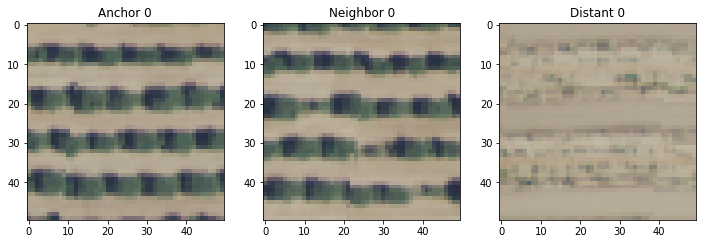

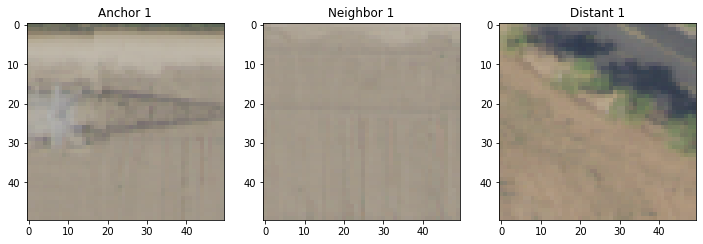

In [159]:
tile_dir = '../data/example_tiles_amazonia/'
tile_dir = original_tile_dir
#tile_dir = new_tile_dir
n_triplets = 2
plt.rcParams['figure.figsize'] = (12,4)
for i in range(n_triplets):
    tile = np.load(os.path.join(tile_dir, str(i)+'anchor.npy'))
    neighbor = np.load(os.path.join(tile_dir, str(i)+'neighbor.npy'))
    distant = np.load(os.path.join(tile_dir, str(i)+'distant.npy'))
    
    vmin = np.array([tile, neighbor, distant]).min()
    vmax = np.array([tile, neighbor, distant]).max()
    
    plt.figure()
    plt.subplot(1,3,1)
    plt.imshow(tile[:,:,[0,1,2]])
    plt.title('Anchor '+str(i))
    plt.subplot(1,3,2)
    plt.imshow(neighbor[:,:,[0,1,2]])
    plt.title('Neighbor '+str(i))
    plt.subplot(1,3,3)
    plt.imshow(distant[:,:,[0,1,2]])
    plt.title('Distant '+str(i))

In [180]:
for i in range(10):
    
    new_tile = np.load(os.path.join(new_tile_dir, str(i)+'anchor.npy'))
    new_tile_shape = new_tile.shape

    org_tile = np.load(os.path.join(original_tile_dir, str(i)+'anchor.npy'))
    org_tile_shape = org_tile.shape
    
    print ("NEW: " + str(new_tile_shape) + " ORG: " + str(org_tile_shape))
    
print ("OLD TILES")
print (org_tile[0][0])
print (org_tile[0][1])
print (org_tile[0][2])
print (org_tile[0][3])
print (org_tile[0][4])
print (org_tile[-1][-1])

print ("NEW TILES")
print (new_tile[0][0][0])
print (new_tile[0][0])
print (new_tile[0][0])
print (len(new_tile[0]))
print (new_tile[0][4])
print (new_tile[-1][-1])

NEW: (51, 51, 3) ORG: (50, 50, 5)
NEW: (51, 51, 3) ORG: (50, 50, 5)
NEW: (51, 51, 3) ORG: (50, 50, 5)
NEW: (51, 51, 3) ORG: (50, 50, 5)
NEW: (51, 51, 3) ORG: (50, 50, 5)
NEW: (51, 51, 3) ORG: (50, 50, 5)
NEW: (51, 51, 3) ORG: (50, 50, 5)
NEW: (51, 51, 3) ORG: (50, 50, 5)
NEW: (51, 51, 3) ORG: (50, 50, 5)
NEW: (51, 51, 3) ORG: (50, 50, 5)
OLD TILES
[166 155 136 171  69]
[167 157 136 170  69]
[168 157 136 168  69]
[166 157 137 168  69]
[167 157 137 170  69]
[164 154 133 171  69]
NEW TILES
nan
[nan nan nan]
[nan nan nan]
51
[0.04166667 0.30810812 0.0199005 ]
[0.04861111 0.31351352 0.2238806 ]


In [214]:
def remove_nan_2(new_tile):
    """
    Takes a tile and replaces any nan values with the mean
    of the column the nan appears in
    """
    
    #Obtain mean of columns as you need, nanmean is convenient.
    tile_mean = np.nanmean(new_tile, axis=0)

    #Find indices that you need to replace
    inds = np.where(np.isnan(new_tile))
    
    #Place column means in the indices. Align the arrays using take
    new_tile[inds] = np.take(tile_mean, inds[1])
    
    return new_tile

In [120]:
import math
for i in range(1000):
    
    new_tile = np.load(os.path.join(nan_removed_tile_dir, str(i)+'anchor.npy'))
    new_tile_shape = new_tile.shape
    
    mean = np.nanmean(new_tile)
    #new_tile = remove_nan(new_tile)
    new_tile = np.nan_to_num(new_tile, nan=mean, posinf=mean, neginf=mean)
    """
    #Obtain mean of columns as you need, nanmean is convenient.
    tile_mean = np.nanmean(new_tile, axis=1)

    #Find indices that you need to replace
    inds = np.where(np.isnan(new_tile))
    
    #Place column means in the indices. Align the arrays using take
    new_tile[inds] = np.take(tile_mean, inds[1])
    """
    array_sum = np.sum(new_tile)
    if (np.isnan(array_sum)):
        print (i)
    
    """
    org_tile = np.load(os.path.join(original_tile_dir, str(i)+'anchor.npy'))
    org_tile_shape = org_tile.shape
    
    print ("NEW: " + str(new_tile_shape) + " ORG: " + str(org_tile_shape))
    
    print ("OLD TILES")
    print (org_tile[0][0])
    print (org_tile[0][0])
    print (org_tile[0][0])


    print ("NEW TILES")
    print (new_tile[0][0])
    print (new_tile[0][0])
    print (new_tile[0][0])
    """
    

## Create tiles for testing

In [133]:
import math
new_tile_dir = '../data/new_tiles/' 
nan_removed_tile_dir = '../data/nan_removed_tiles/' 
for i in range(1001):
    
    new_tile = np.load(os.path.join(nan_removed_tile_dir, str(i)+'anchor.npy'))
    print (new_tile.shape)
    #new_tile =  np.swapaxes(new_tile, 0, 2)
    
    new_col = np.full((51,51,1), mean)
    tile = np.append(new_tile, new_col, axis=2)
    
    np.save(os.path.join(new_tile_dir, str(i)+'tile.npy'), tile)
    

(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51,

(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51,

(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51, 51, 4)
(51, 51, 3)
(51,

In [125]:
tile_dir = '../data/nan_removed_tiles/' 

#y = np.load(os.path.join(tile_dir, 'y.npy'))

y = [1]*1000

np.save(os.path.join(tile_dir, 'y.npy'), y)